# Los Efectos De Los Principales Indicadores Económicos En Los Mercados Bursátiles De Estados Unidos

Este EDA trata de analizar la interactuación histórica entre el comportamiento de varios de los principales indicadores económicos y los mercados bursátiles en los Estados Unidos para encontrar posibles correlaciones y tendencias de mercado.

## Hipotesis

- Hay una correlación negativa entre el comportamiento de los tipos de interés y la bolsa en los Estados Unidos
- Cuando los tipos de interés a largo plazo bajan en comparación con los del corto plazo, es muy probable que se aproxime una crisis bursátil.
- Una elevada inflación suele causar bajadas en los mercados bursátiles.
- Hay una correlación negativa entre el USD (Dólar) y los mercados bursátiles de USA.
- Los movimientos en el PIB de USA (GDP) y el mercado bursátil son correlacionados.
- El desempleo y el mercado de valores tienen una correlación negativa.
- Un elevado desempleo suele causar una subida en los tipos de interés; lo que, a su vez, causa la subida de los mercados.

## Análisis

### 1. Carga de Librerias y Variables Generales

In [1]:
from src.utils.libraries import *
from src.utils.functions import *
# Crear el objeto FRED a partir de la API Key
fred = Fred(api_key=fred_key)

In [2]:
# Se utiliza un rango de 50 años para la extraccion de datos económicos
timeframe = 365*50
today = datetime.today()
end = today.strftime("%Y-%m-%d")
start = (today - dt.timedelta(days=timeframe)).strftime("%Y-%m-%d")

# Se utiliza un rango de 25 años para la extraccion de datos bursátiles
stock_timeframe = 365*25
stock_start = (today - dt.timedelta(days=stock_timeframe)).strftime("%Y-%m-%d")
stock_end = end

### 2. Variables a Extraer

#### 2.1 Variables de Indicadores Economicos a Extraer

En este apartado se disponen los indicadores que se van a utilizar para extraer los datos económicos desde la API de [FRED](https://fred.stlouisfed.org/). <br/>
Cada indicador económico consta de un código único que se utiliza para realizar búsquedas y consultas.

In [3]:
# Este diccionario contiene los codigos de series de FRED (key) que se utilizaran para extraer los indicadores (value)
fred_series_dict = {
    'DGS10': '10-Year Treasury Yield', # 10-Year Treasury Rate
    'DGS2': '2-Year Treasury Yield', # 2-Year Treasury Rate
    'DFF': 'Federal Funds Effective Rate', # Federal Funds Effective Rate
    'DGS1MO': '1-Month Treasury Yield', # 1-Month Treasury Rate
    'DGS3MO': '3-Month Treasury Yield', # 3-Month Treasury Rate
    'DGS5': '5-Year Treasury Yield', # 5-Year Treasury Rate
    'DGS20': '20-Year Treasury Yield', # 20-Year Treasury Rate
    'DGS30': '30-Year Treasury Yield', # 30-Year Treasury Rate
    'MORTGAGE15US': '15-Year Mortgage Rate', # 15-Year Mortgage Rate
    'MORTGAGE30US': '30-Year Mortgage Rate', # 30-Year Mortgage Rate
    'UNRATE': 'Unemployment Rate',
    'GDP': 'GDP',
    # 'A191RP1Q027SBEA': 'GDP Growth',
    'GDPC1': 'Real GDP',
    # 'A191RL1Q225SBEA': 'RGDP Growth',
    'CPIAUCSL': 'CPI', # Inflation rate: infrate = pd.DataFrame(CPI.pct_change(12),columns=["Inflation Rate"]) # CPI YoY
    'PPIFIS': 'PPI', # PPI rate: ppi = pd.DataFrame(ppi_fd.pct_change(),columns=["PPI"])
    'GFDEBTN': 'Government Debt', # Gov Debt / GDP: govdebt_gdp = pd.DataFrame((govdebt*.1/gdp).dropna(),columns=["Gov Debt to GDP"]) # Gov Debt / GDP
    'DTWEXBGS': 'US Dollar Index',   
}

# Este diccionario se utiliza para crear las columnas que contienen calculos
series_calc_dict = {
    'CPIAUCSL': 'Inflation rate', # Inflation rate: infrate = pd.DataFrame(CPI.pct_change(12),columns=["Inflation Rate"]) # CPI YoY
    'PPIFIS': 'PPI rate', # PPI rate: ppi = pd.DataFrame(ppi_fd.pct_change(),columns=["PPI"])
    'GFDEBTN': 'Government Debt to GDP', # Gov Debt / GDP: govdebt_gdp = pd.DataFrame((govdebt*.1/gdp).dropna(),columns=["Gov Debt to GDP"]) # Gov Debt / GDP
}

Aquí se agrupan los indicadores según su tipo:

In [4]:
# Listar los indicadores por su tipo
irates = ["1-Month Treasury Yield",
          "3-Month Treasury Yield",
          "2-Year Treasury Yield",
          "5-Year Treasury Yield",
          "10-Year Treasury Yield",
          "20-Year Treasury Yield",
          "30-Year Treasury Yield",
          "15-Year Mortgage Rate",
          "30-Year Mortgage Rate"]
irate_yld = ["3m5y",
             "3m10y",
             "2y10y",
             "2y20y",
             "5y10y",
             "10y30y",
             "10yTrea30yFRM"]
inflation = ["CPI",
       #       "Inflation rate",
             "PPI",
       #       "PPI rate"
             ] 
usd = ["US Dollar Index"] 
gdp = ["GDP",
      #  "GDP Growth",
       "Real GDP",
      #  "RGDP Growth",
       ]
unemployment = ["Unemployment Rate"]

# Agrupar las listas de indicadores en un diccionario
indicator_dict = {"interest_rates":irates,
                  "interest_rate_spread":irate_yld,
                  "inflation":inflation,
                  "usd":usd,
                  "gdp":gdp,
                  "unemployment":unemployment}

#### 2.2 Variables de Mercados

En este apartado se disponen los 'tickers' de los índices de los mercados de valores que queremos extraer a través de la API de [Yahoo Finanzas](https://finance.yahoo.com/).

In [5]:
# Crear la lista de los diferentes mercados de valores y sectores
stocks = ['SPY','DIA','^IXIC','XLE','XLF','XLU','XLI','XLK','XLV','XLY','XLP','XLB','IYR','GDX']

### 3. Extraccion de Datos

#### 3.1 Extraccion de Datos Economicos

Utilizamos una funcion llamada **indicator_extraction** para extraer los datos económicos desde la API de [FRED](https://fred.stlouisfed.org/).

In [6]:
indicators_df = indicator_extraction(fred_dict=fred_series_dict, calc_dict=series_calc_dict)

Indicators Extracted: Index(['10-Year Treasury Yield', '2-Year Treasury Yield',
       'Federal Funds Effective Rate', '1-Month Treasury Yield',
       '3-Month Treasury Yield', '5-Year Treasury Yield',
       '20-Year Treasury Yield', '30-Year Treasury Yield',
       '15-Year Mortgage Rate', '30-Year Mortgage Rate', 'Unemployment Rate',
       'GDP', 'Real GDP', 'CPI', 'PPI', 'Government Debt',
       'Government Debt to GDP', 'US Dollar Index', '3m5y', '3m10y', '2y10y',
       '2y20y', '5y10y', '10y30y', '10yTrea30yFRM'],
      dtype='object')


In [7]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15992 entries, 1962-01-02 to 2023-04-19
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   10-Year Treasury Yield        15310 non-null  float64
 1   2-Year Treasury Yield         11718 non-null  float64
 2   Federal Funds Effective Rate  15992 non-null  float64
 3   1-Month Treasury Yield        5432 non-null   float64
 4   3-Month Treasury Yield        10408 non-null  float64
 5   5-Year Treasury Yield         15310 non-null  float64
 6   20-Year Treasury Yield        13621 non-null  float64
 7   30-Year Treasury Yield        11540 non-null  float64
 8   15-Year Mortgage Rate         1649 non-null   float64
 9   30-Year Mortgage Rate         2714 non-null   float64
 10  Unemployment Rate             525 non-null    float64
 11  GDP                           175 non-null    float64
 12  Real GDP                      175 non-null 

#### 3.2 Extraccion de Datos de Mercado

Utilizamos una funcion llamada **market_extraction** para extraer los datos de mercado desde la API de [Yahoo Finance](https://finance.yahoo.com/).

In [8]:
market_hist = market_extraction(stocks=stocks, start=start,end=end)

[*********************100%***********************]  14 of 14 completed


In [9]:
market_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12602 entries, 1973-05-03 00:00:00-04:00 to 2023-04-20 00:00:00-04:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DIA     6355 non-null   float64
 1   GDX     4258 non-null   float64
 2   IYR     5746 non-null   float64
 3   SPY     7611 non-null   float64
 4   XLB     6121 non-null   float64
 5   XLE     6120 non-null   float64
 6   XLF     6121 non-null   float64
 7   XLI     6121 non-null   float64
 8   XLK     6121 non-null   float64
 9   XLP     6121 non-null   float64
 10  XLU     6121 non-null   float64
 11  XLV     6121 non-null   float64
 12  XLY     6121 non-null   float64
 13  ^IXIC   12602 non-null  float64
dtypes: float64(14)
memory usage: 1.4 MB


### 4. Limpieza de Datos

#### 4.1 Limpieza de Datos de Mercado

In [10]:
market_names = ['SP500','Dow_Jones','NASDAQ','Energy','Financials','Utilities','Industrials','Technology','Healthcare','Discretionary','Staples','Materials','Real_Estate','Gold']
market_dict = {stocks[ticker]:market_names[ticker] for ticker in range(len(stocks))}

In [11]:
df_markets, df_market_rets, df_market_cum = limpiar_markets(markets_dict=market_dict,start=stock_start,end=stock_end)

In [12]:
df_market_rets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6288 entries, 1998-04-27 to 2023-04-20
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dow_Jones      6288 non-null   float64
 1   Gold           6288 non-null   float64
 2   Real_Estate    6288 non-null   float64
 3   SP500          6288 non-null   float64
 4   Materials      6288 non-null   float64
 5   Energy         6288 non-null   float64
 6   Financials     6288 non-null   float64
 7   Industrials    6288 non-null   float64
 8   Technology     6288 non-null   float64
 9   Staples        6288 non-null   float64
 10  Utilities      6288 non-null   float64
 11  Healthcare     6288 non-null   float64
 12  Discretionary  6288 non-null   float64
 13  NASDAQ         6288 non-null   float64
dtypes: float64(14)
memory usage: 736.9+ KB


#### 4.2 Limpieza de Datos Economicos

In [13]:
df_indicators, df_indicators_limpio = limpiar_indicators(df_ind=indicators_df,indicator_dict=indicator_dict,start=start,end=end)

In [14]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13035 entries, 1973-05-03 to 2023-04-19
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   10-Year Treasury Yield        12483 non-null  float64
 1   2-Year Treasury Yield         11718 non-null  float64
 2   Federal Funds Effective Rate  13035 non-null  float64
 3   1-Month Treasury Yield        5432 non-null   float64
 4   3-Month Treasury Yield        10408 non-null  float64
 5   5-Year Treasury Yield         12483 non-null  float64
 6   20-Year Treasury Yield        10794 non-null  float64
 7   30-Year Treasury Yield        11540 non-null  float64
 8   15-Year Mortgage Rate         1649 non-null   float64
 9   30-Year Mortgage Rate         2605 non-null   float64
 10  Unemployment Rate             427 non-null    float64
 11  GDP                           143 non-null    float64
 12  Real GDP                      143 non-null 

### 5. Análisis Univariante

#### 5.1 Leer los Datos de 'Raw'

In [16]:
# Extraer datos de la carpeta 'raw'
df_gdp = pd.read_csv(r'src\data\processed\gdp.csv',index_col=0, header=0)
df_inflation = pd.read_csv(r'src\data\processed\inflation.csv',index_col=0, header=0)
df_interest_rate_spread = pd.read_csv(r'src\data\processed\interest_rate_spread.csv',index_col=0, header=0)
df_interest_rates = pd.read_csv(r'src\data\processed\interest_rates.csv',index_col=0, header=0)
df_unemployment = pd.read_csv(r'src\data\processed\unemployment.csv',index_col=0, header=0)
df_usd = pd.read_csv(r'src\data\processed\usd.csv',index_col=0, header=0)
df_market_hist = pd.read_csv(r'src\data\processed\market_hist.csv',index_col=0, header=0)
df_market_rets = pd.read_csv(r'src\data\processed\market_rets.csv',index_col=0, header=0)
df_market_cum = pd.read_csv(r'src\data\processed\market_cum.csv',index_col=0, header=0)


In [17]:
df_unemployment = df_unemployment[df_unemployment["Unemployment Rate"]<(df_unemployment["Unemployment Rate"].max()-3*df_unemployment["Unemployment Rate"].std())]

#### 5.2 Disponer los Datos para el Análisis

In [18]:
indicators = {"gdp":df_gdp, "inflation":df_inflation, "interest_rate_spread":df_interest_rate_spread, 
              "interest_rates":df_interest_rates, "unemployment":df_unemployment, "usd":df_usd, 
              "market_hist":df_market_hist, "market_rets":df_market_rets, "market_cum":df_market_cum}
medidas = ["mean", "median", "mode", "Min", "Percentil_25", "Percentil_75","Max", "var", "std", "skew", "kurt"]
markets = market_names

In [19]:
gdp = df_gdp.columns.to_list()
inflation = df_inflation.columns.to_list()
interest_rate_spread = df_interest_rate_spread.columns.to_list()
interest_rates = df_interest_rates.columns.to_list()
unemployment = df_unemployment.columns.to_list()
usd = df_usd.columns.to_list()

In [20]:
gdp_dict = dict(itertools.islice(indicators.items(),1))
inflation_dict = dict(itertools.islice(indicators.items(),1, 2))
interest_rate_spread_dict = dict(itertools.islice(indicators.items(),2, 3))
interest_rates_dict = dict(itertools.islice(indicators.items(),3, 4))
unemployment_dict = dict(itertools.islice(indicators.items(), 4, 5))
usd_dict = dict(itertools.islice(indicators.items(), 5, 6))

#### 5.3 Realizar Análisis Univariante

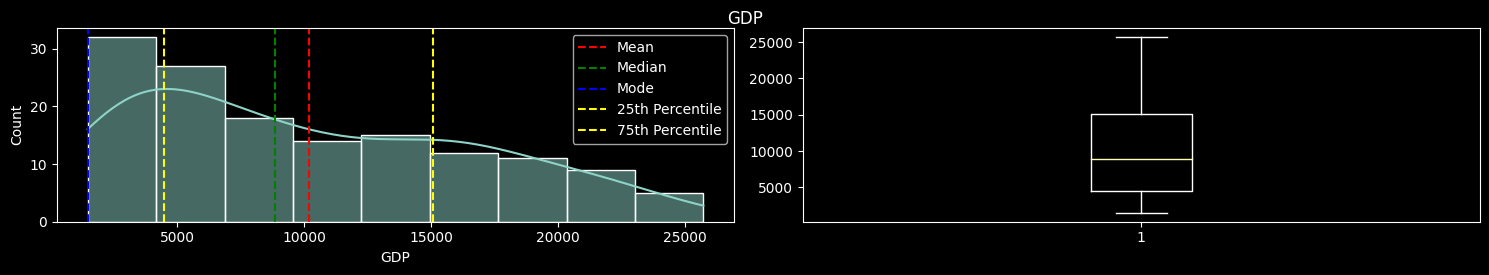

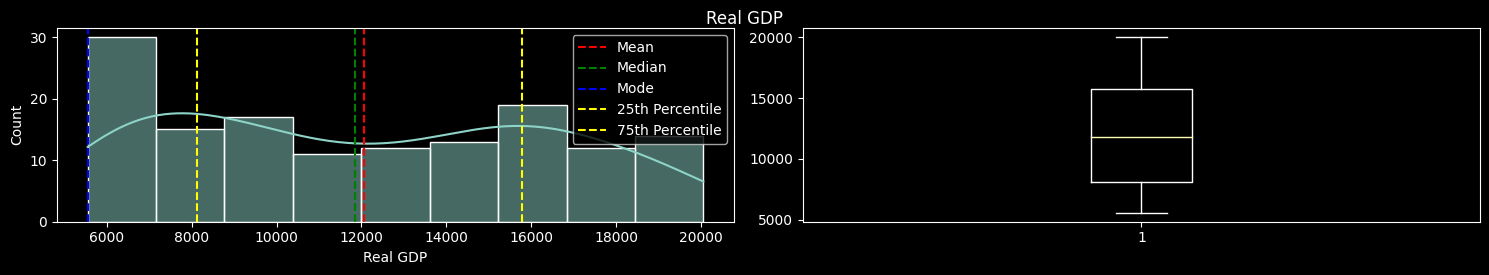

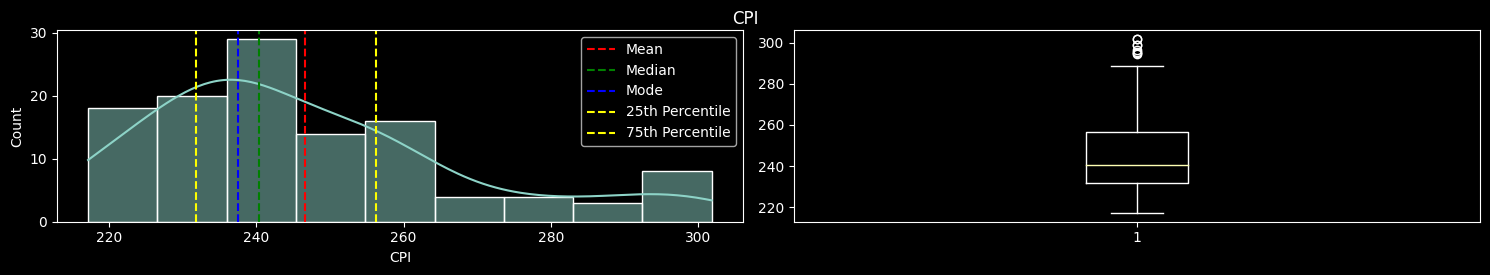

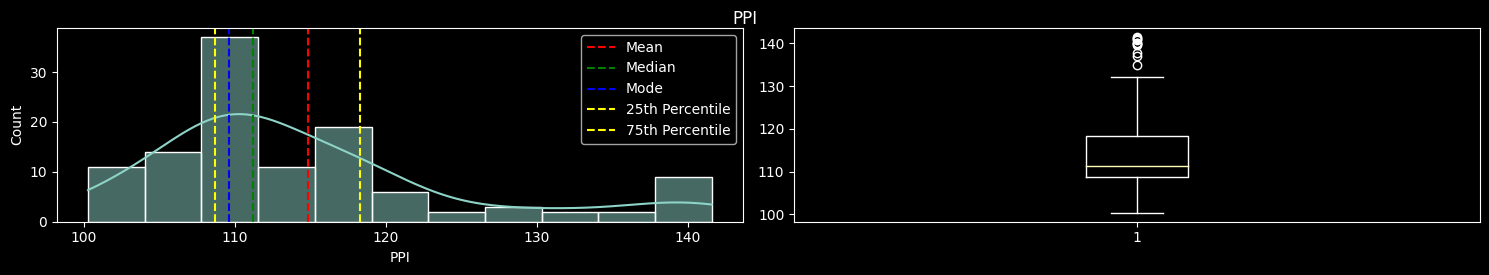

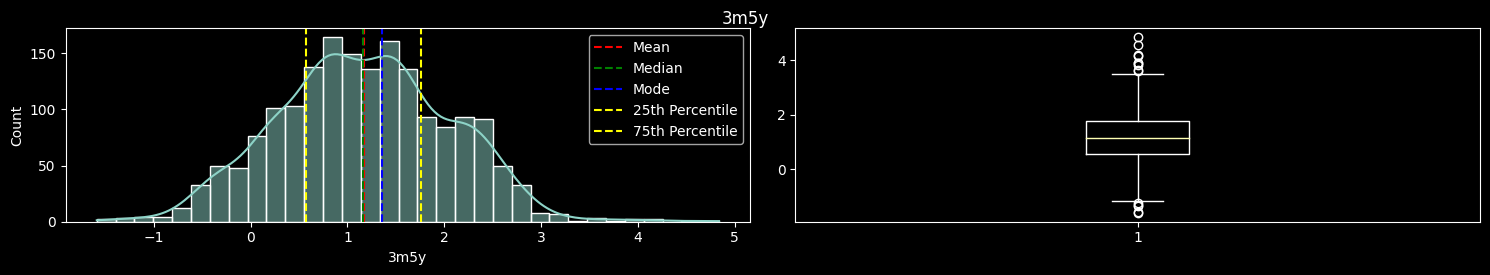

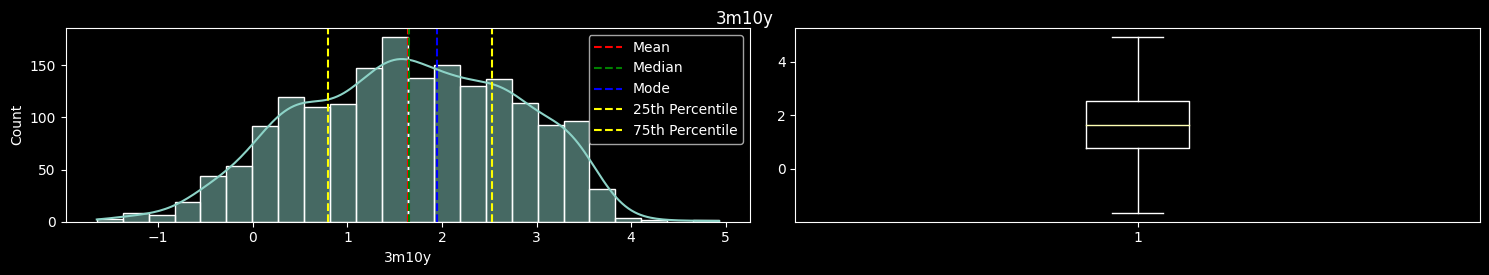

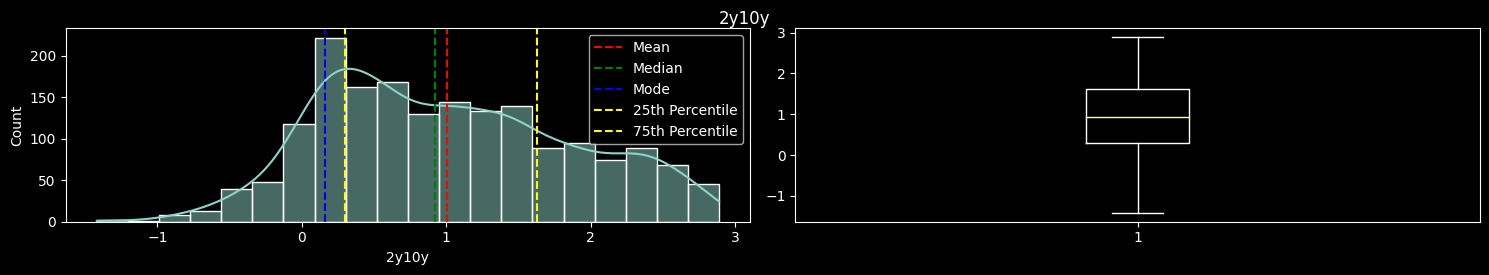

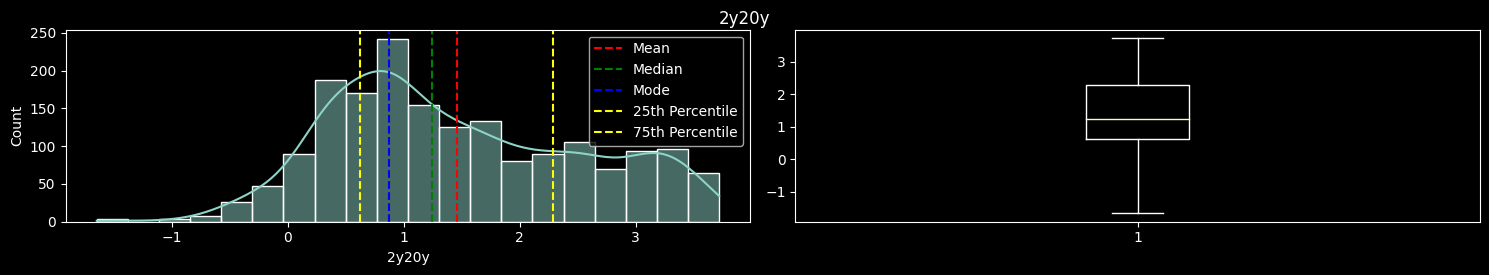

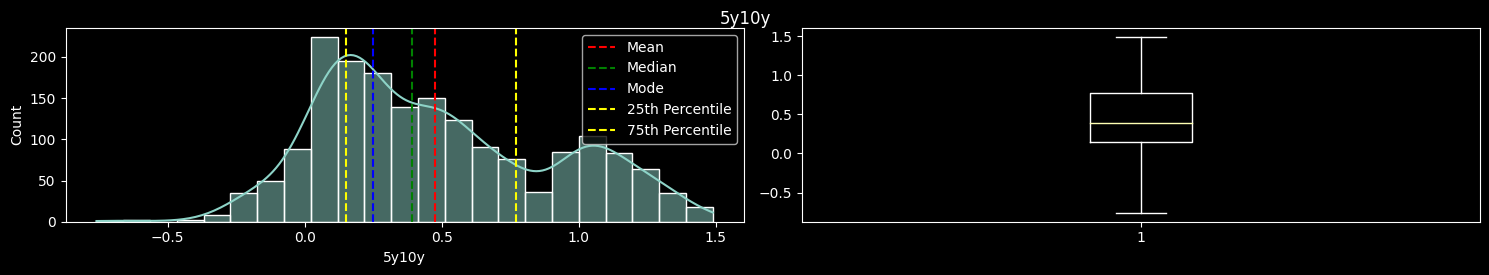

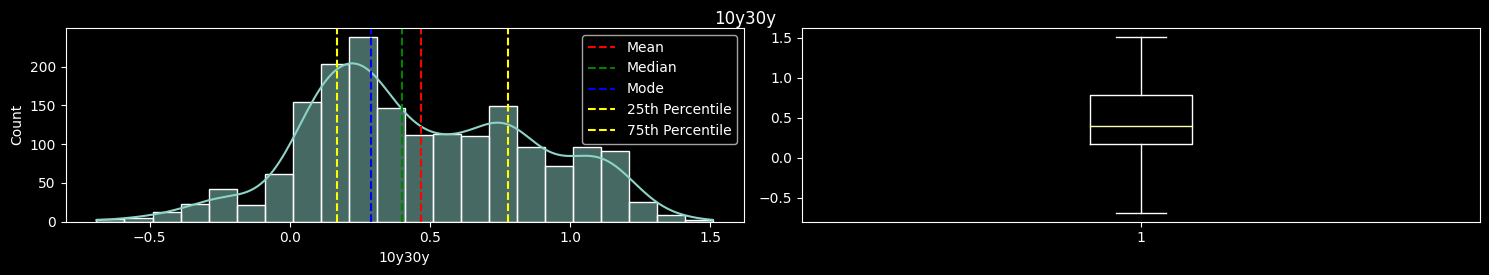

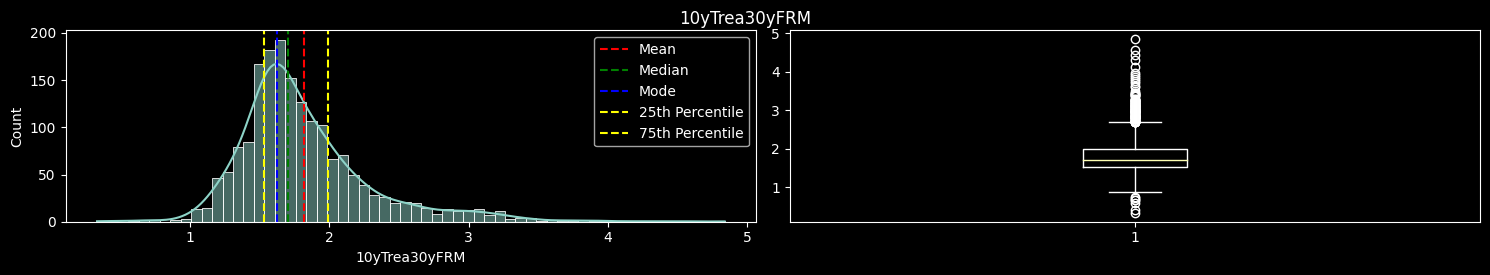

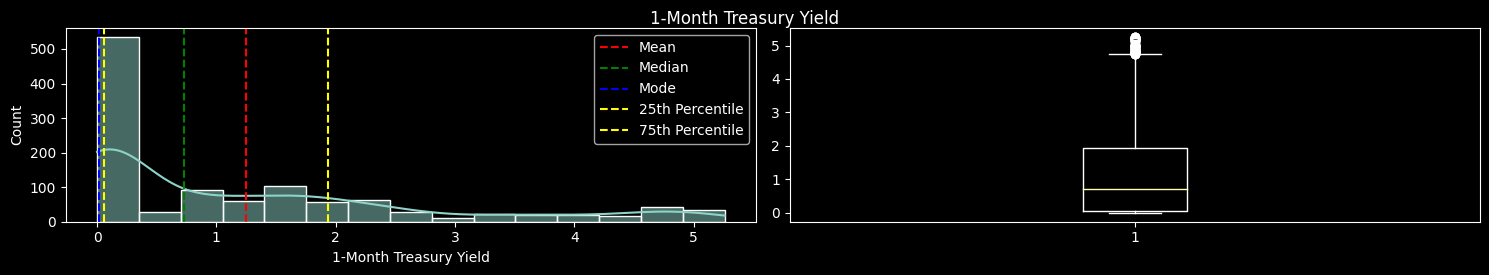

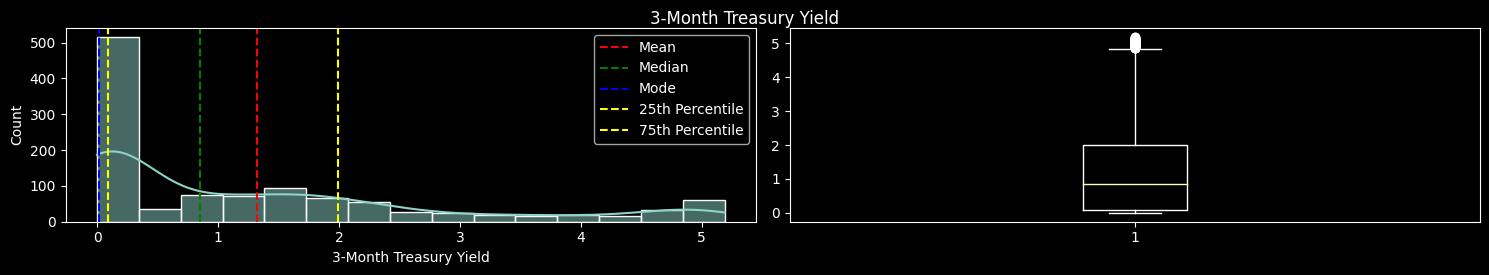

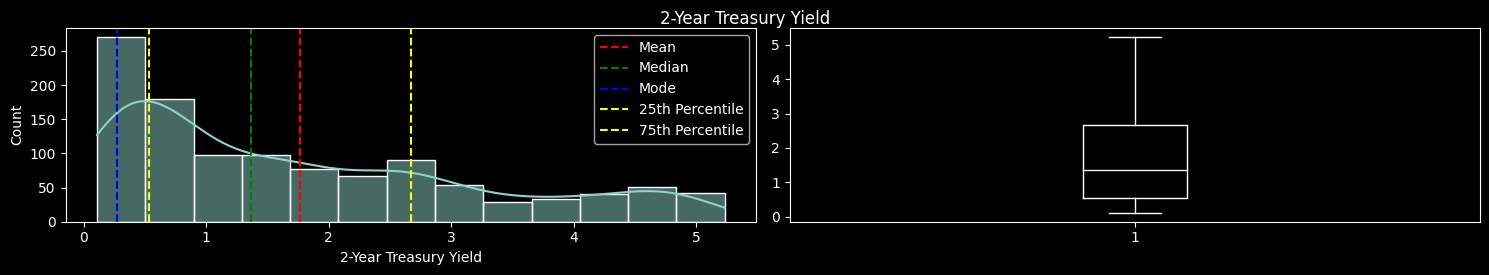

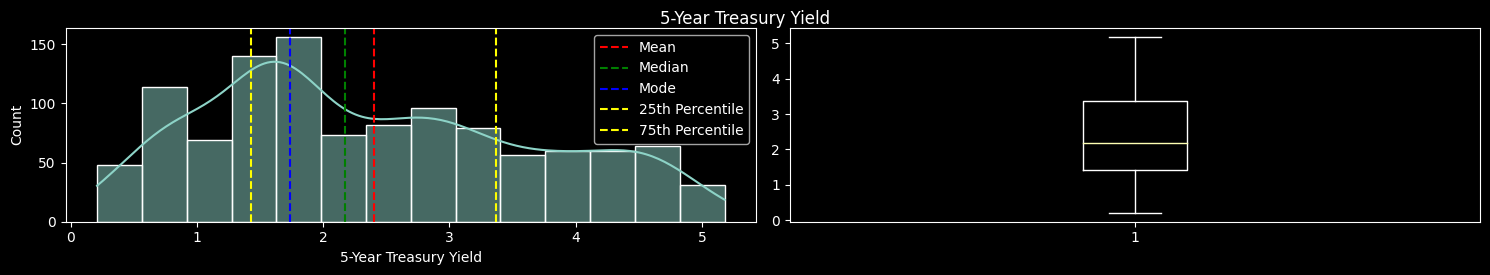

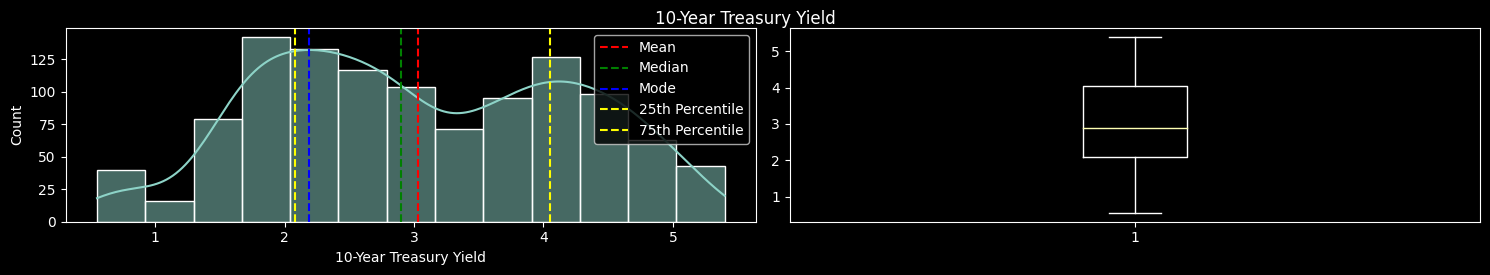

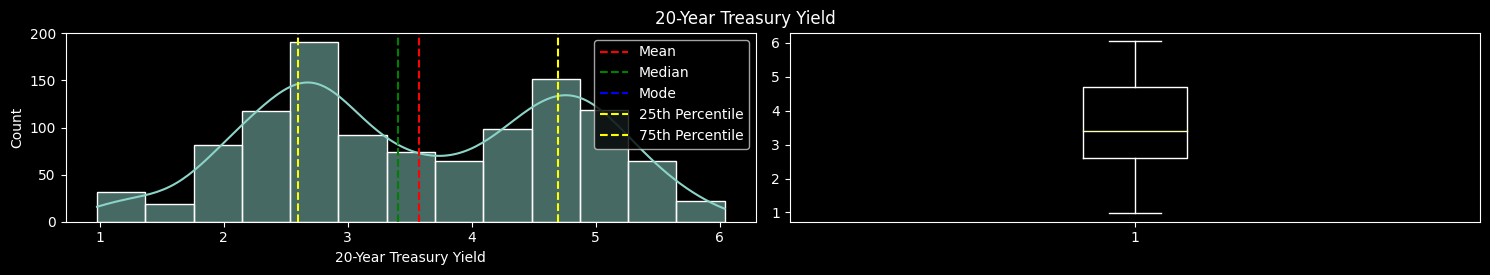

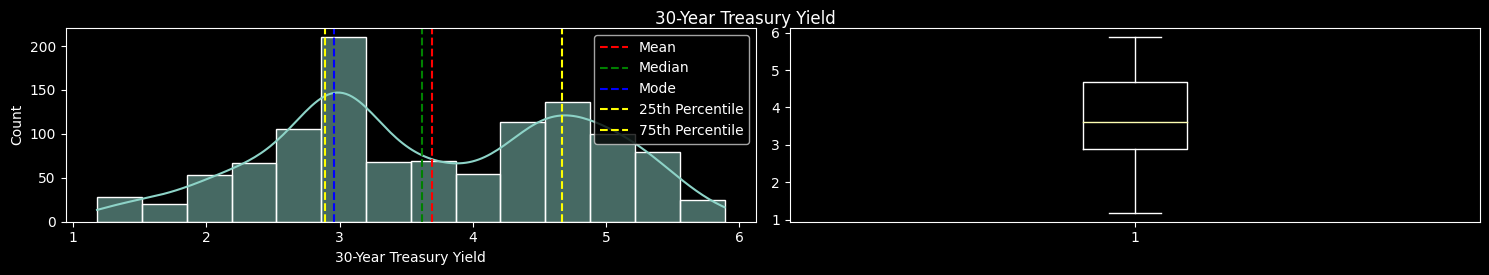

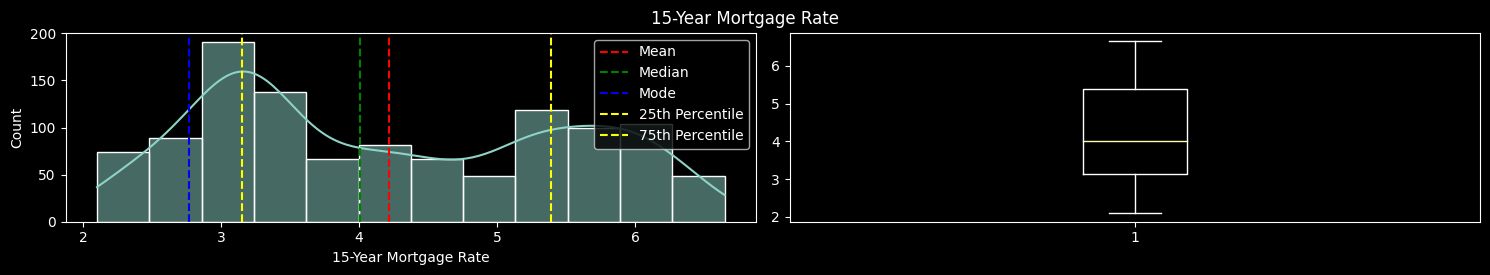

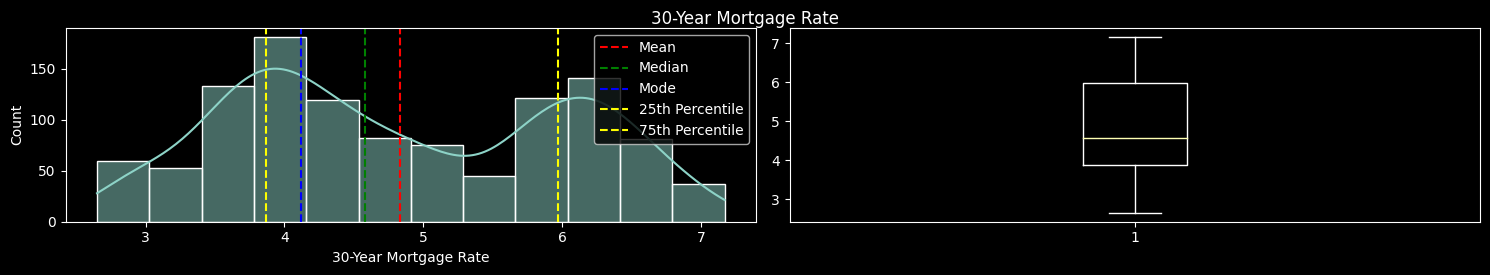

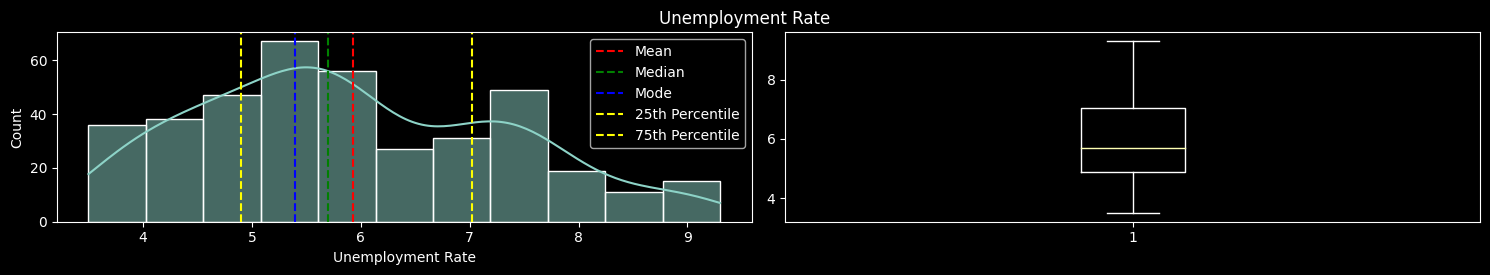

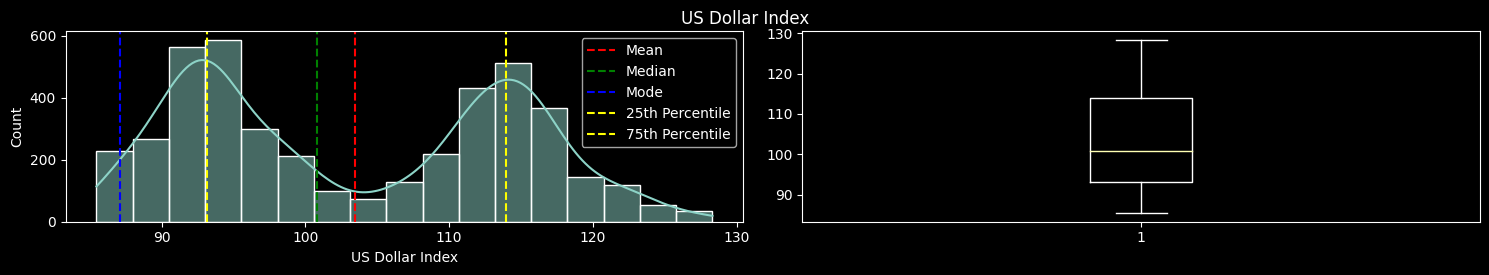

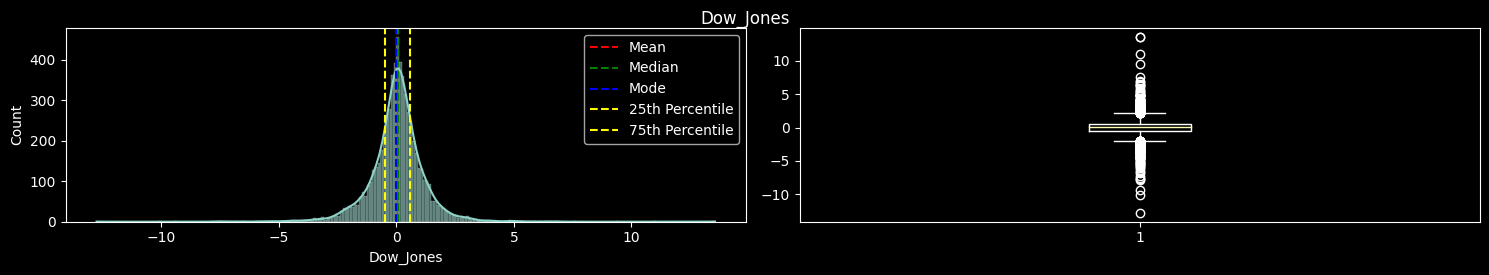

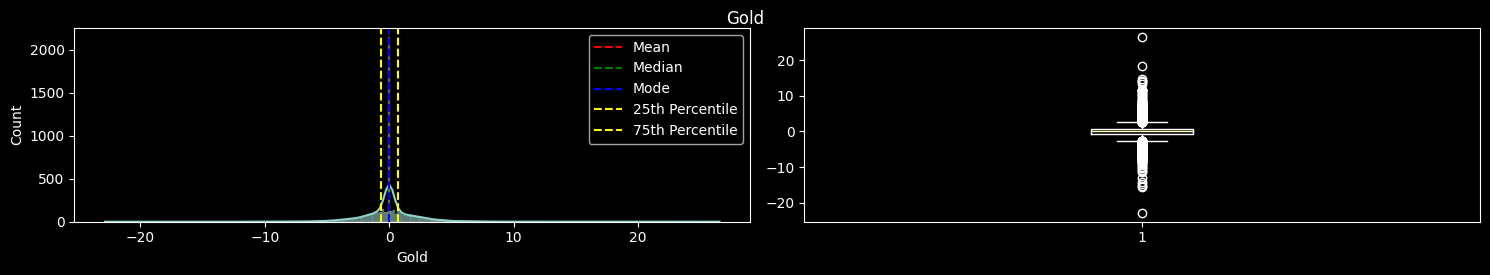

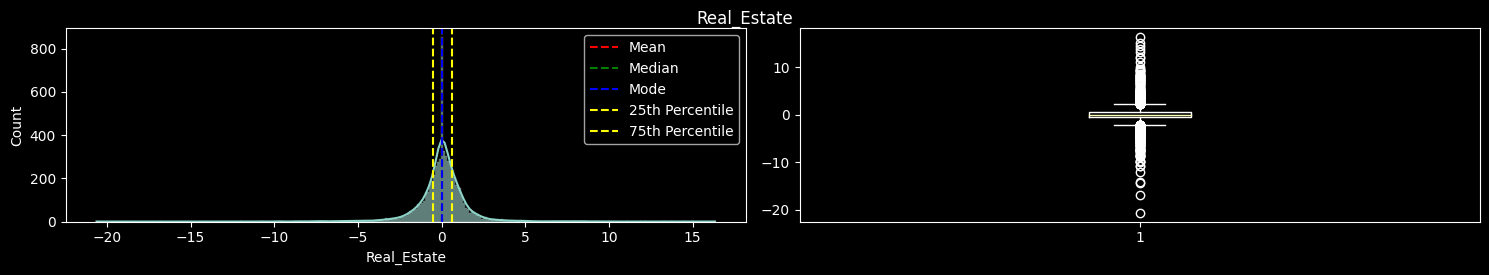

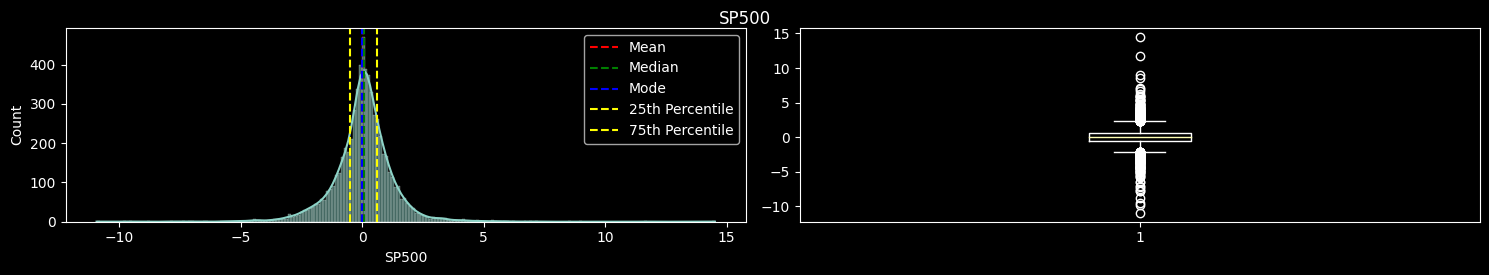

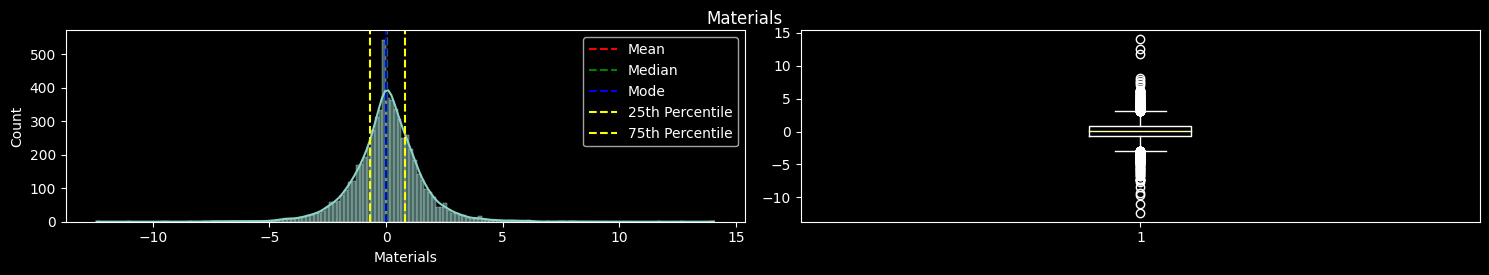

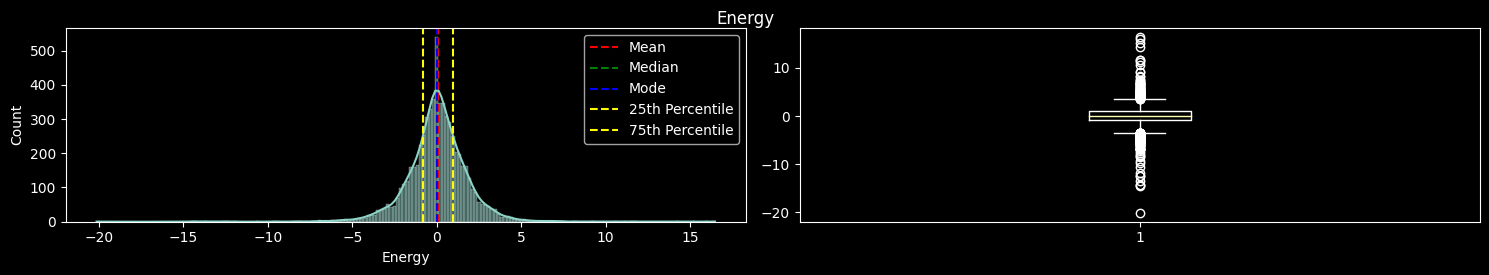

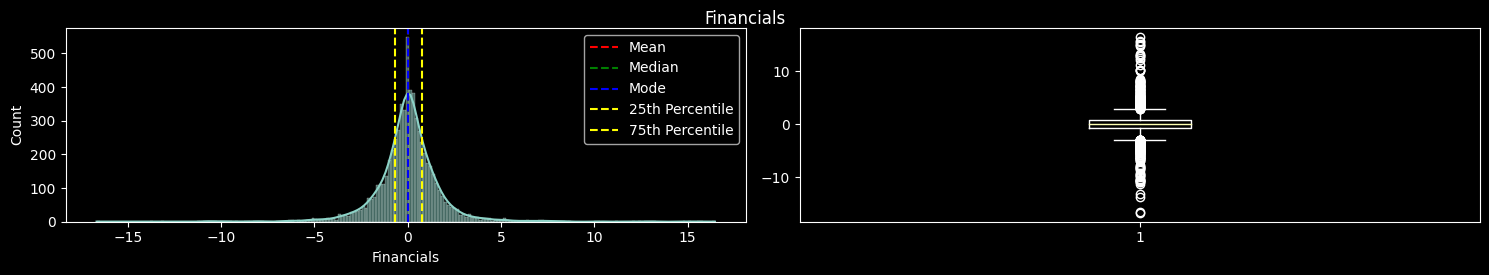

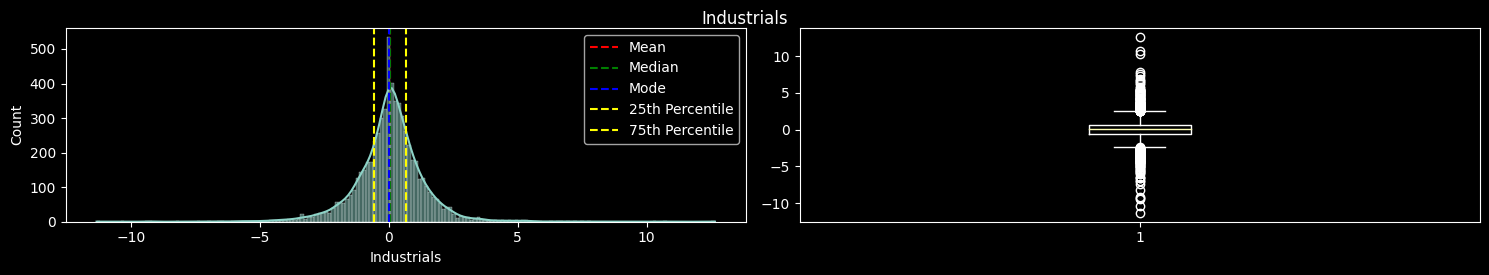

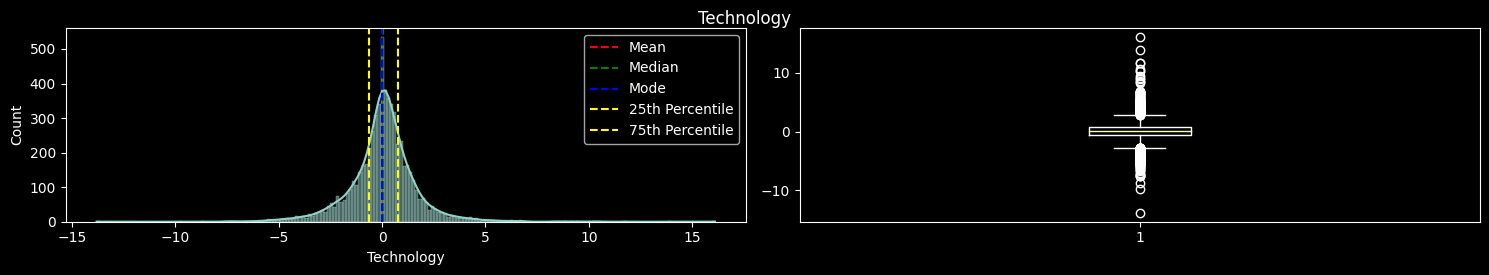

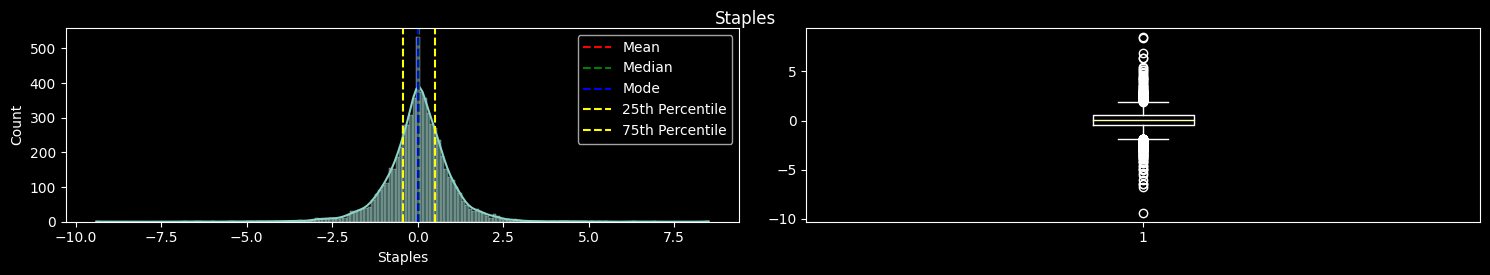

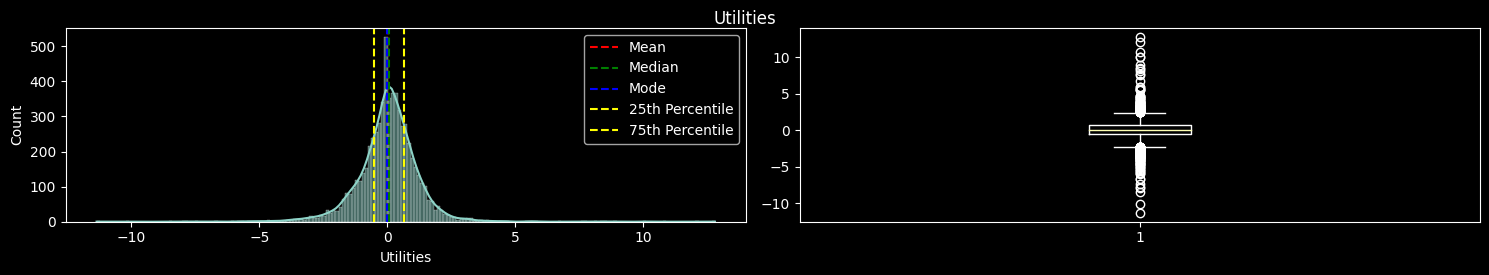

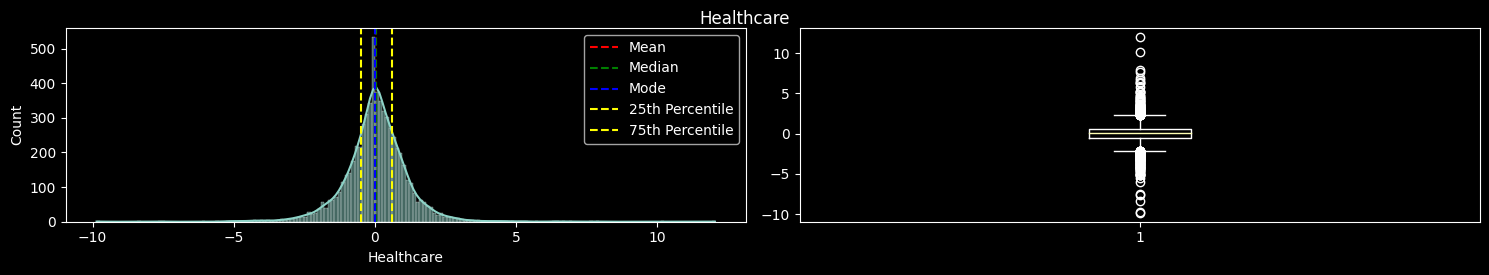

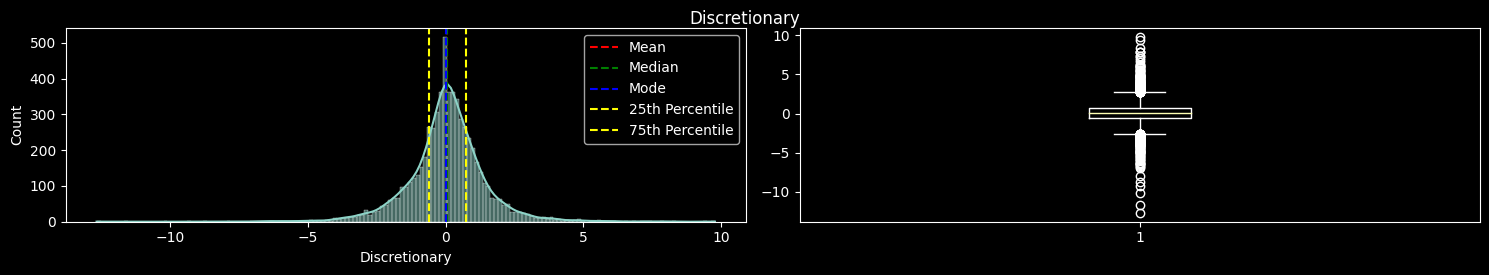

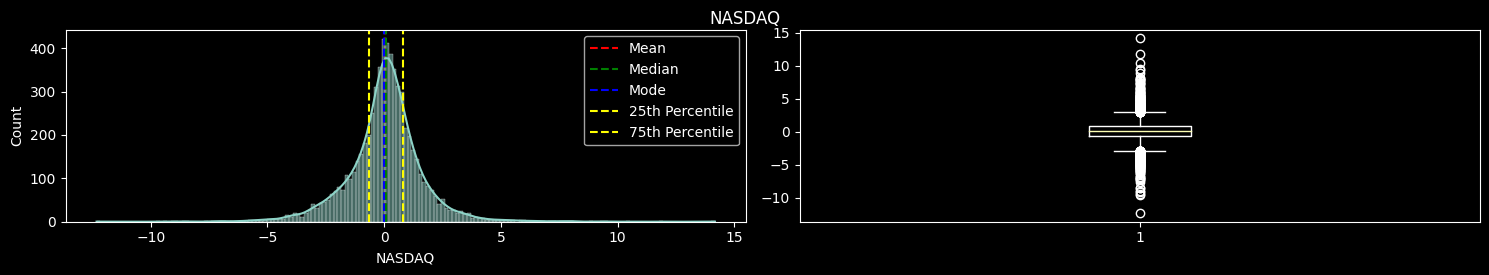

In [21]:
analisis_univariante = analisis_univariante(indicators=indicators, medidas=medidas)

In [22]:
analisis_univariante

mean        median       mode          Min  \
GDP                     10192.478804   8866.480000  1476.2890  1476.289000   
Real GDP                12066.131916  11839.876000  5551.7130  5551.713000   
CPI                       246.607750    240.383500   237.4980   217.199000   
PPI                       114.839871    111.200000   109.6000   100.300000   
3m5y                        1.168095      1.160000     1.3600    -1.590000   
3m10y                       1.644291      1.650000     1.9500    -1.650000   
2y10y                       1.008223      0.925000     0.1600    -1.420000   
2y20y                       1.460184      1.240000     0.8700    -1.650000   
5y10y                       0.476196      0.390000     0.2500    -0.760000   
10y30y                      0.468877      0.400000     0.2900    -0.690000   
10yTrea30yFRM               1.816095      1.700000     1.6200     0.330000   
1-Month Treasury Yield      1.251676      0.725000     0.0200     0.000000   
3-Month Treasury Yield      1.319840      0.855000     0.0200     0.000000   
2-Year Treasury Yield       1.768918      1.370000     0.2700     0.110000   
5-Year Treasury Yield       2.400035      2.170000     1.7400     0.210000   
10-Year Treasury Yield      3.032863      2.900000     2.1900     0.550000   
20-Year Treasury Yield      3.575550      3.410000     2.6000     0.980000   
30-Year Treasury Yield      3.692332      3.615000     2.9600     1.180000   
15-Year Mortgage Rate       4.214450      4.010000     2.7700     2.100000   
30-Year Mortgage Rate       4.829149      4.580000     4.1200     2.650000   
Unemployment Rate           5.926263      5.700000     5.4000     3.500000   
US Dollar Index           103.461820    100.835900    87.1347    85.469200   
Dow_Jones                   0.036978      0.065157     0.0000   -12.761215   
Gold                        0.024210      0.000000     0.0000   -22.823535   
Real_Estate                 0.041845      0.000000     0.0000   -20.611172   
SP500                       0.036162      0.065183     0.0000   -10.942371   
Materials                   0.041692      0.034443     0.0000   -12.412077   
Energy                      0.047152      0.015324     0.0000   -20.141171   
Financials                  0.033441      0.000000     0.0000   -16.666732   
Industrials                 0.039262      0.055888     0.0000   -11.344149   
Technology                  0.041977      0.057759     0.0000   -13.814004   
Staples                     0.030305      0.031409     0.0000    -9.395623   
Utilities                   0.034326      0.056162     0.0000   -11.357718   
Healthcare                  0.038633      0.031624     0.0000    -9.861031   
Discretionary               0.042387      0.045241     0.0000   -12.668642   
NASDAQ                      0.043100      0.100398     0.0000   -12.321331   

                        Percentil_25  Percentil_75           Max  \
GDP                      4475.994000  15060.899000  25723.941000   
Real GDP                 8116.122000  15779.959500  20054.663000   
CPI                       231.869000    256.315500    301.808000   
PPI                       108.700000    118.325000    141.568000   
3m5y                        0.572500      1.760000      4.840000   
3m10y                       0.792500      2.527500      4.930000   
2y10y                       0.300000      1.630000      2.890000   
2y20y                       0.622500      2.290000      3.720000   
5y10y                       0.150000      0.770000      1.490000   
10y30y                      0.170000      0.777500      1.510000   
10yTrea30yFRM               1.530000      1.990000      4.840000   
1-Month Treasury Yield      0.060000      1.932500      5.260000   
3-Month Treasury Yield      0.090000      1.990000      5.190000   
2-Year Treasury Yield       0.530000      2.670000      5.230000   
5-Year Treasury Yield       1.430000      3.370000      5.180000   
10-Year Treasury Yield      2.080000      4.050000      5

### 6. Análisis Multivariante

#### 6.1 Filtrar los Indicadores de Interés

In [23]:
indicators = {"gdp":df_gdp, "inflation":df_inflation, "interest_rate_spread":df_interest_rate_spread, 
              "interest_rates":df_interest_rates, "unemployment":df_unemployment, "usd":df_usd}
markets = market_names[0:1]

#### 6.2 Realizar Análisis Multivariante

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\

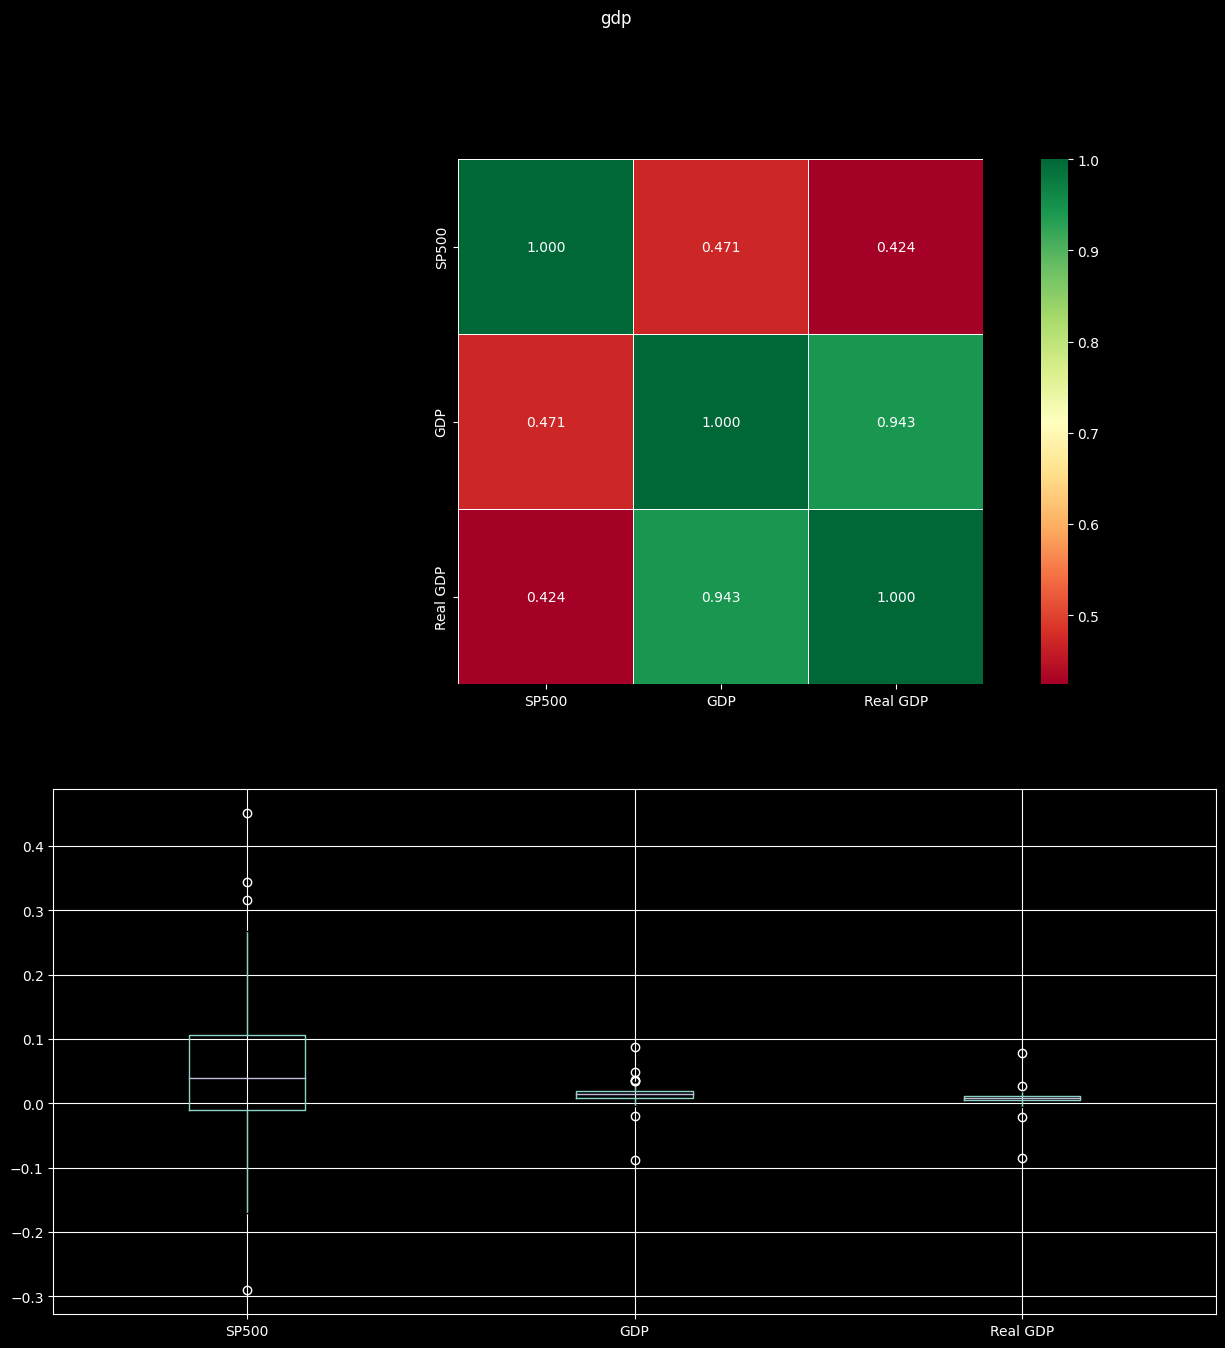

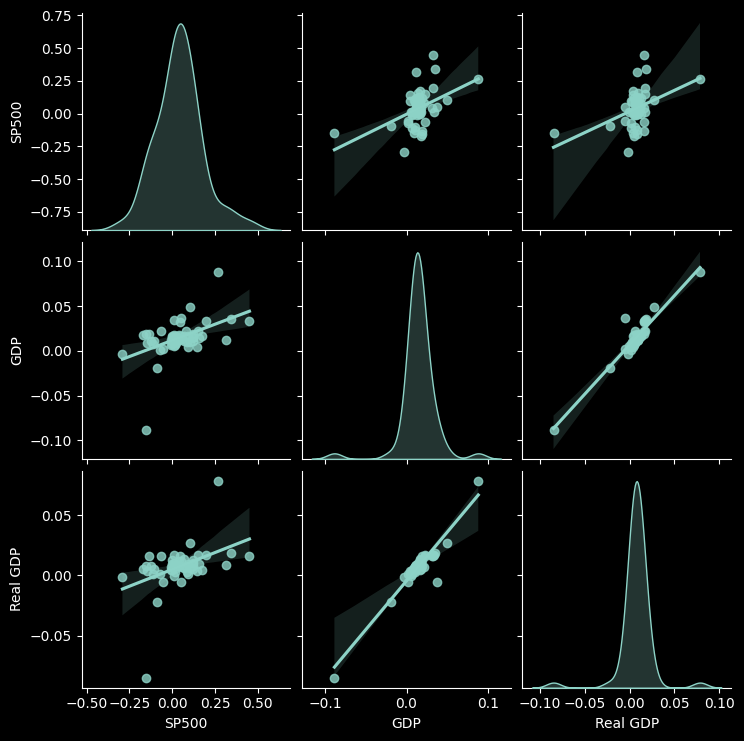

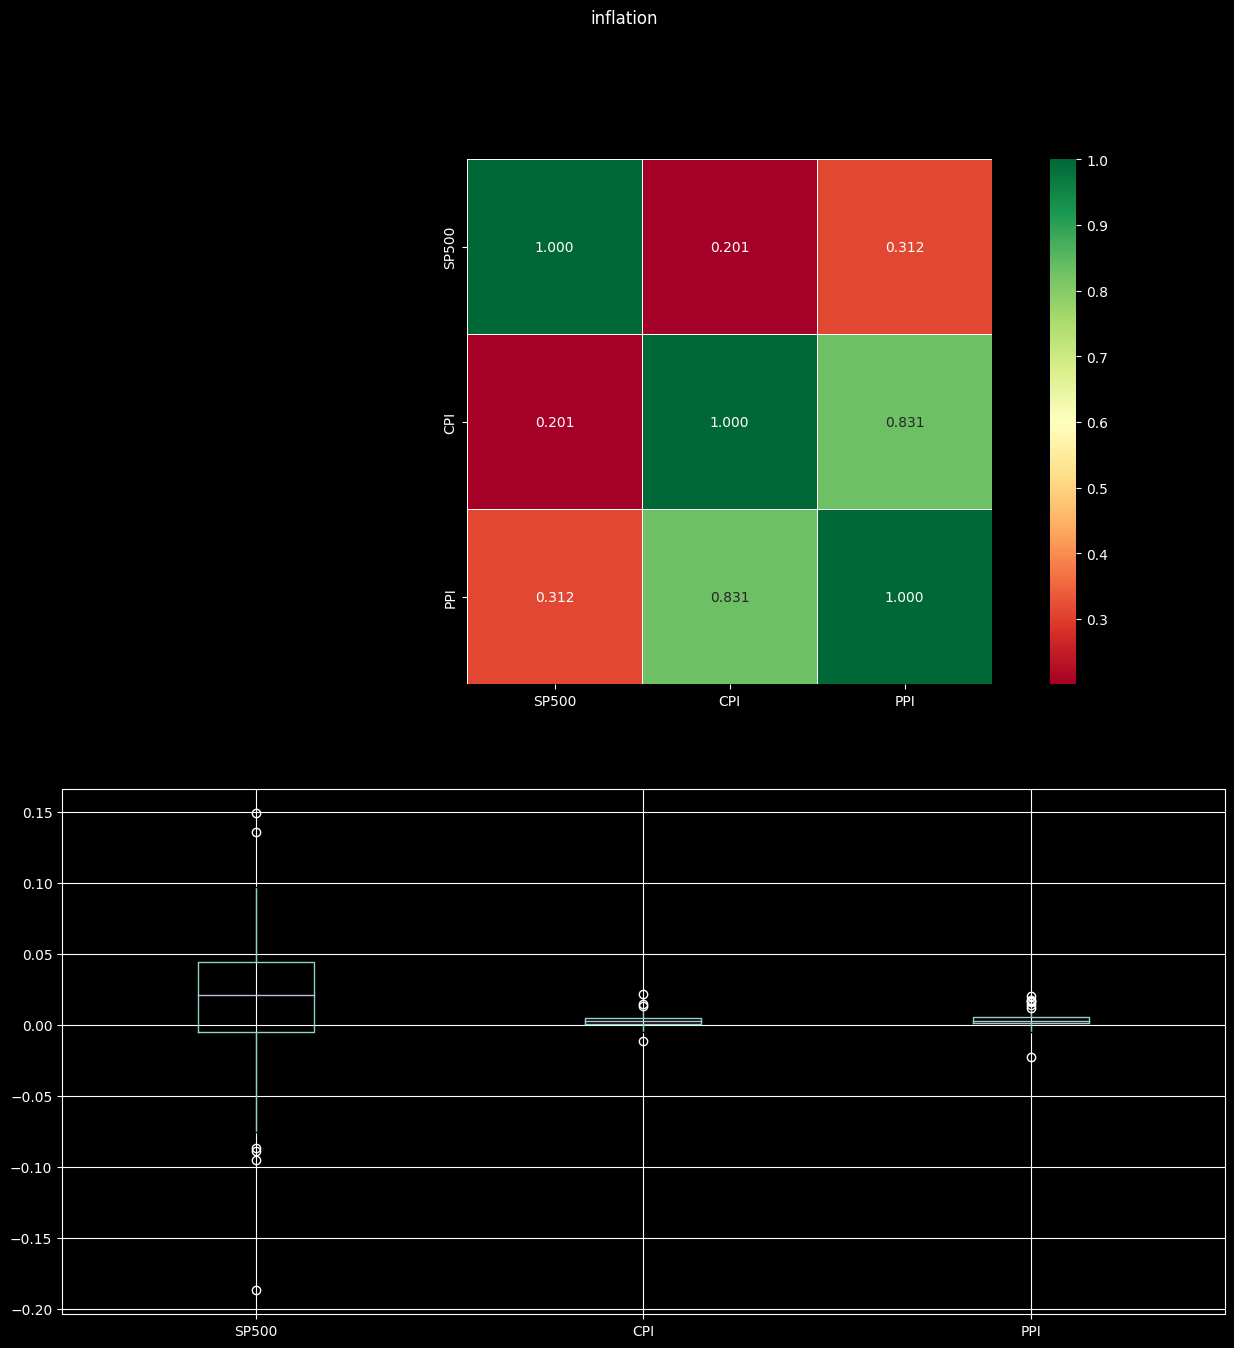

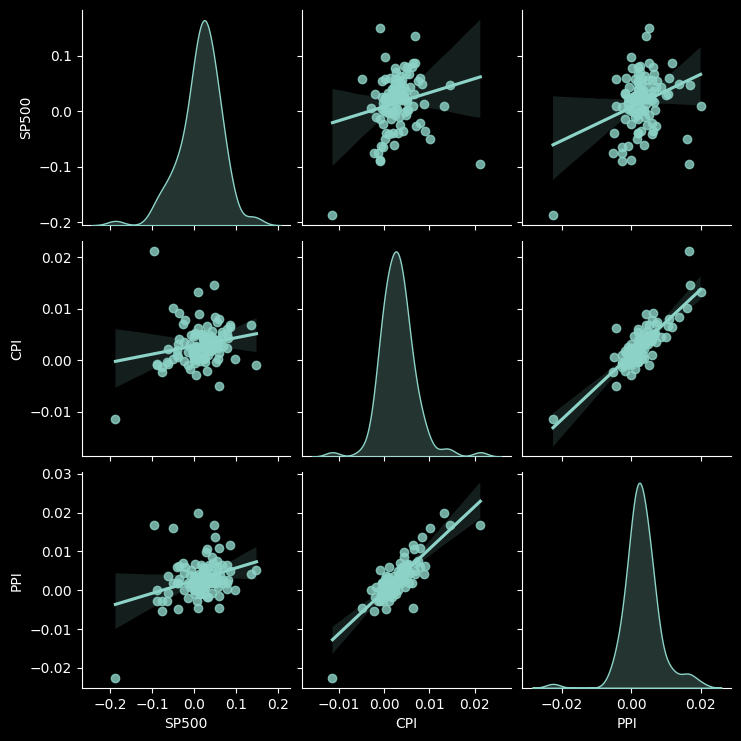

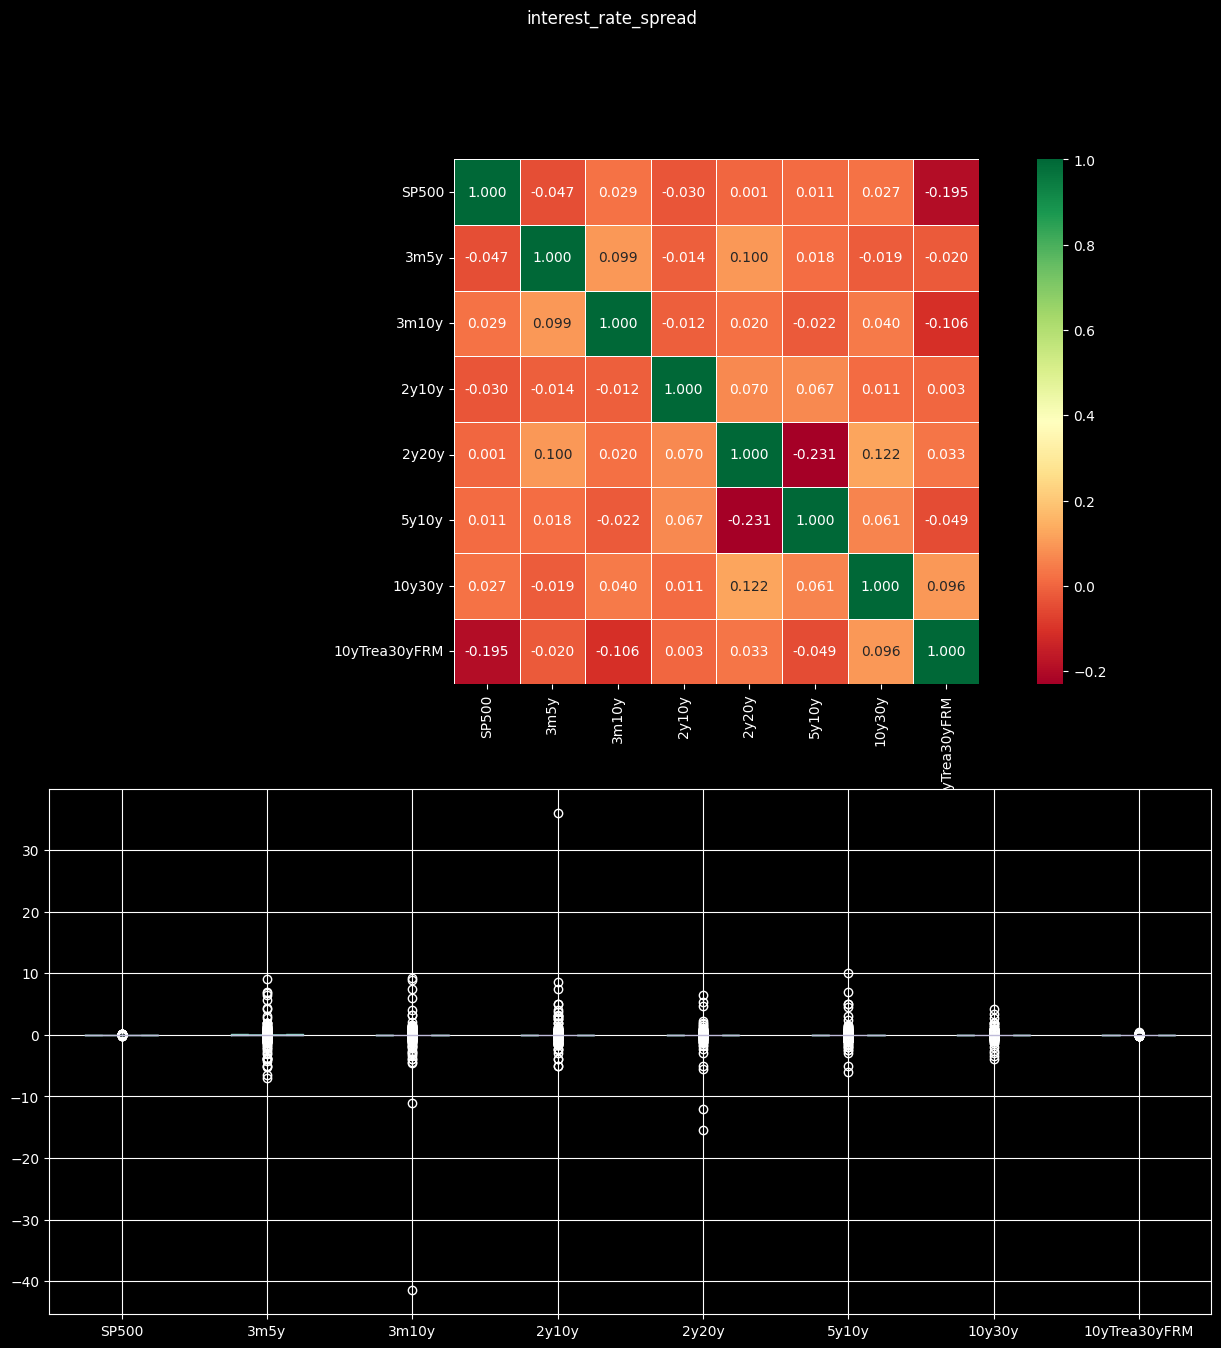

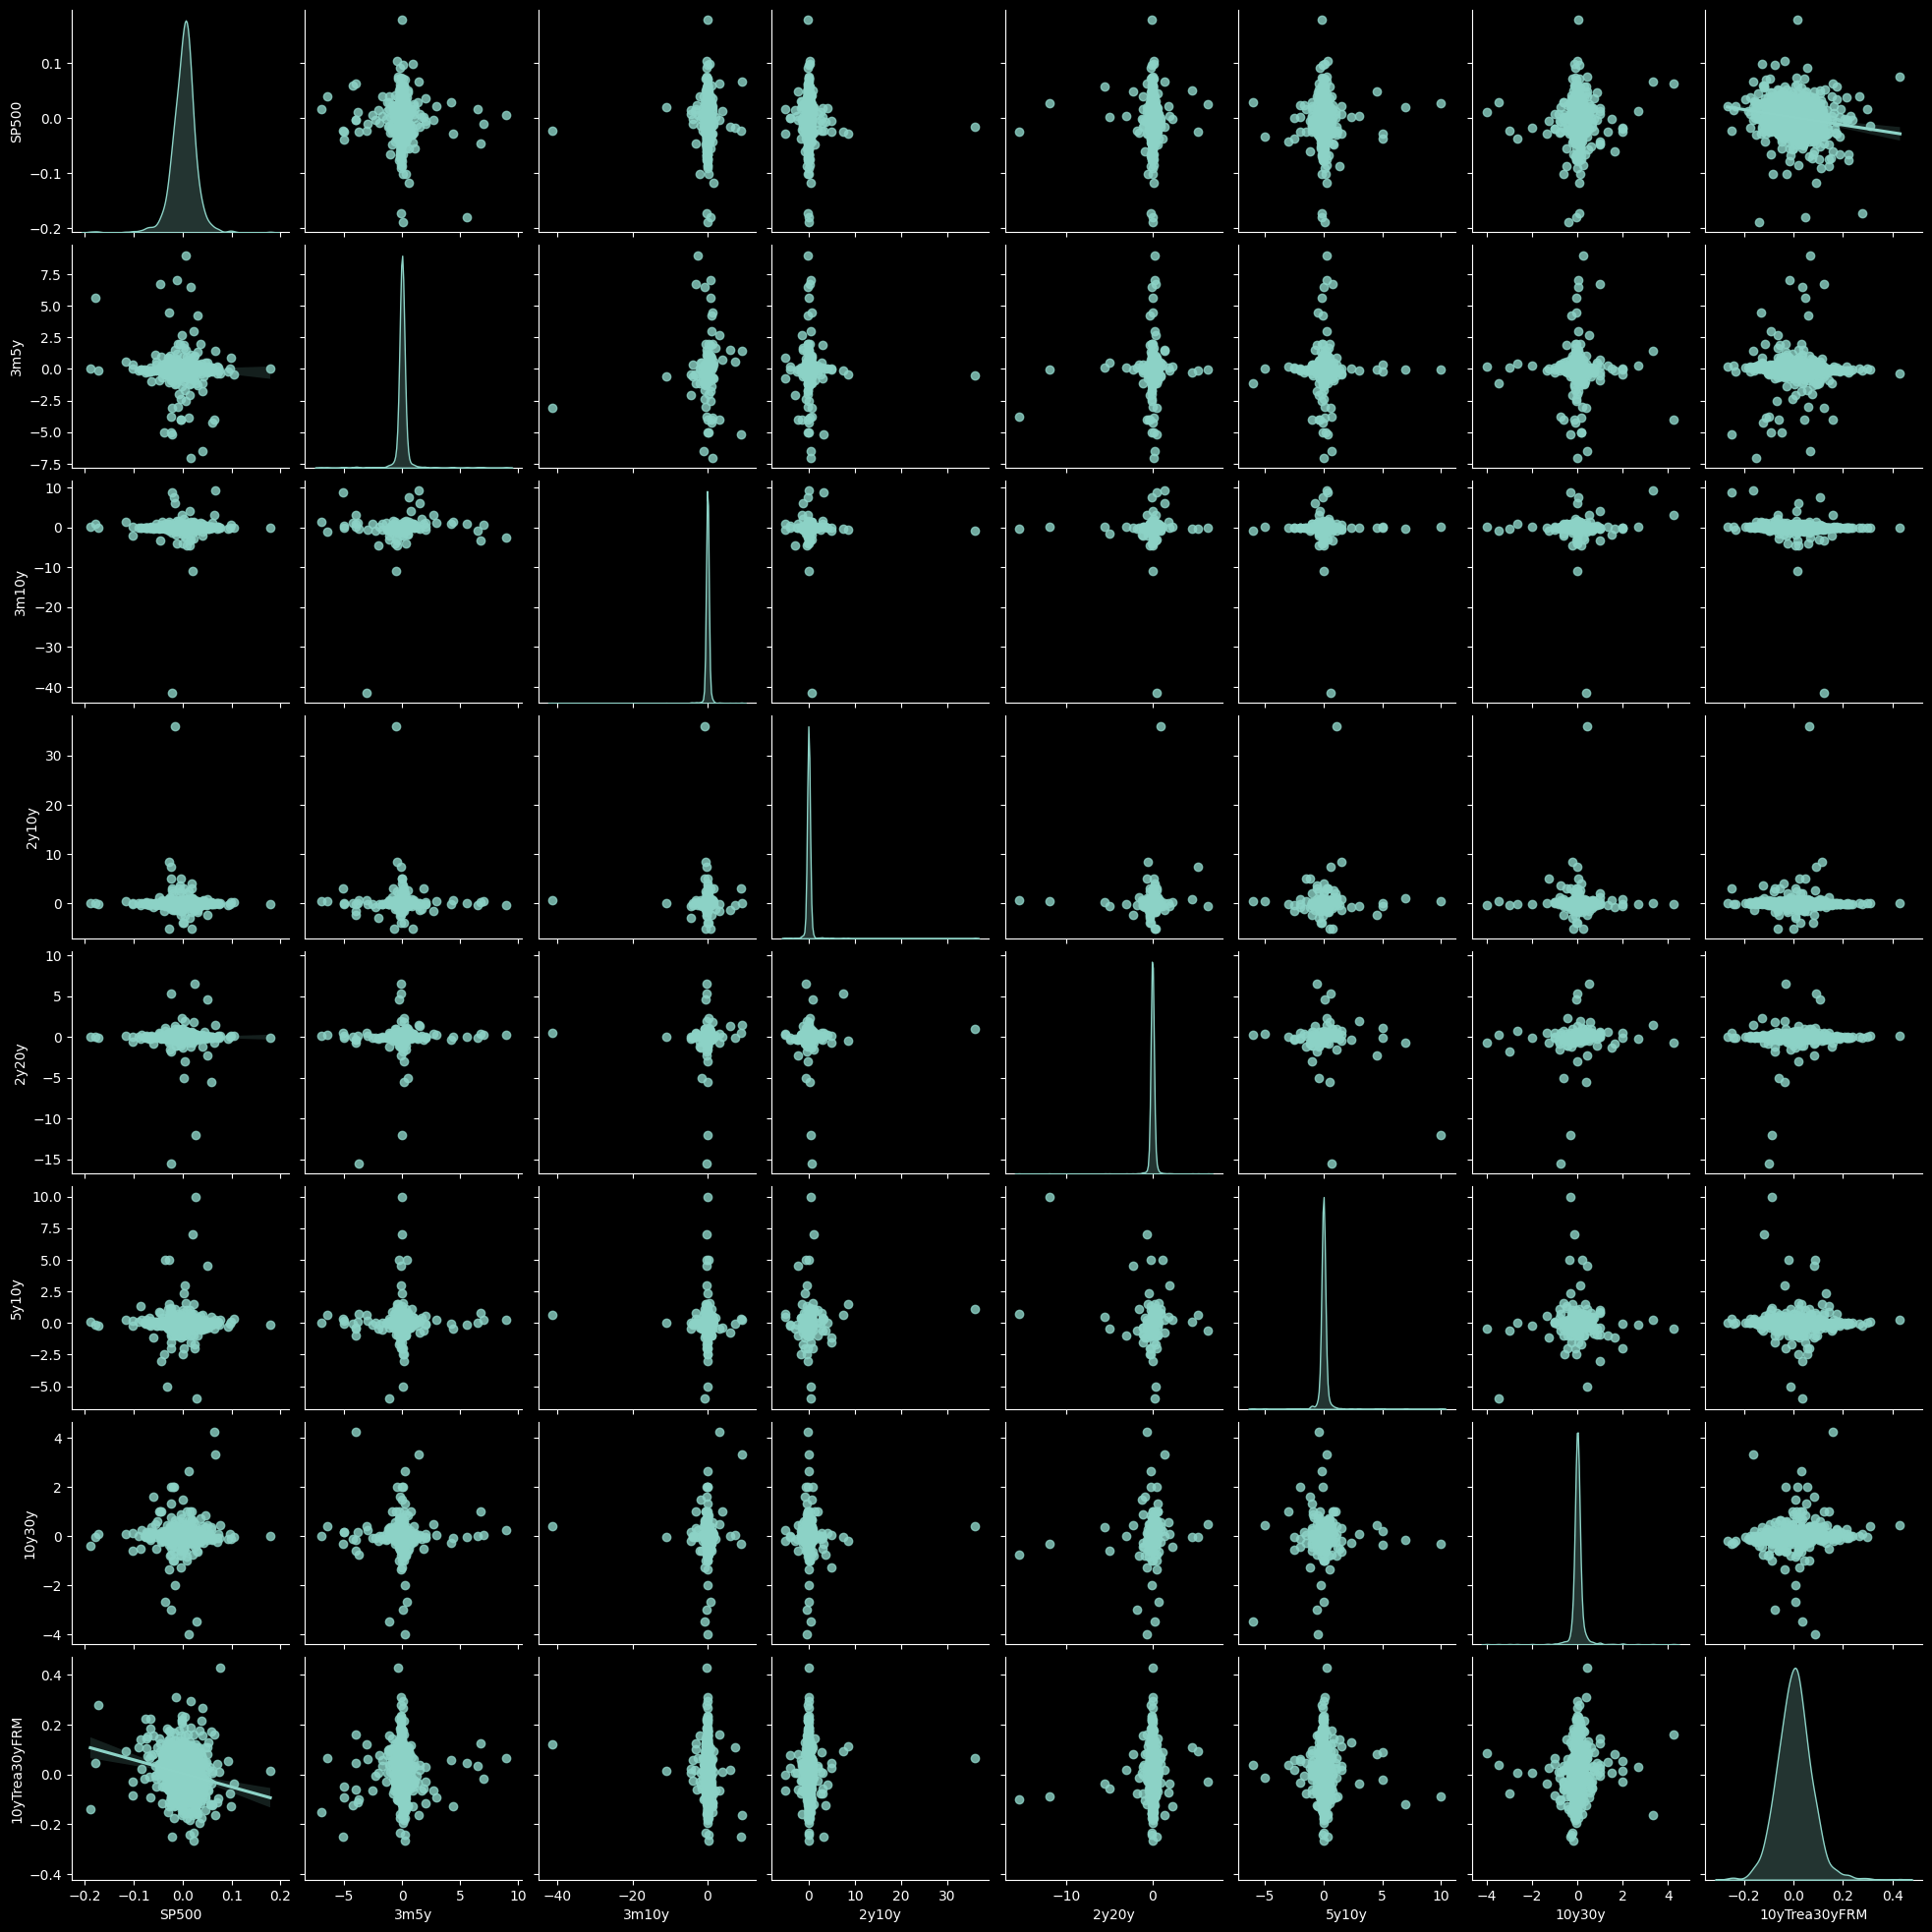

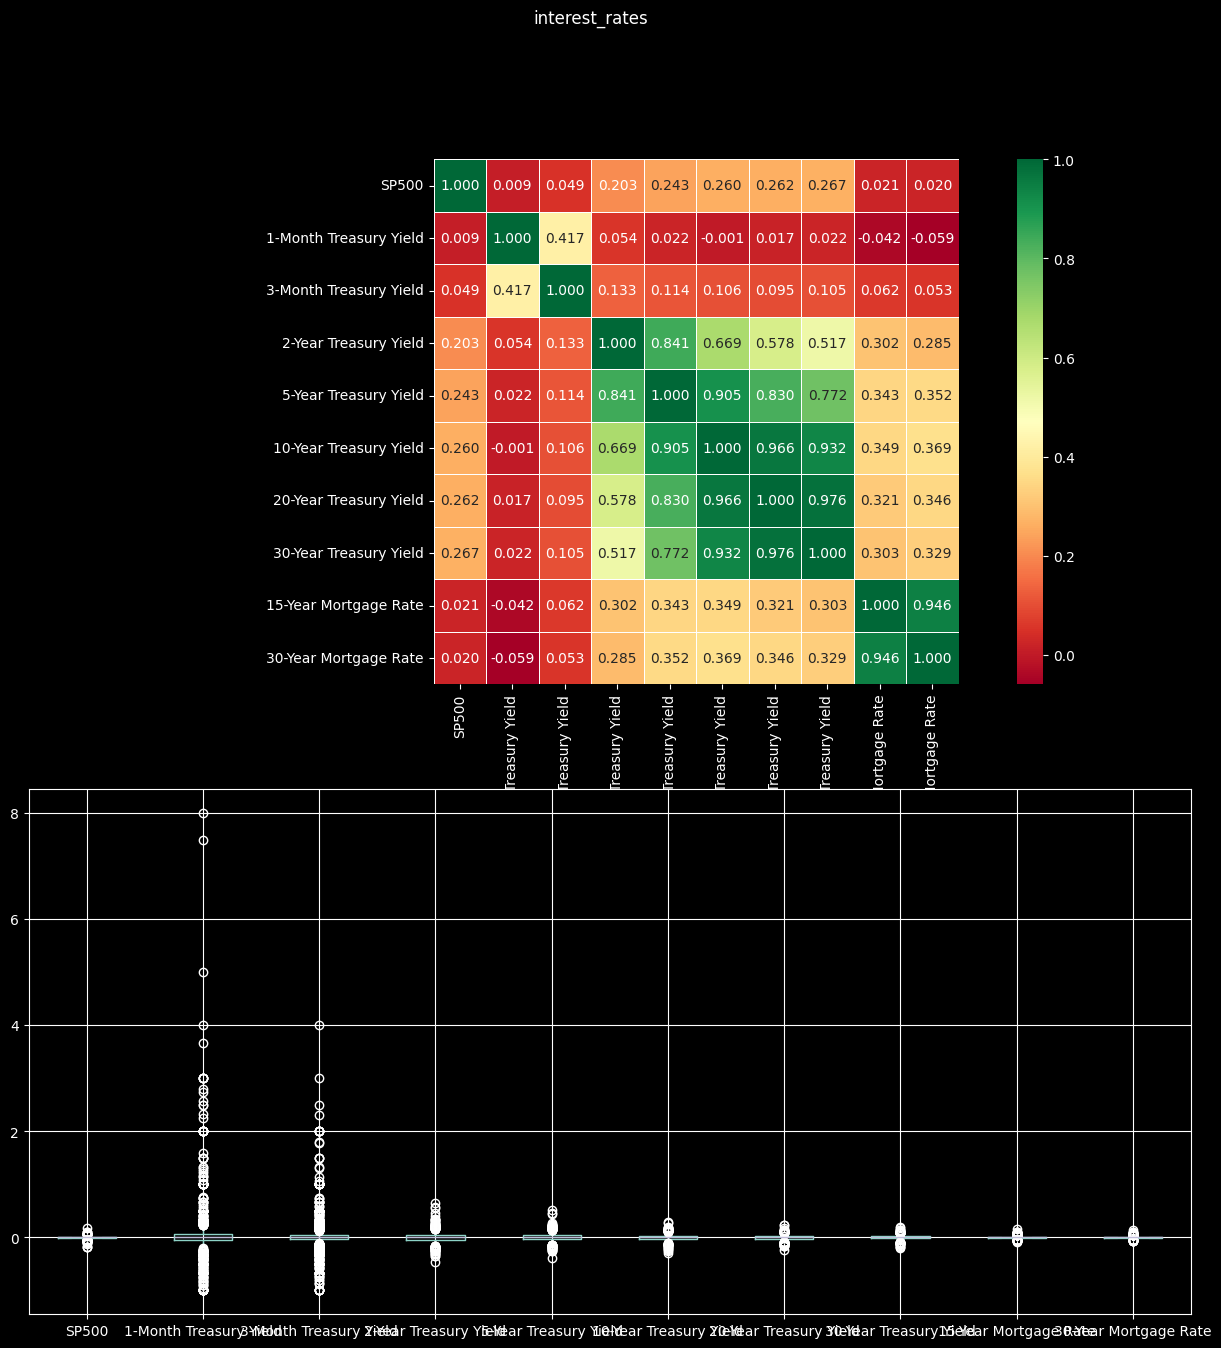

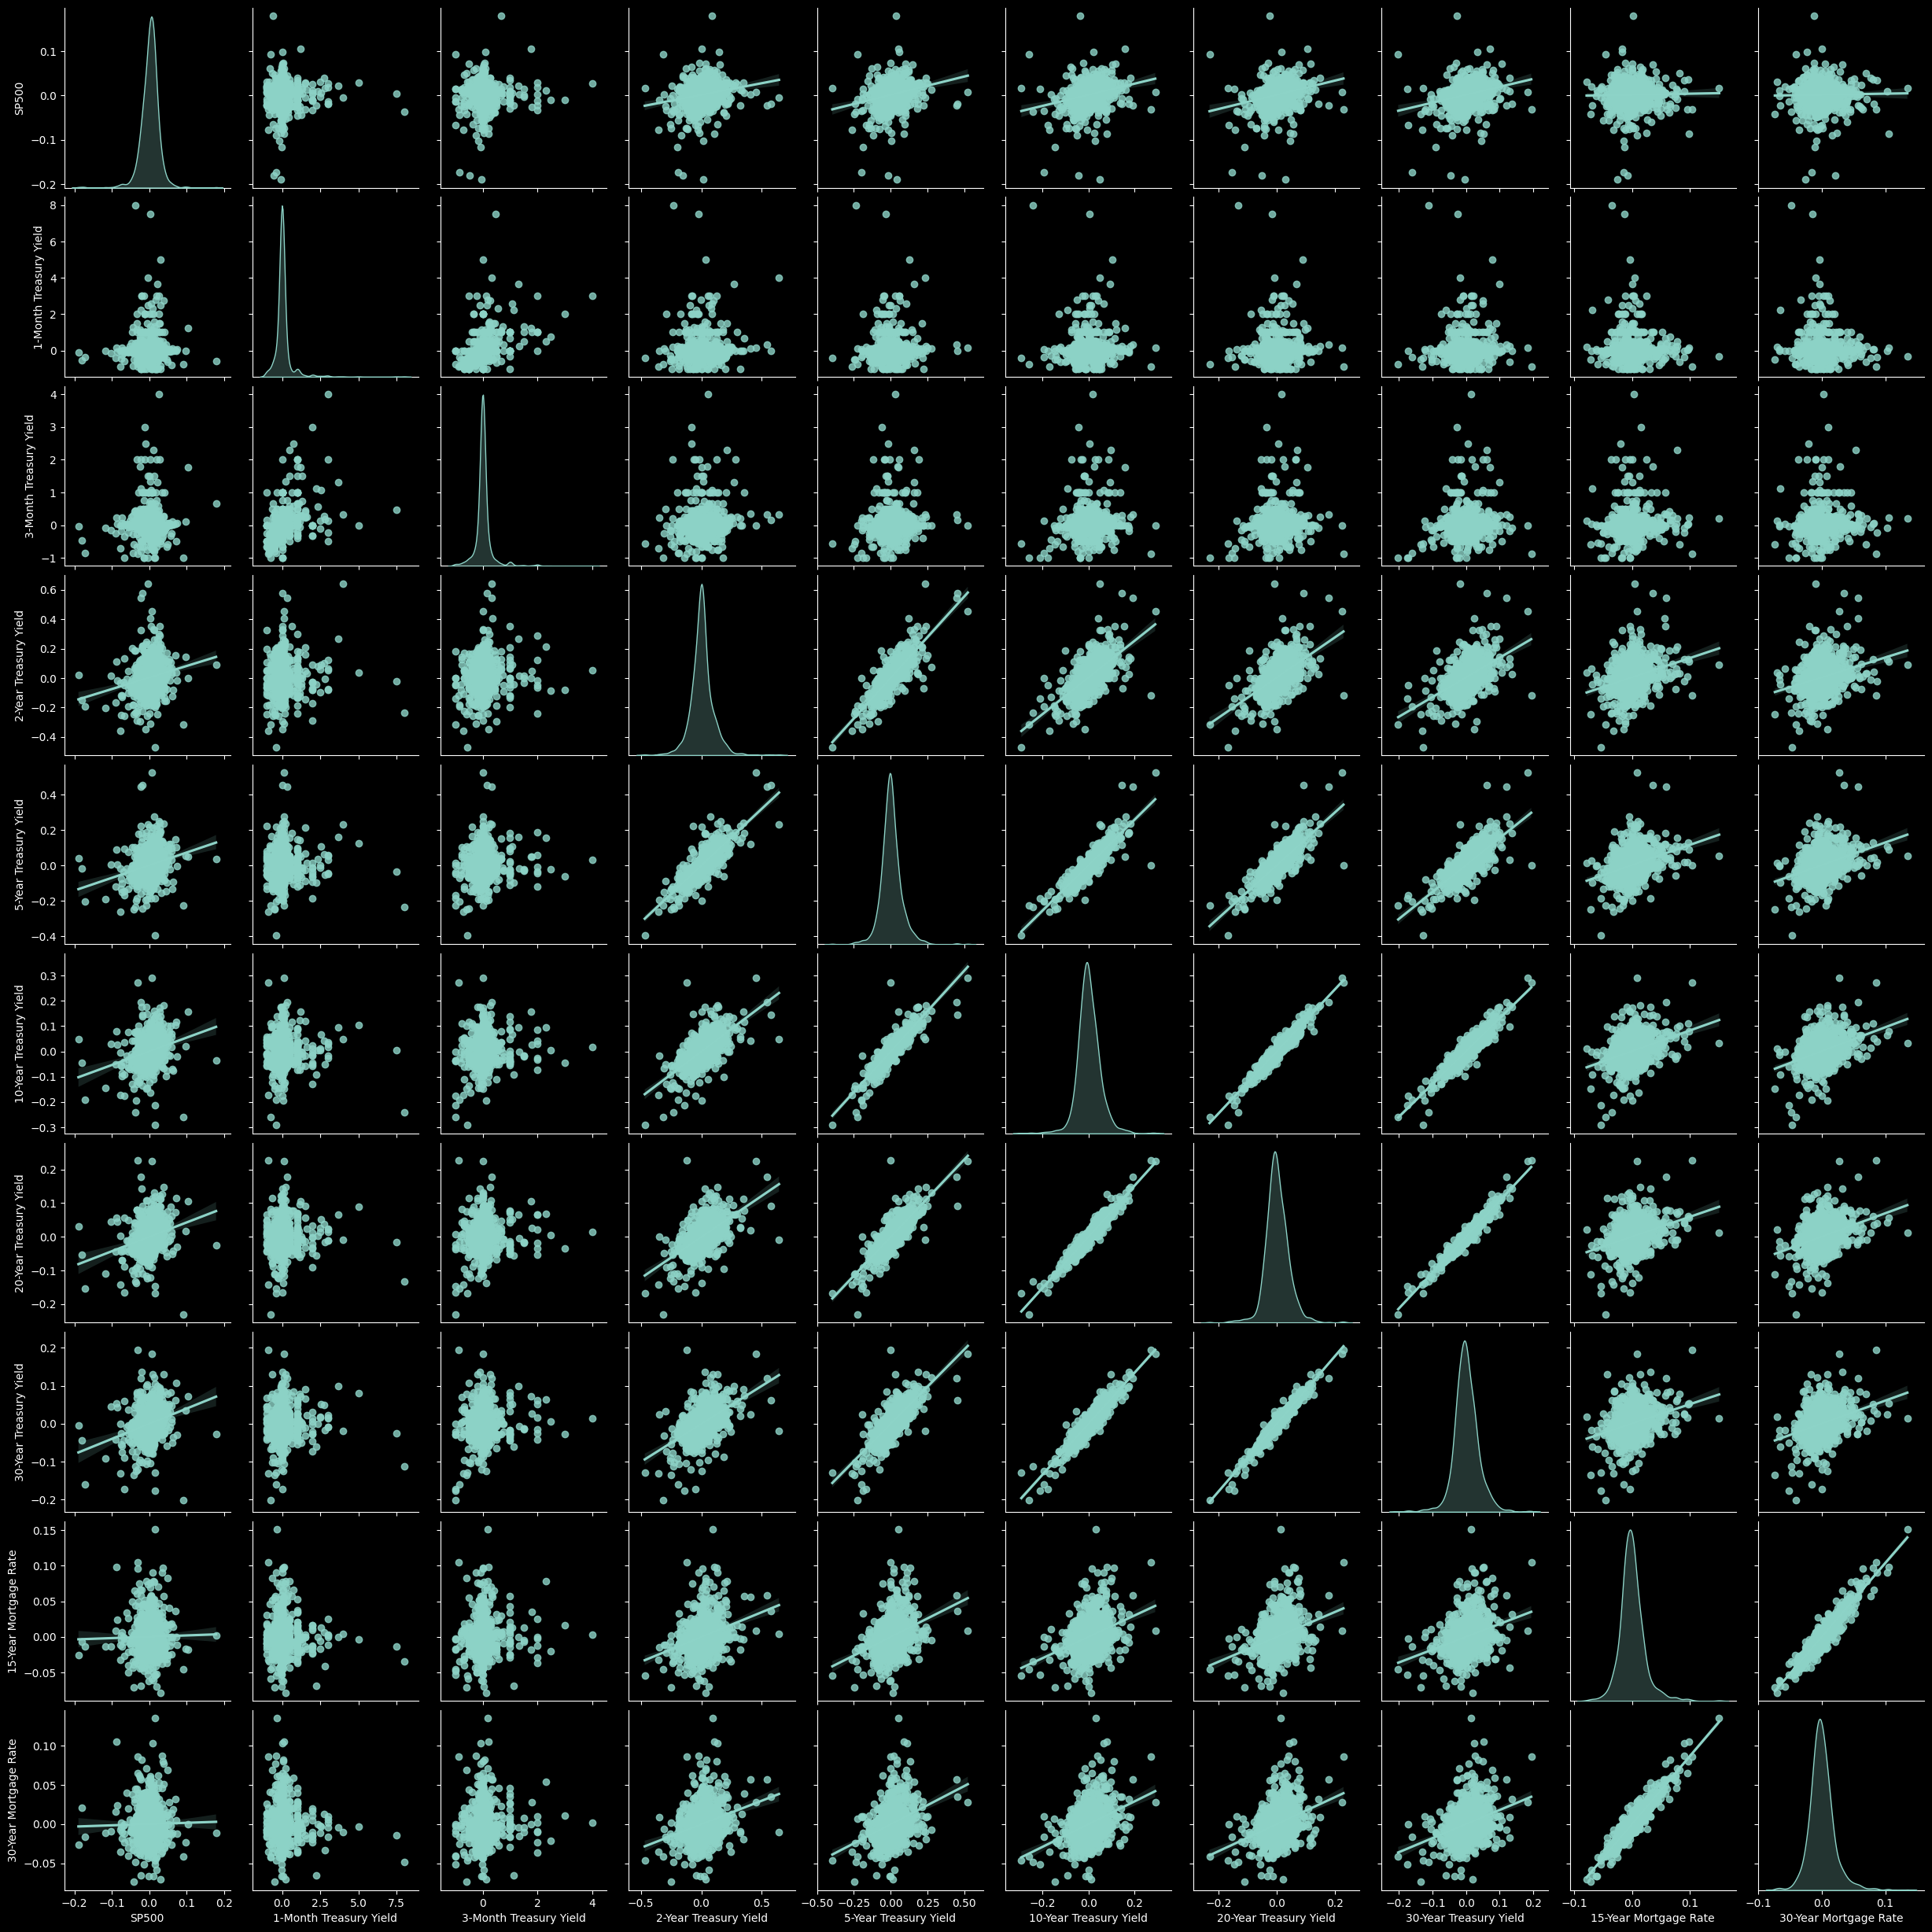

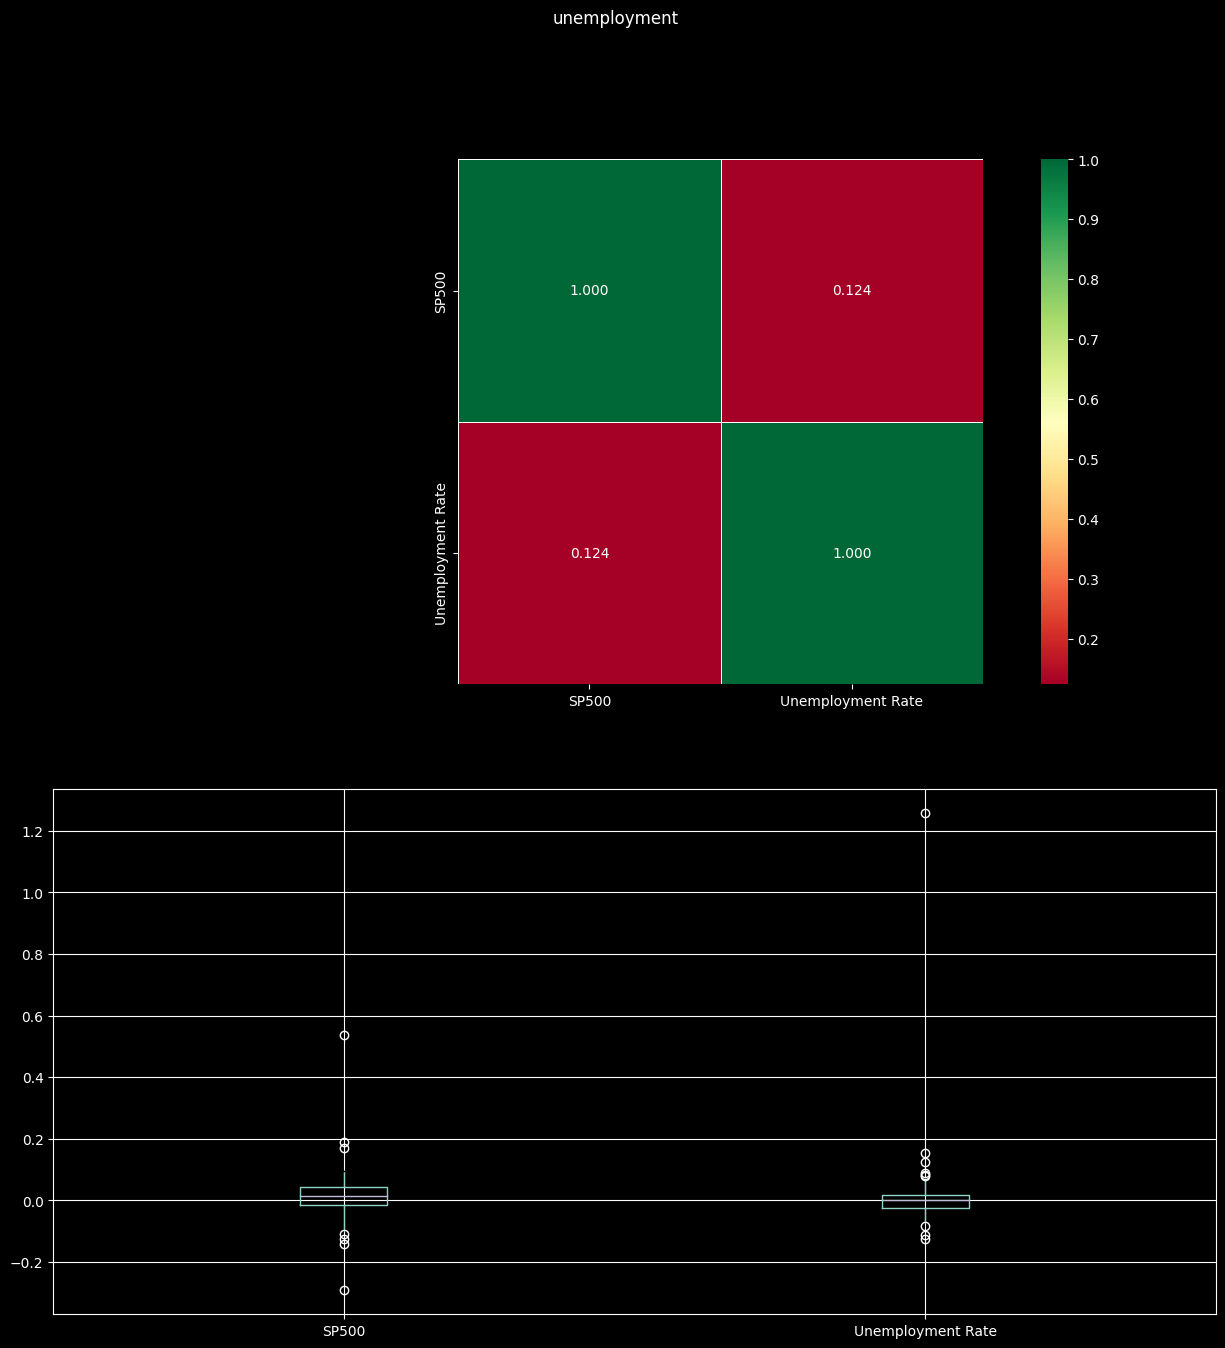

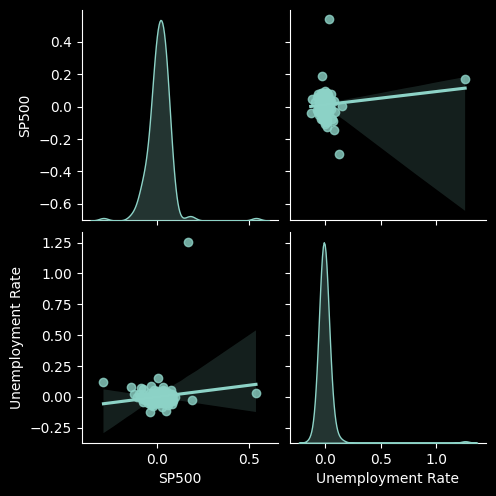

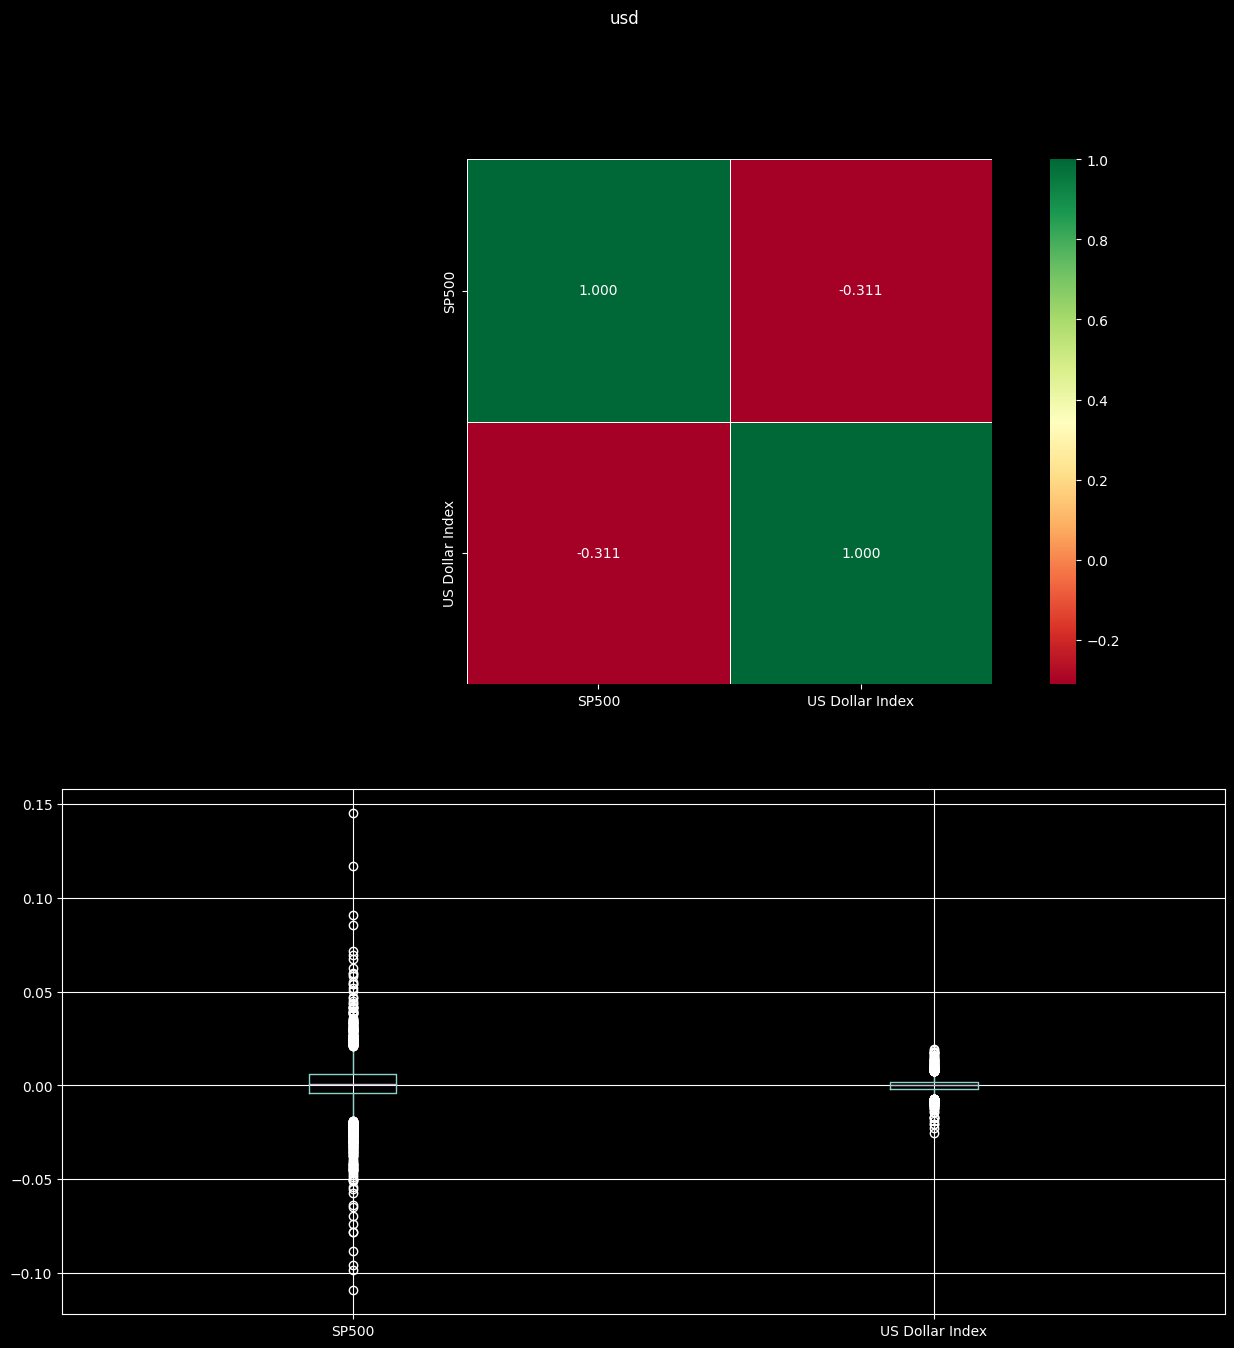

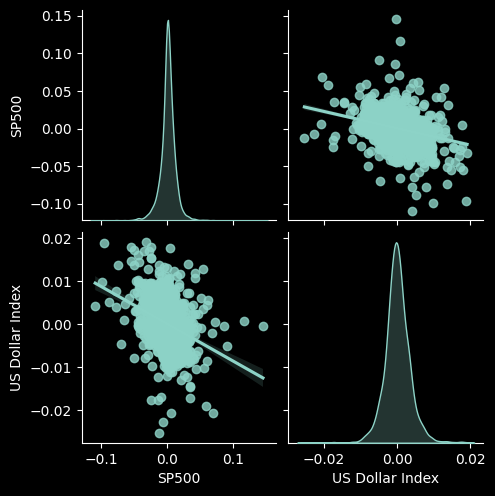

In [24]:
analisis_multivariante = analisis_multivariante(markets=markets, indicators=indicators, df_market_hist=df_market_hist)

### 7. Análisis Bivariante

#### 7.1 GDP (Producto Interior Bruto) vs SPY (S&P500)

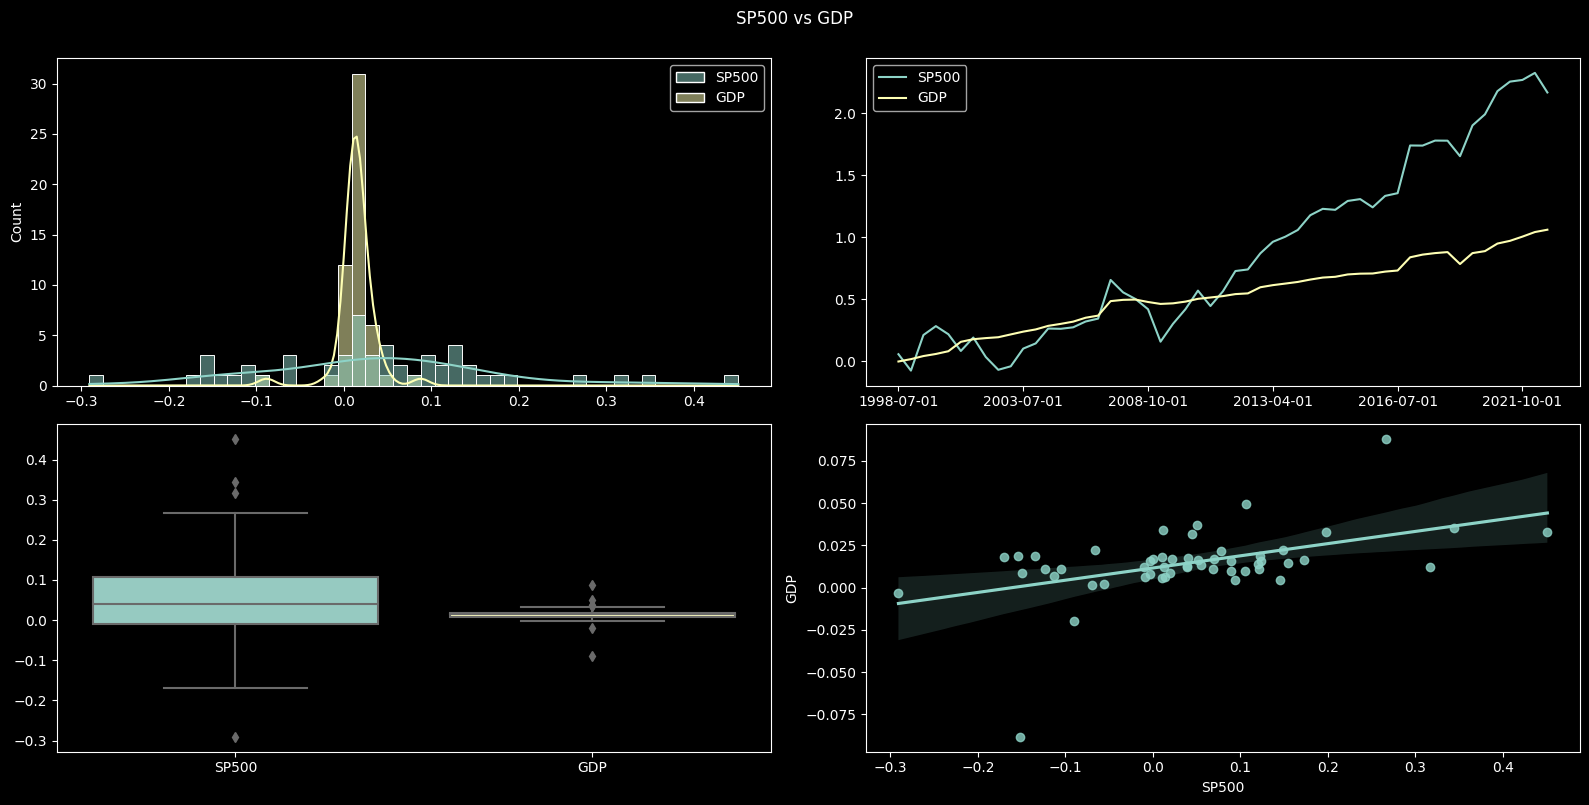

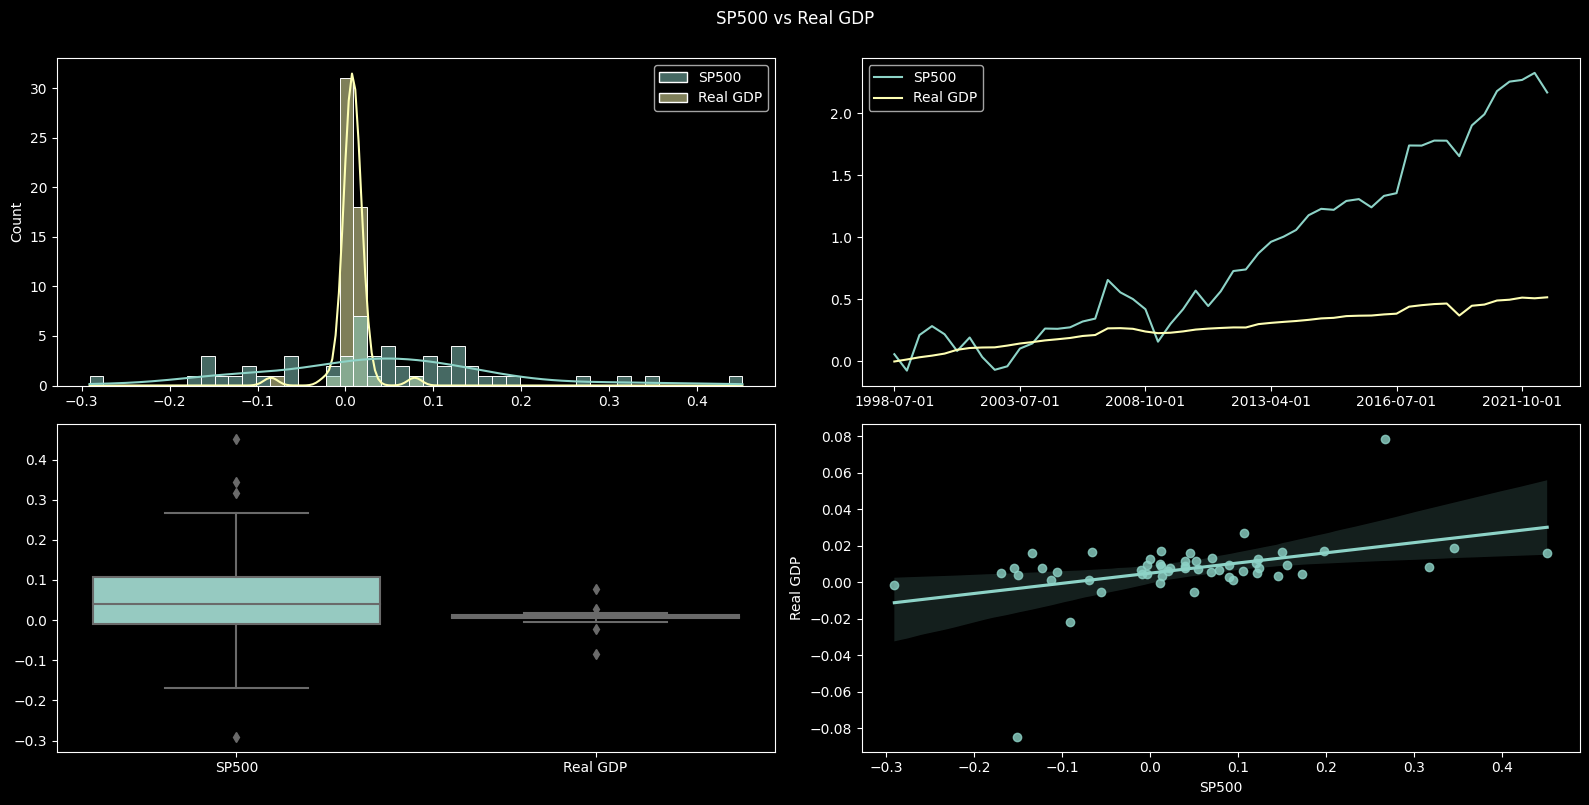

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [25]:
gdp_mkt = analisis_bivariante(markets=markets, indicators_names=gdp,stock_start=stock_start,stock_end=stock_end, df_market_cum=df_market_cum, df_market_hist=df_market_hist, inds_dict=gdp_dict)

#### 7.2 Inflación vs SPY (S&P500)

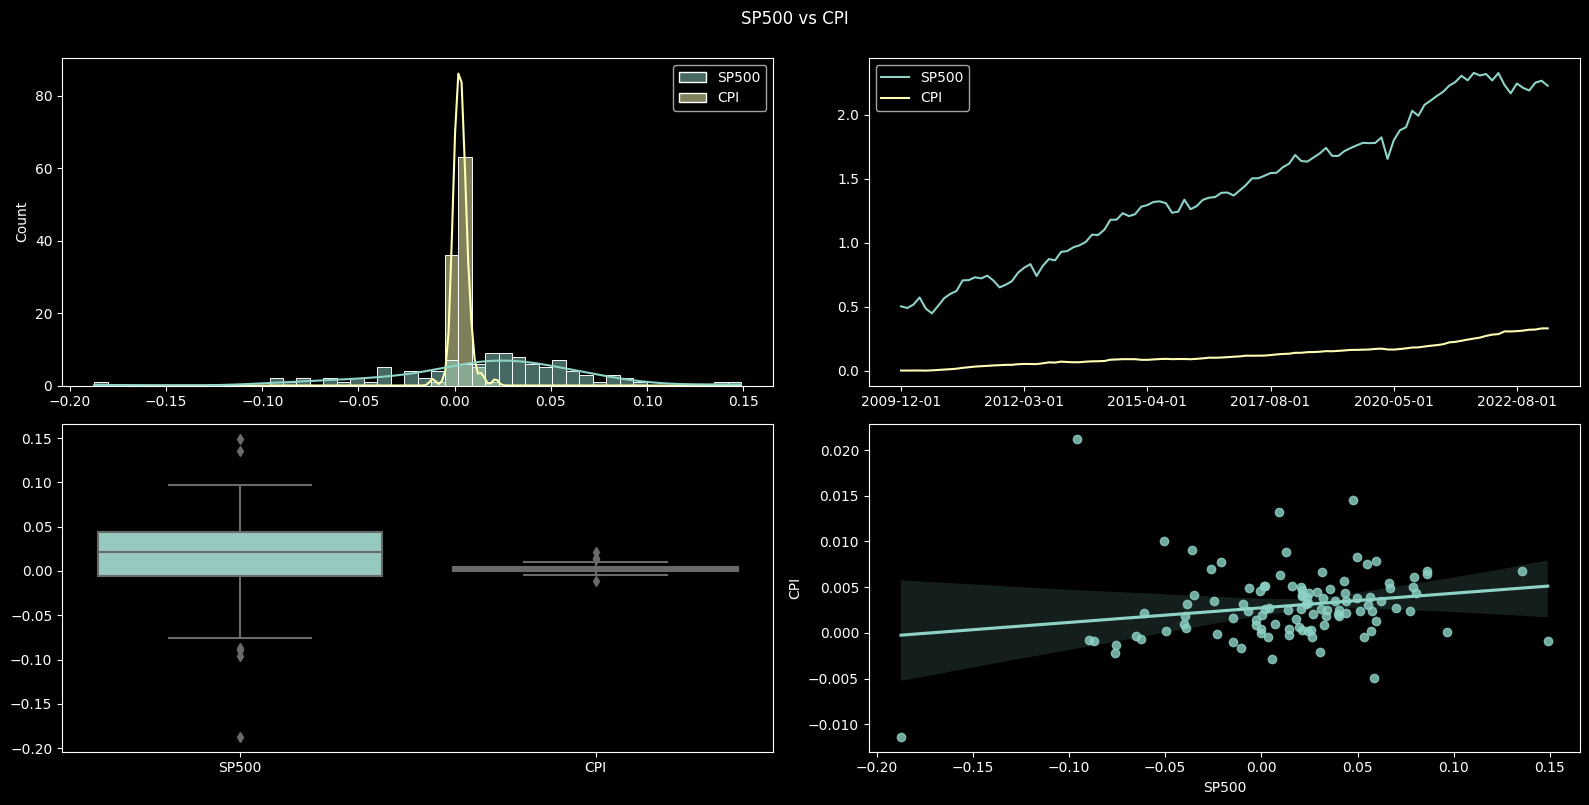

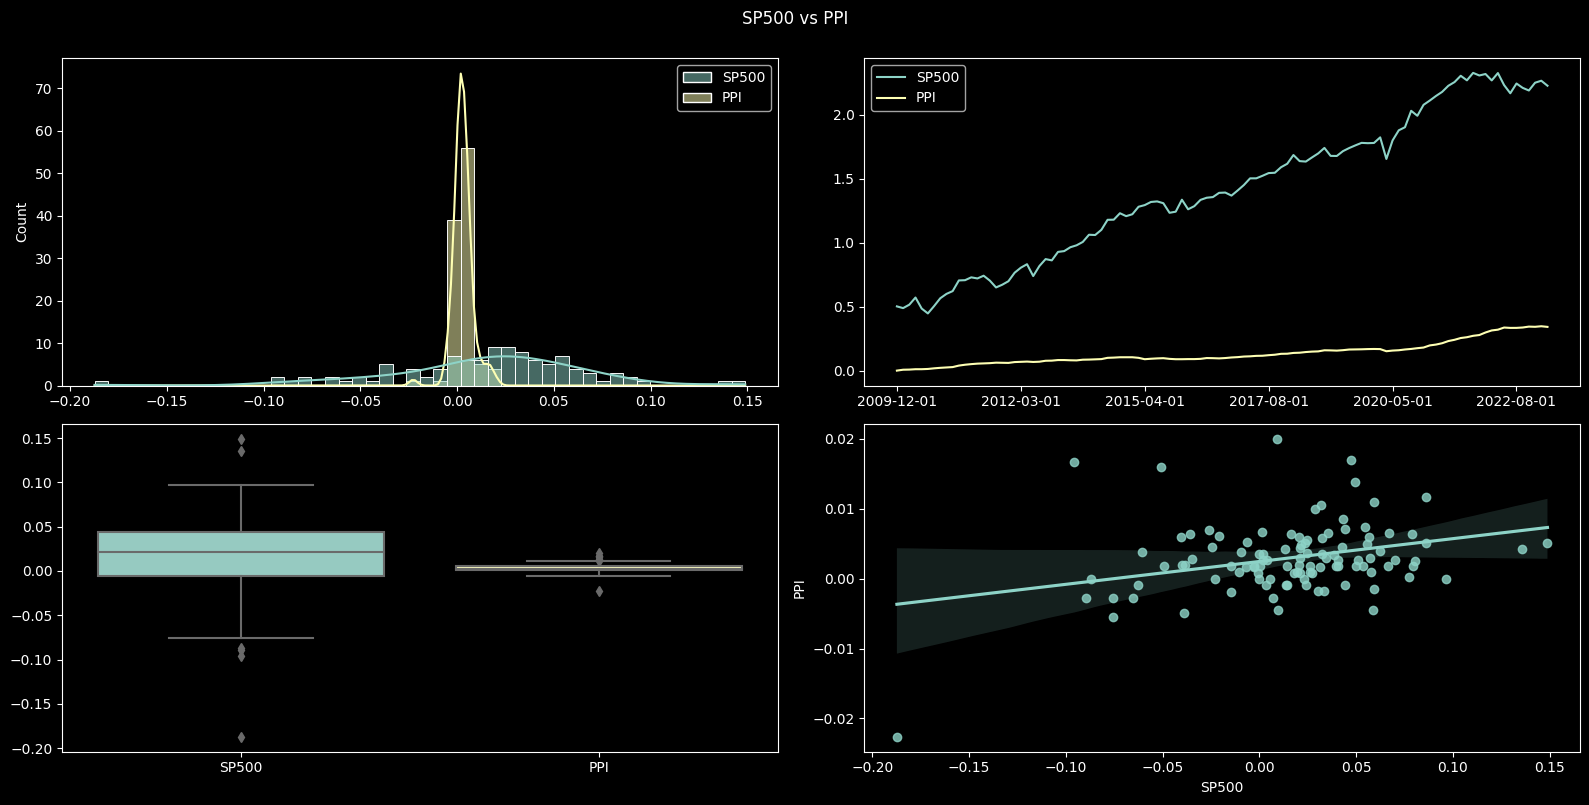

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [26]:
inflation_mkt = analisis_bivariante(markets=markets, indicators_names=inflation,stock_start=stock_start,stock_end=stock_end, df_market_cum=df_market_cum, df_market_hist=df_market_hist, inds_dict=inflation_dict)

#### 7.3 Tipos de Interés vs SPY (S&P500)

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


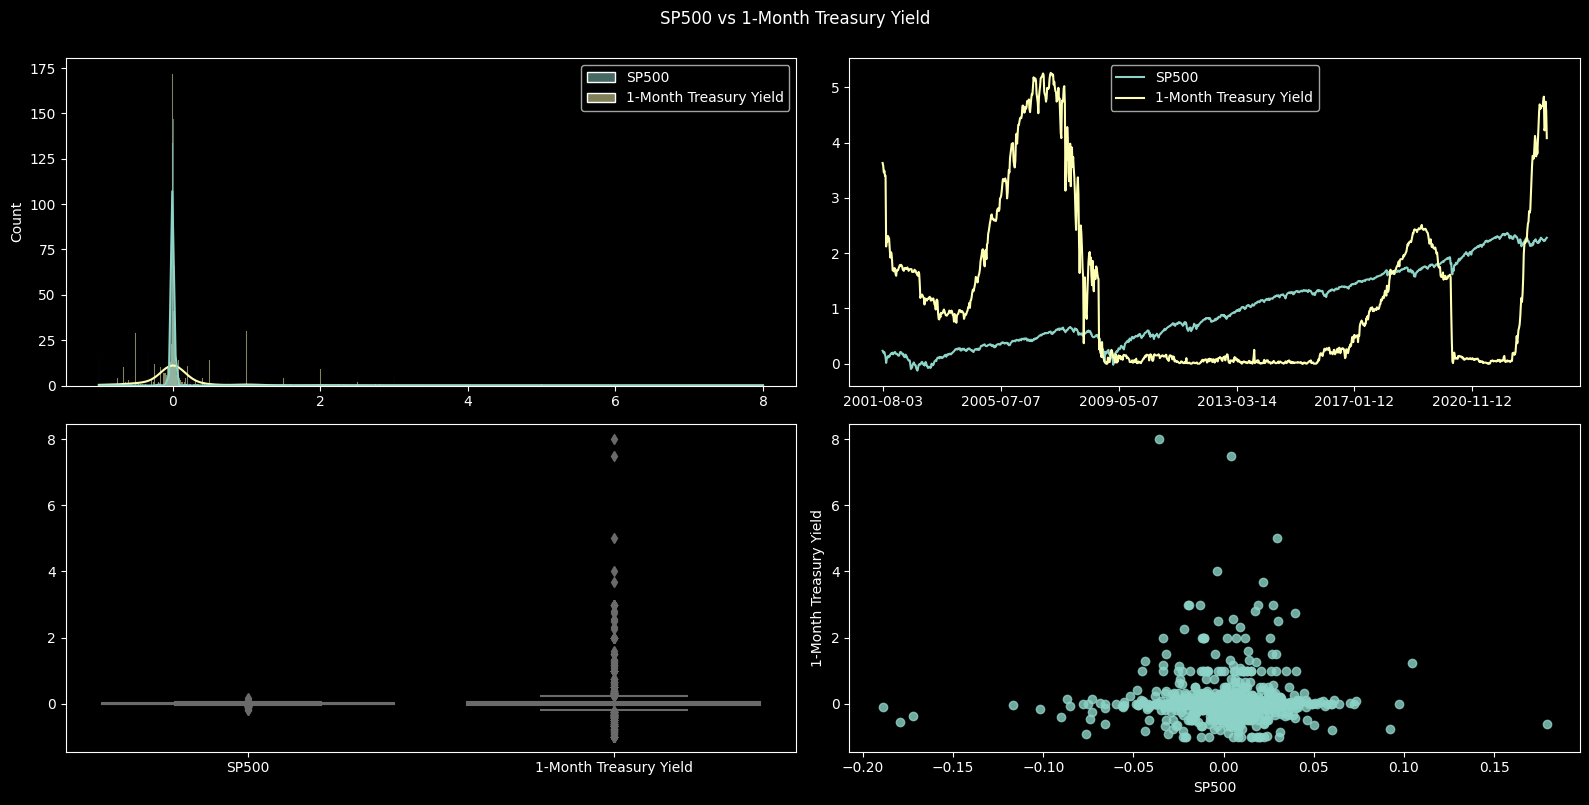

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


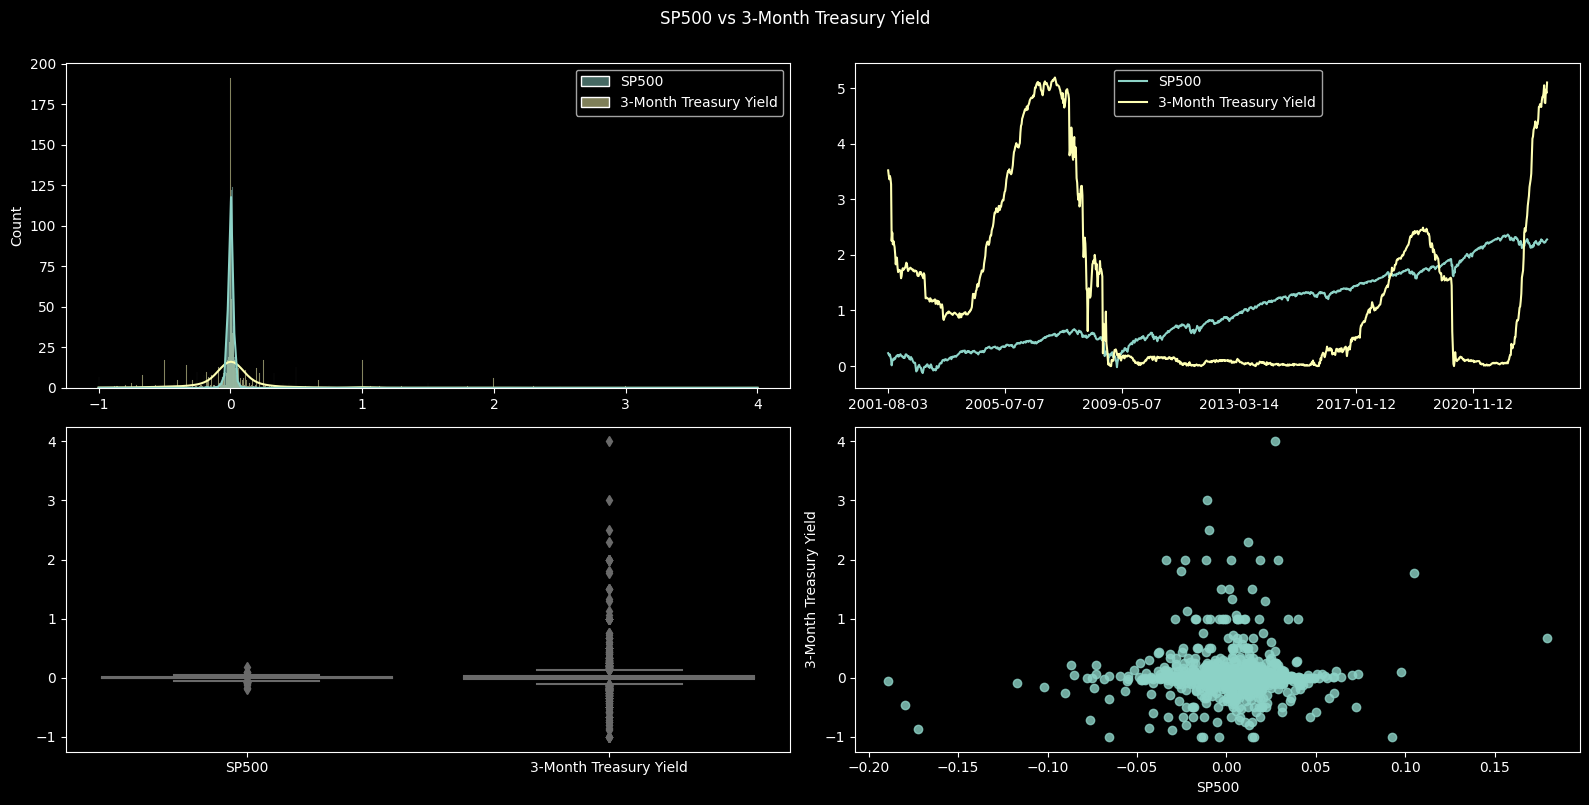

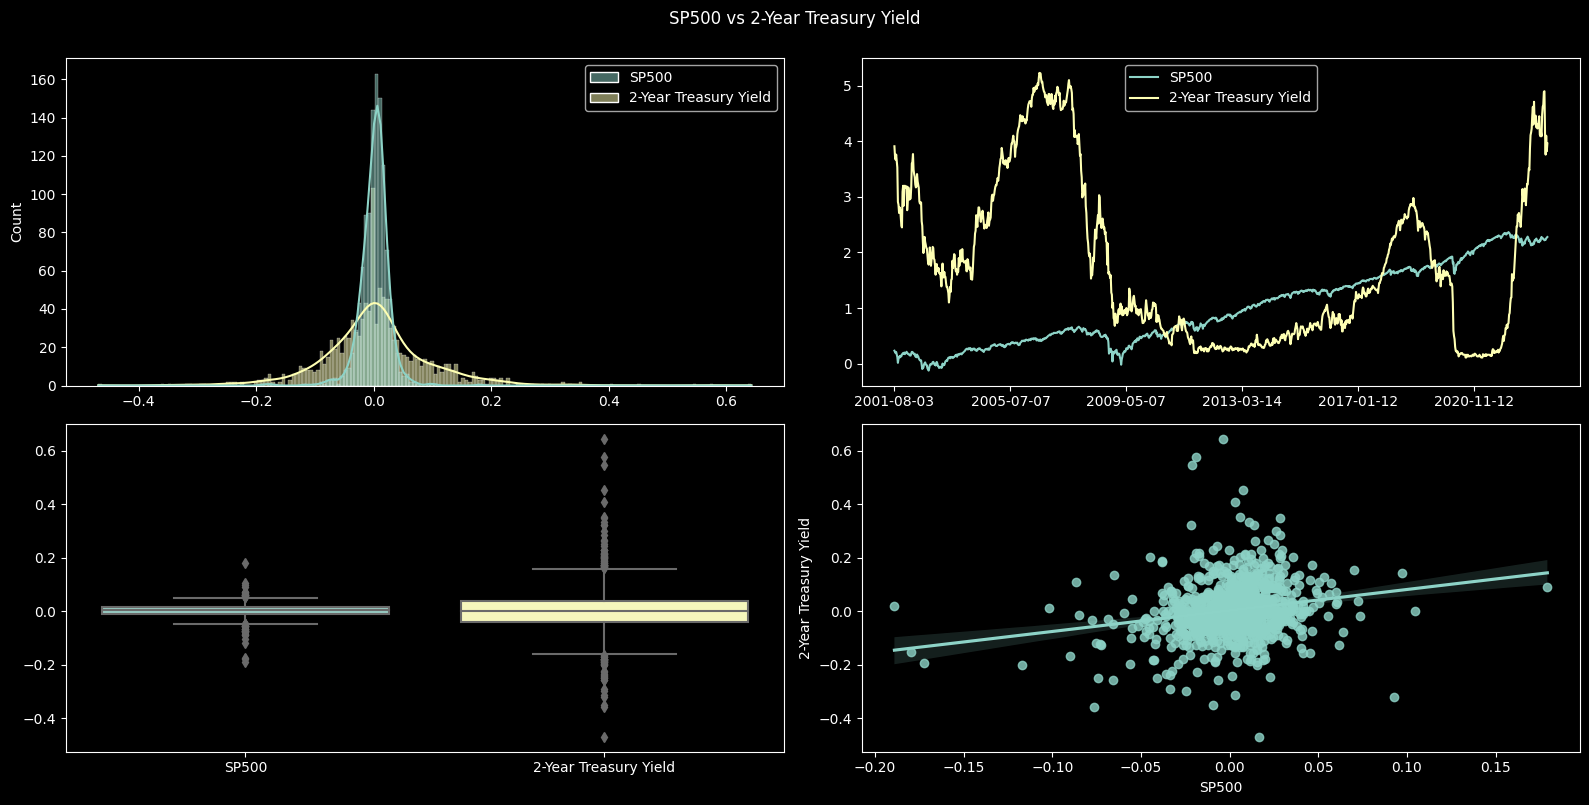

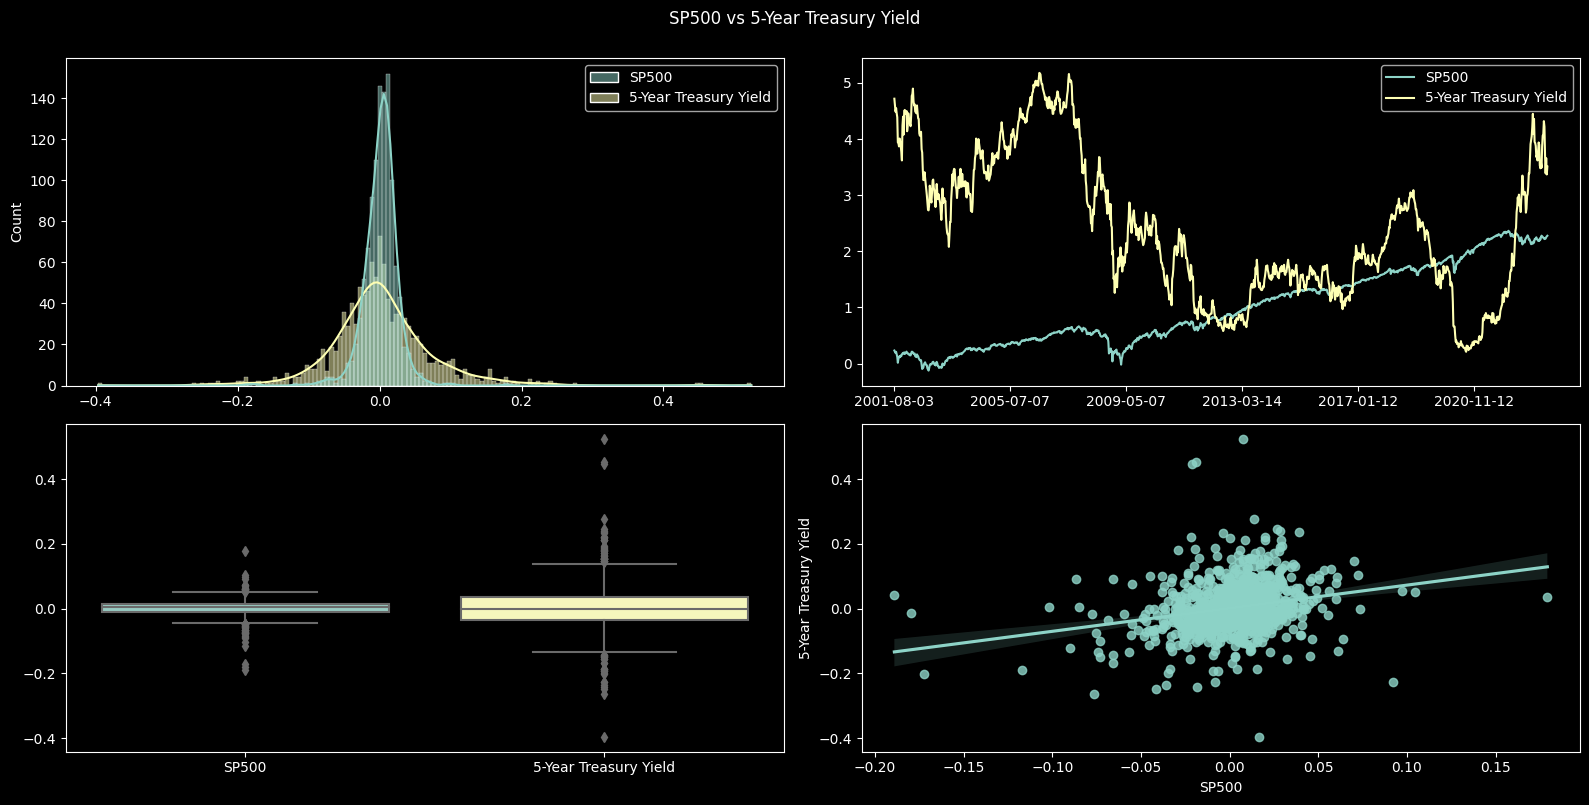

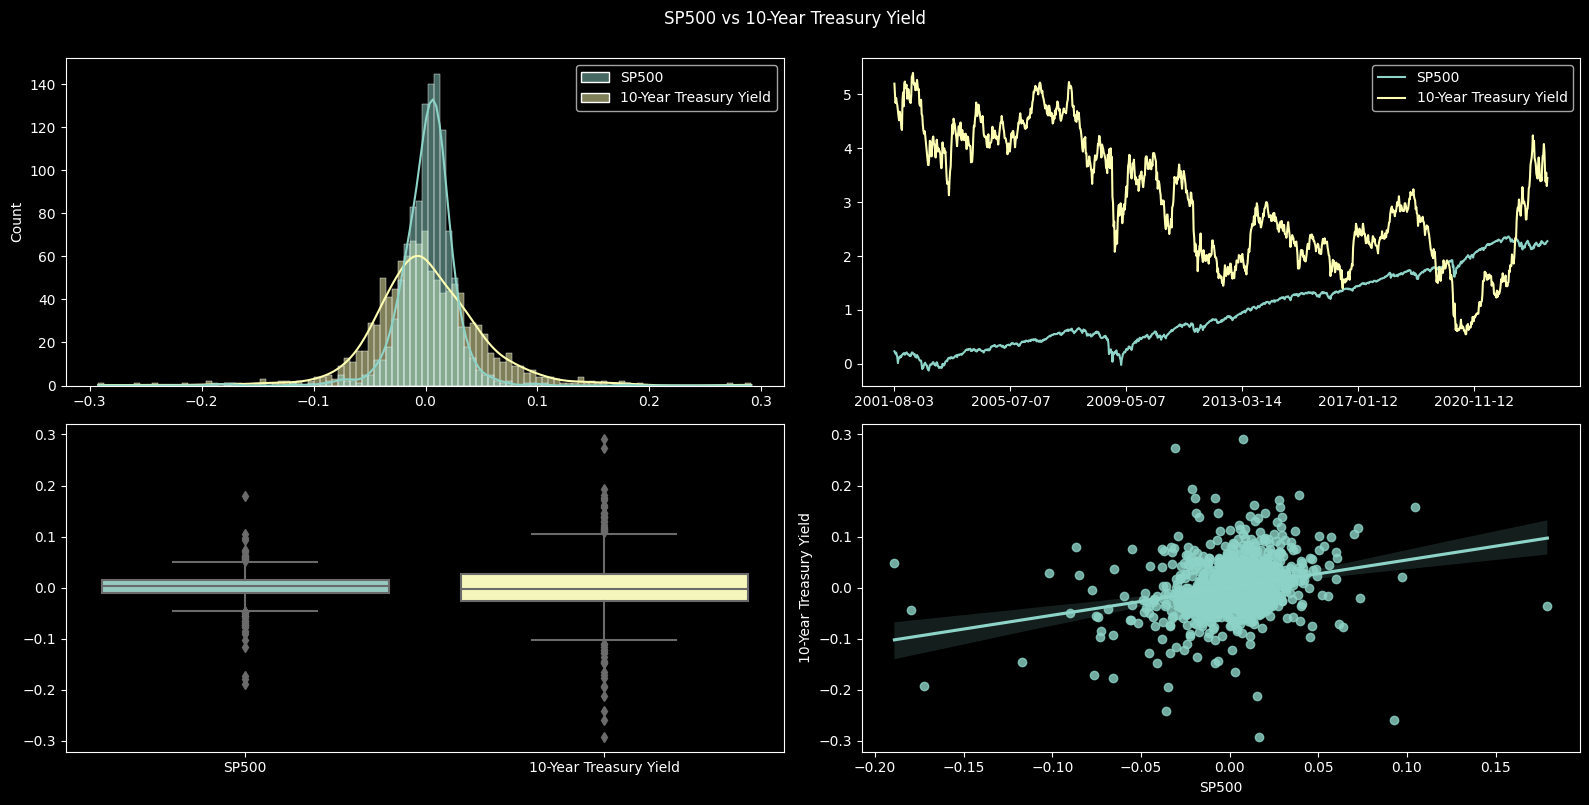

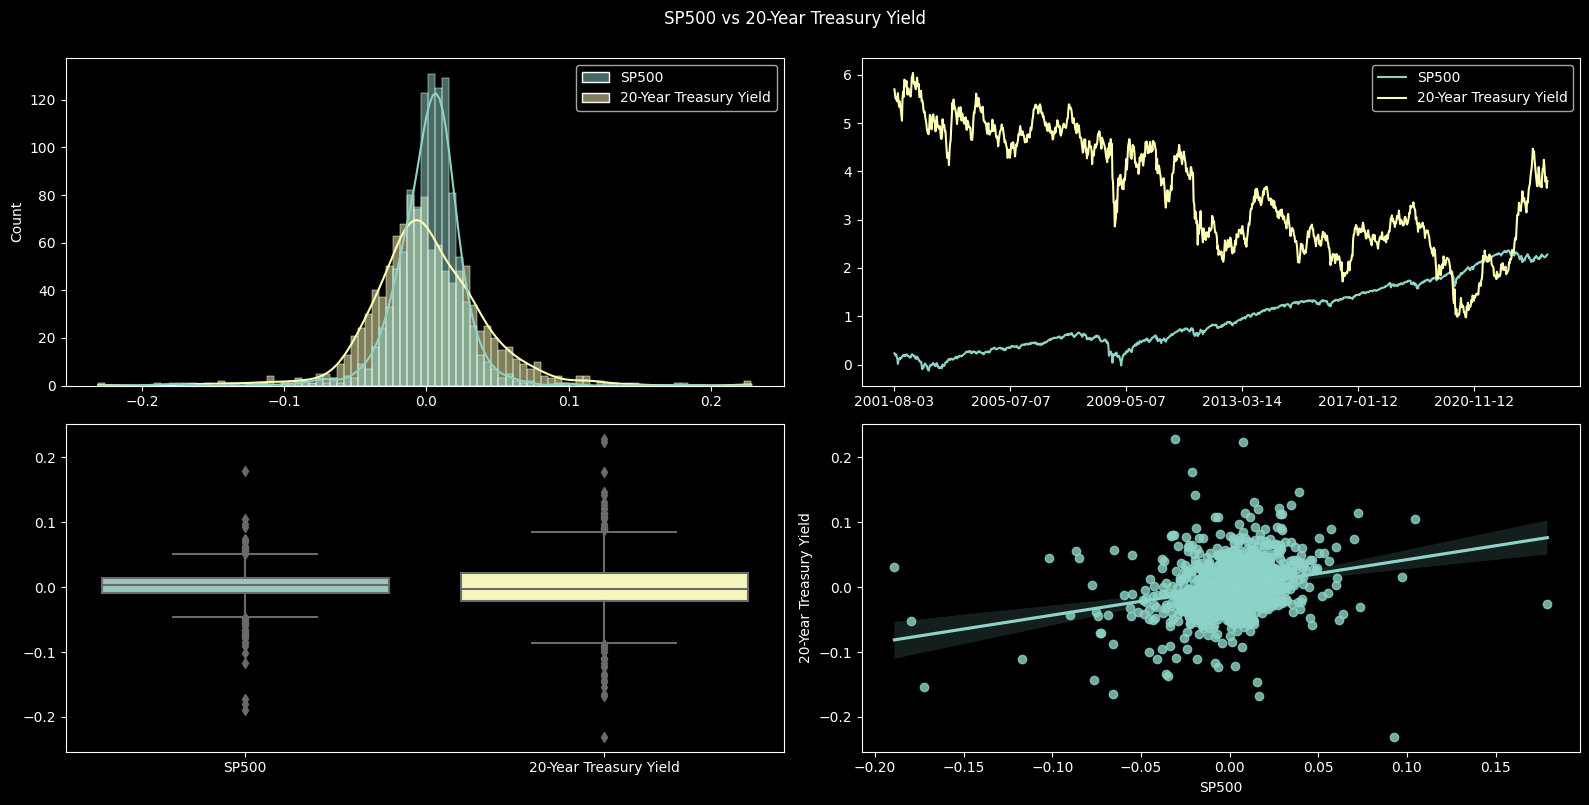

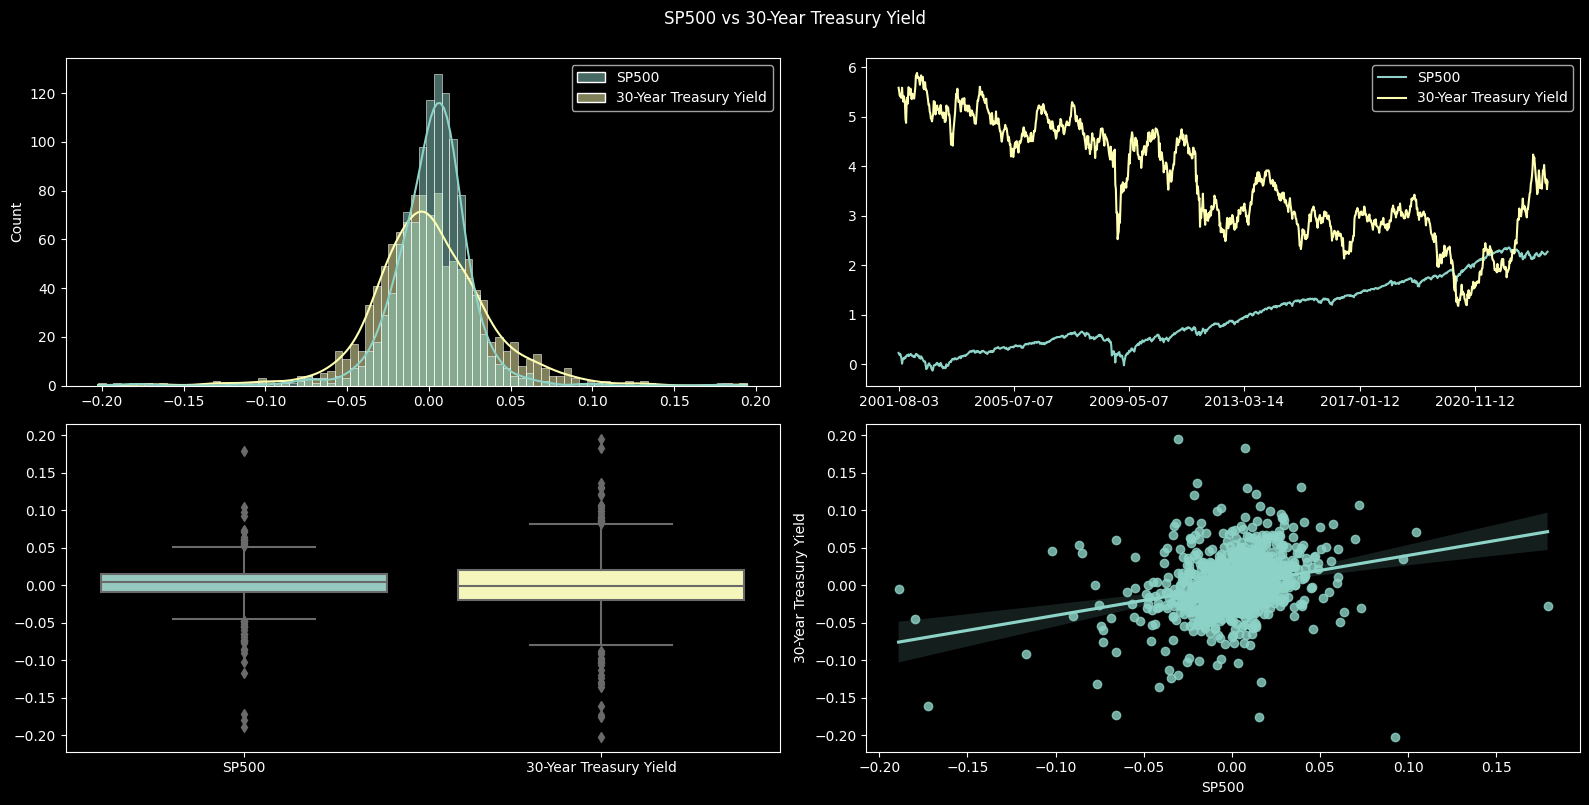

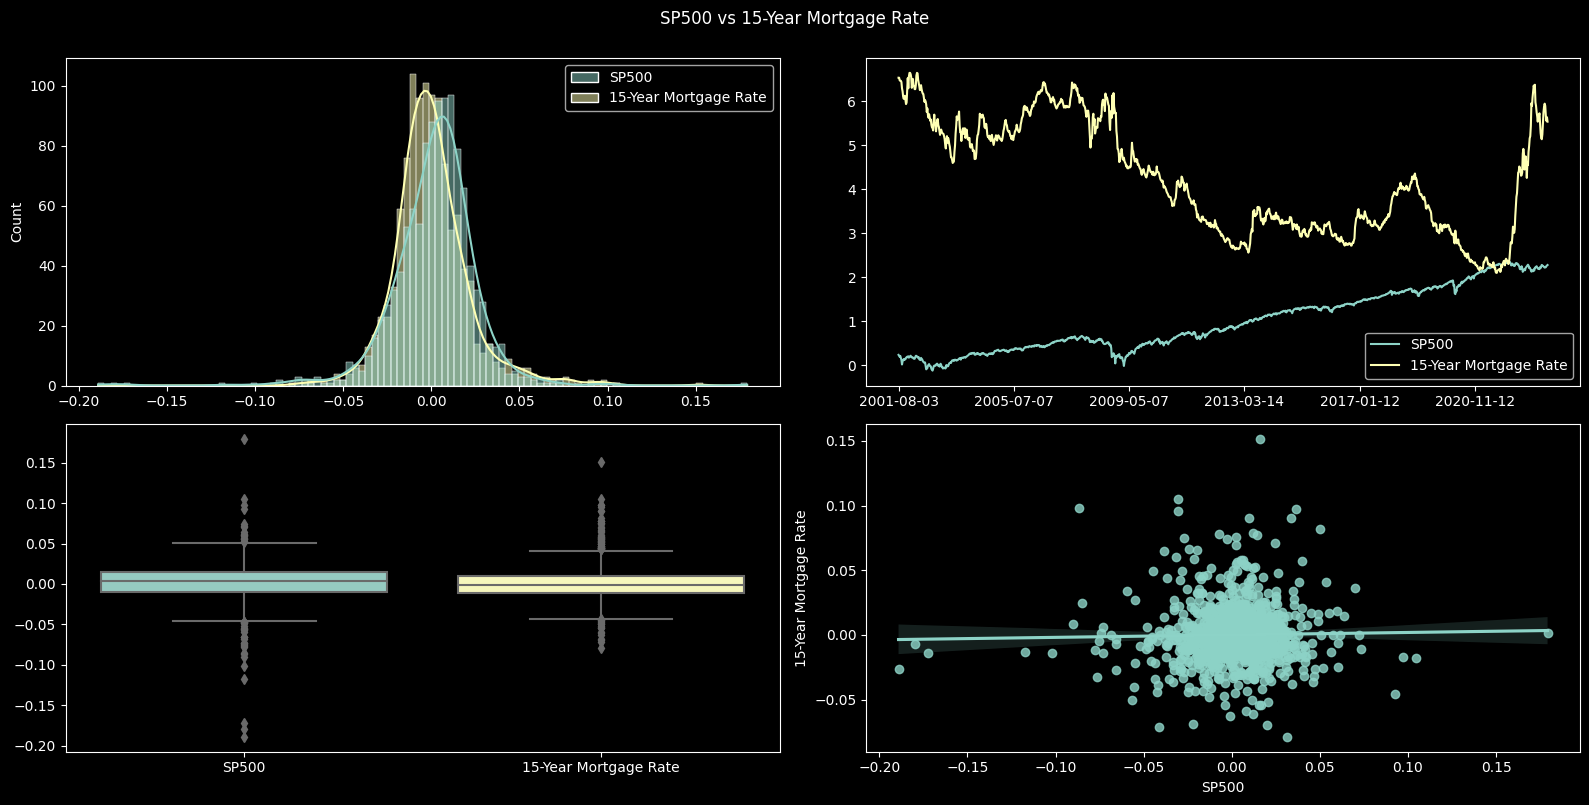

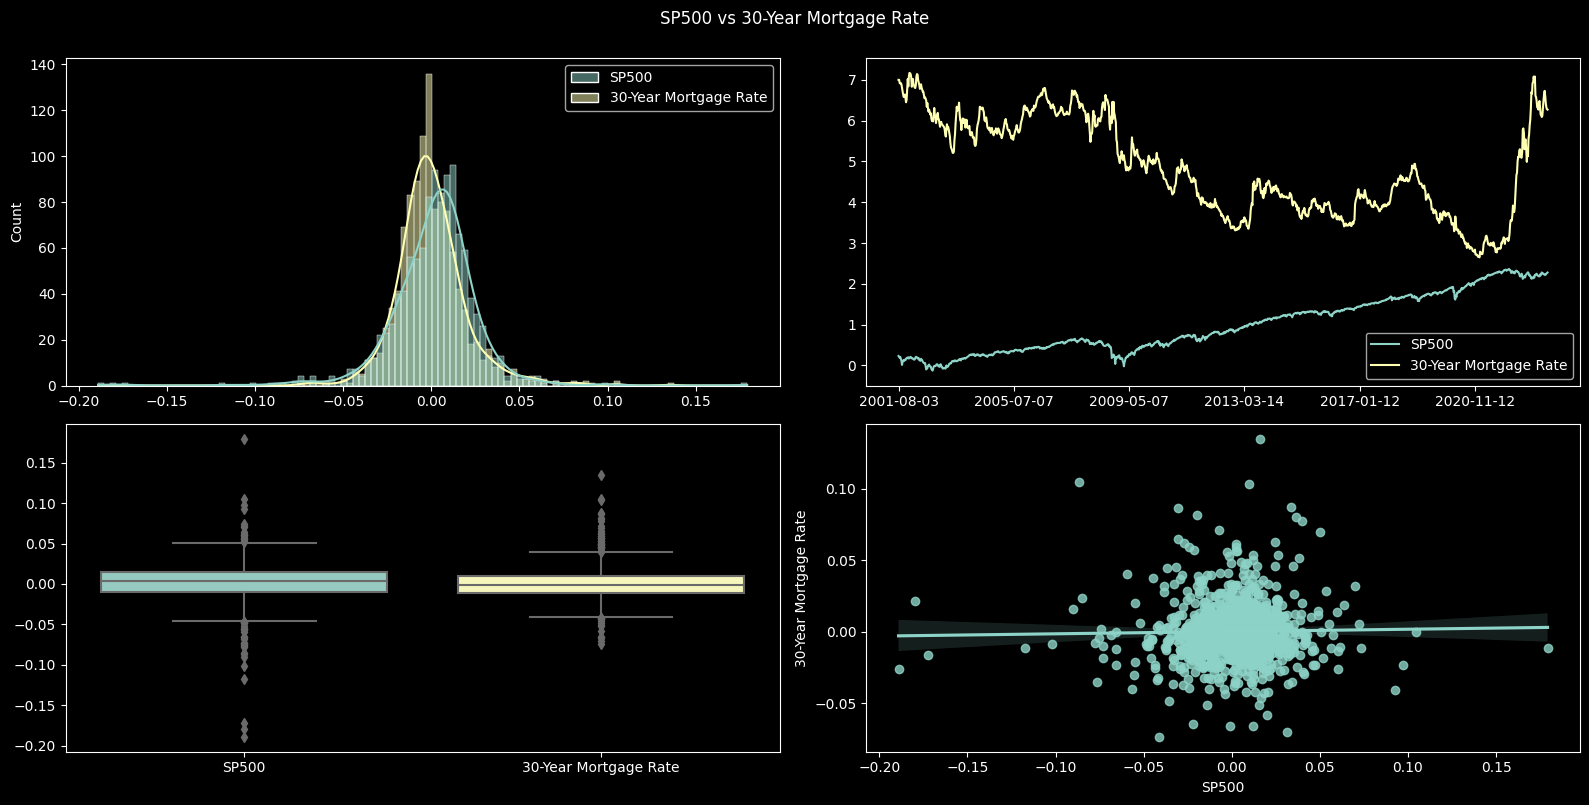

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [27]:
interest_rates_mkt = analisis_bivariante(markets=markets, indicators_names=interest_rates,stock_start=stock_start,stock_end=stock_end, df_market_cum=df_market_cum, df_market_hist=df_market_hist, inds_dict=interest_rates_dict)

#### 7.4 Diferenciales de los Tipos de Interés vs SPY (S&P500)

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


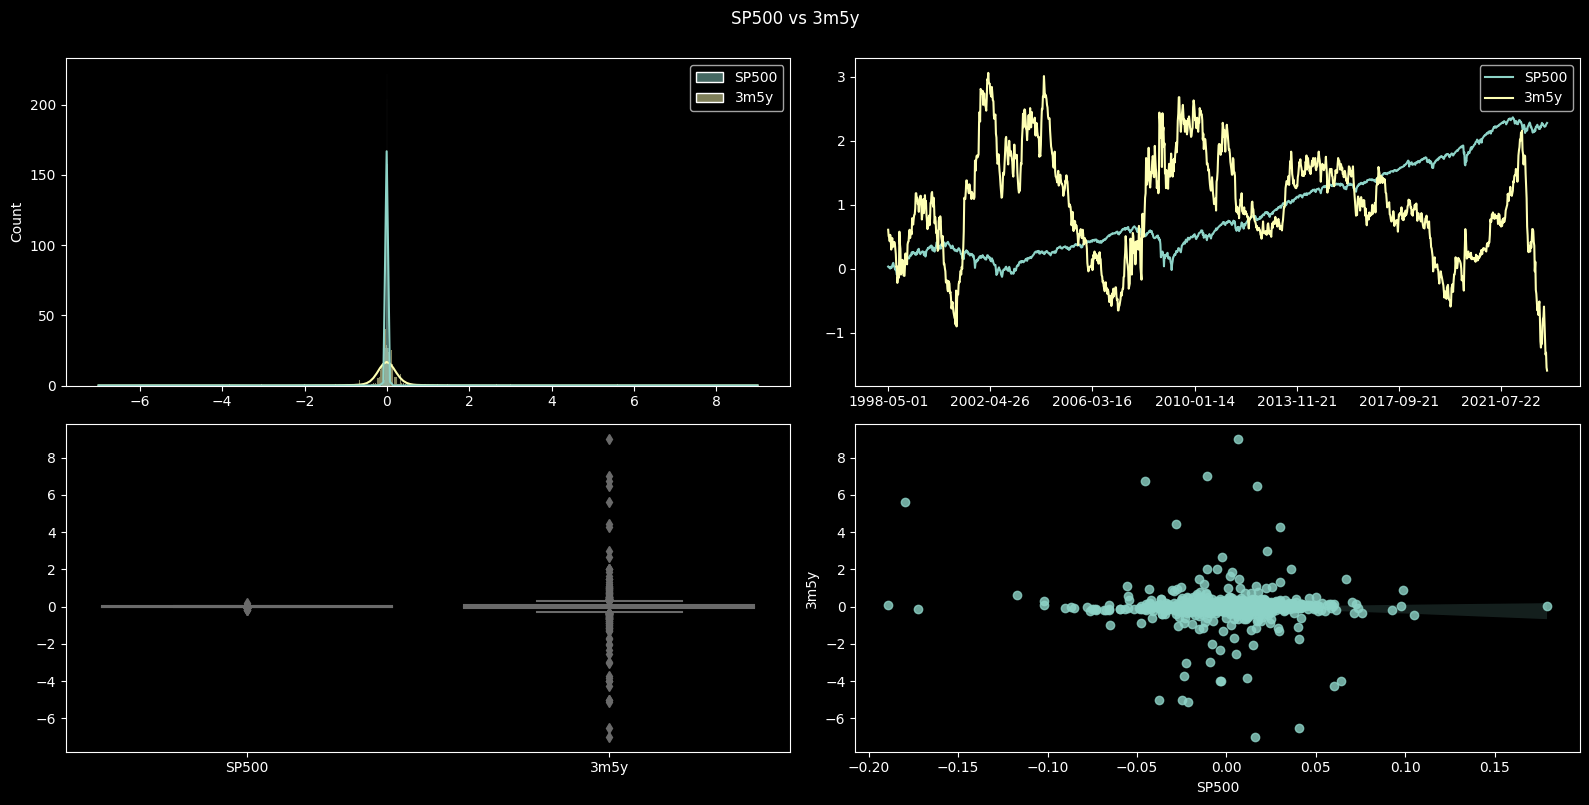

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


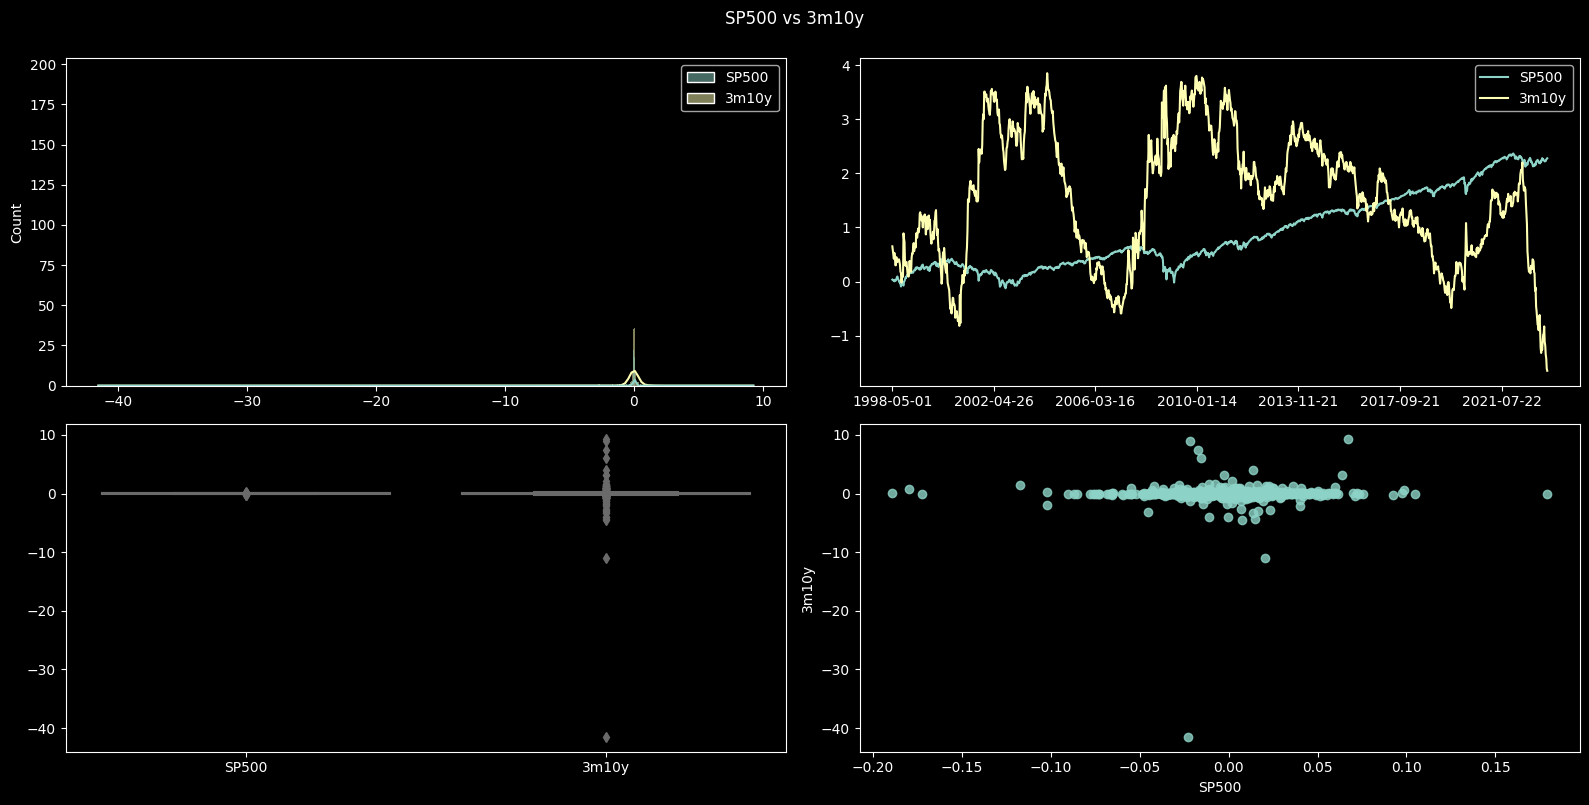

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


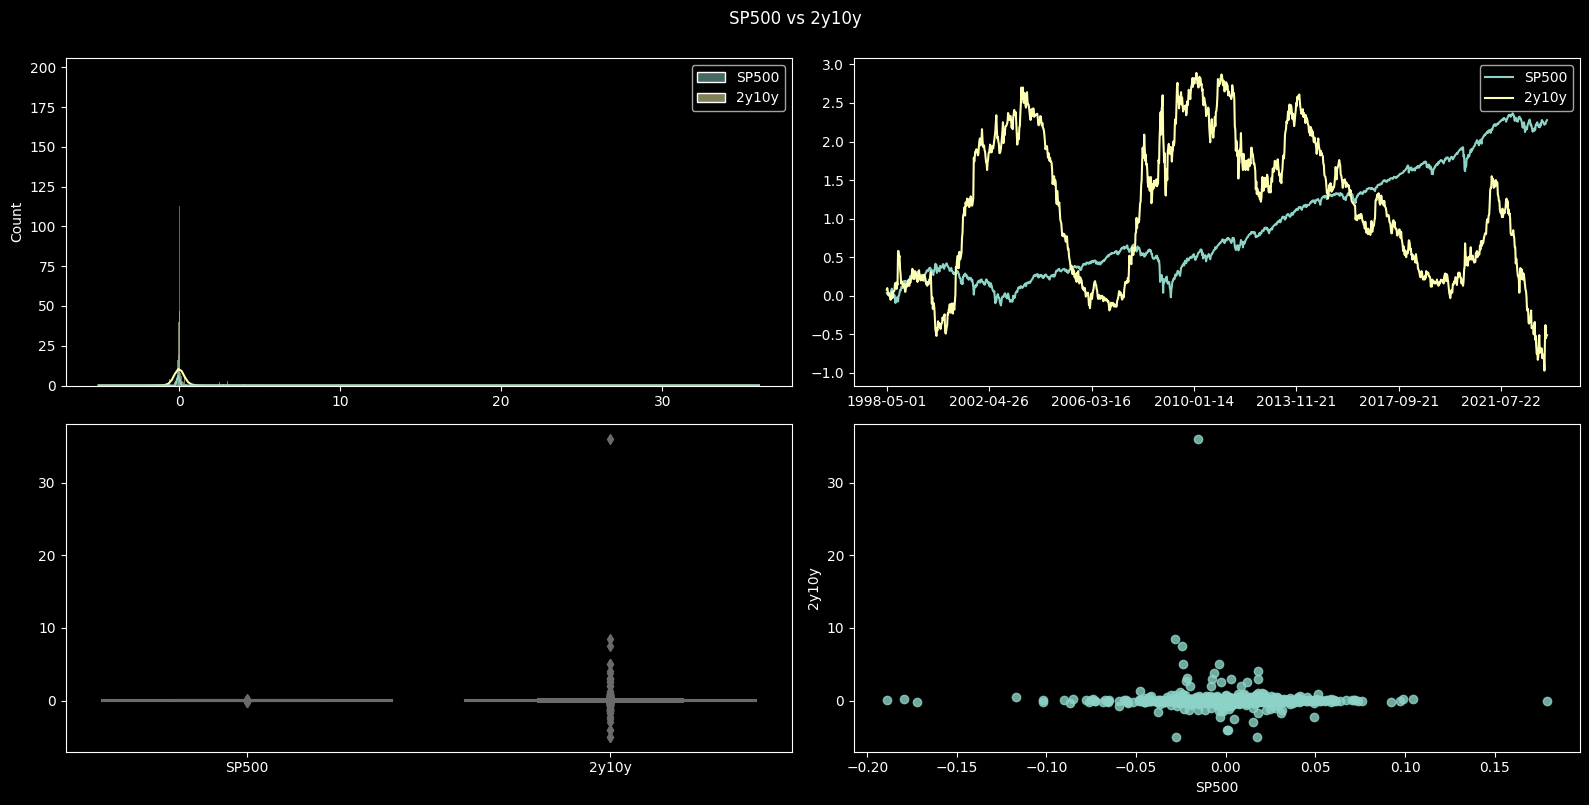

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


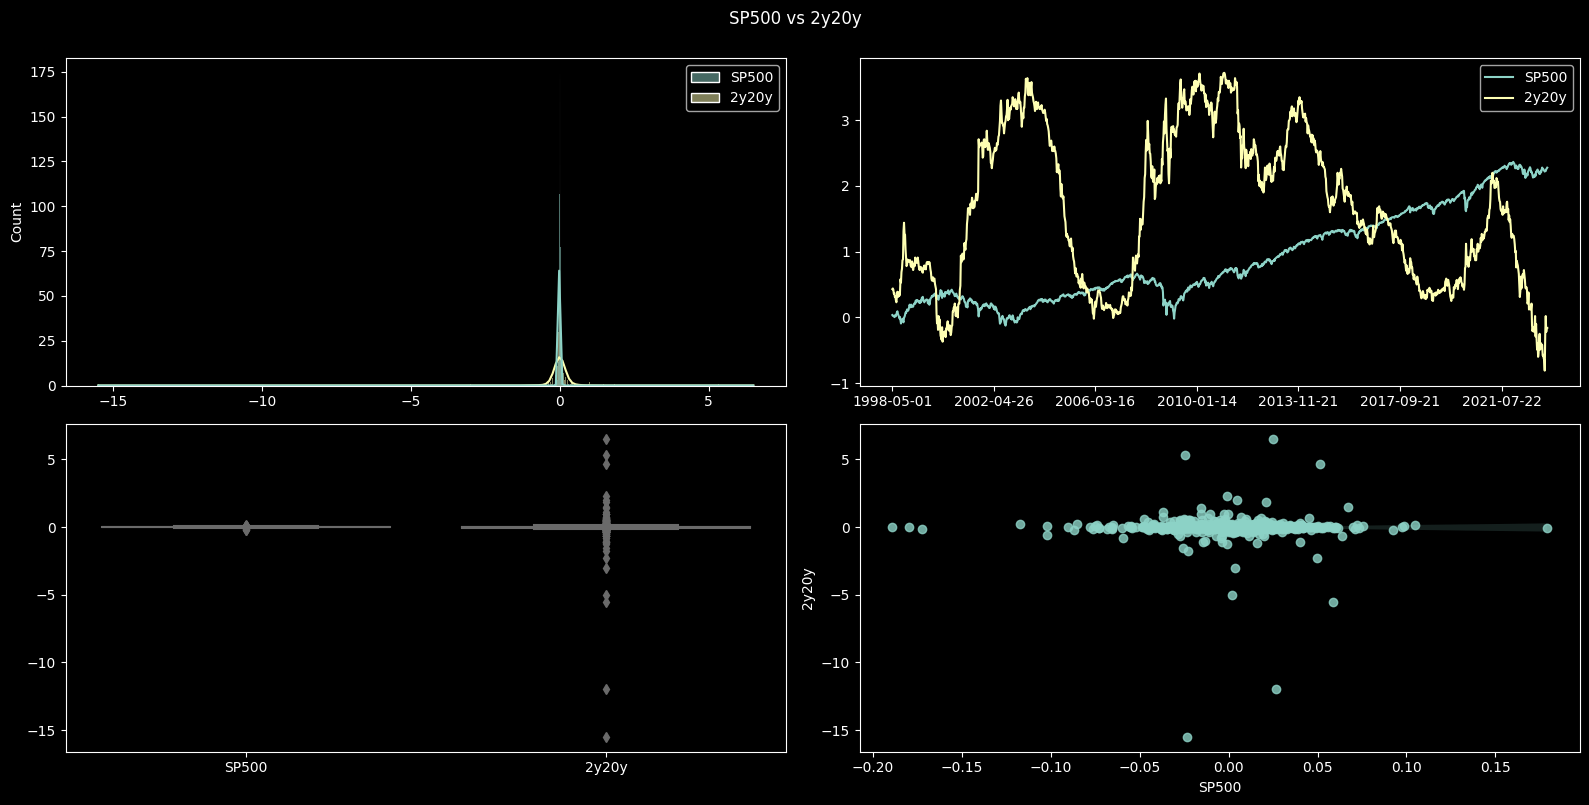

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


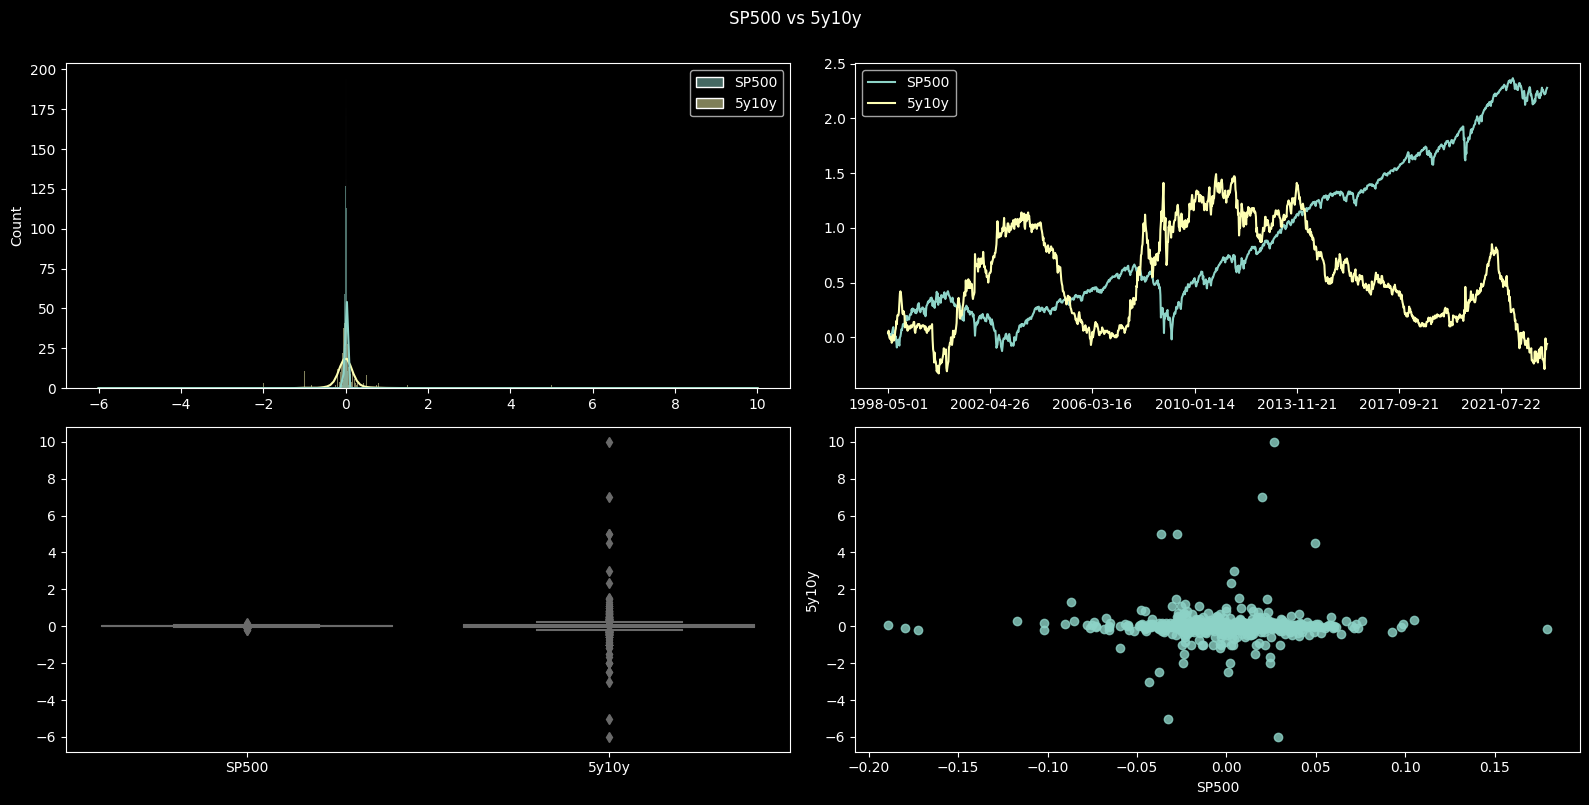

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


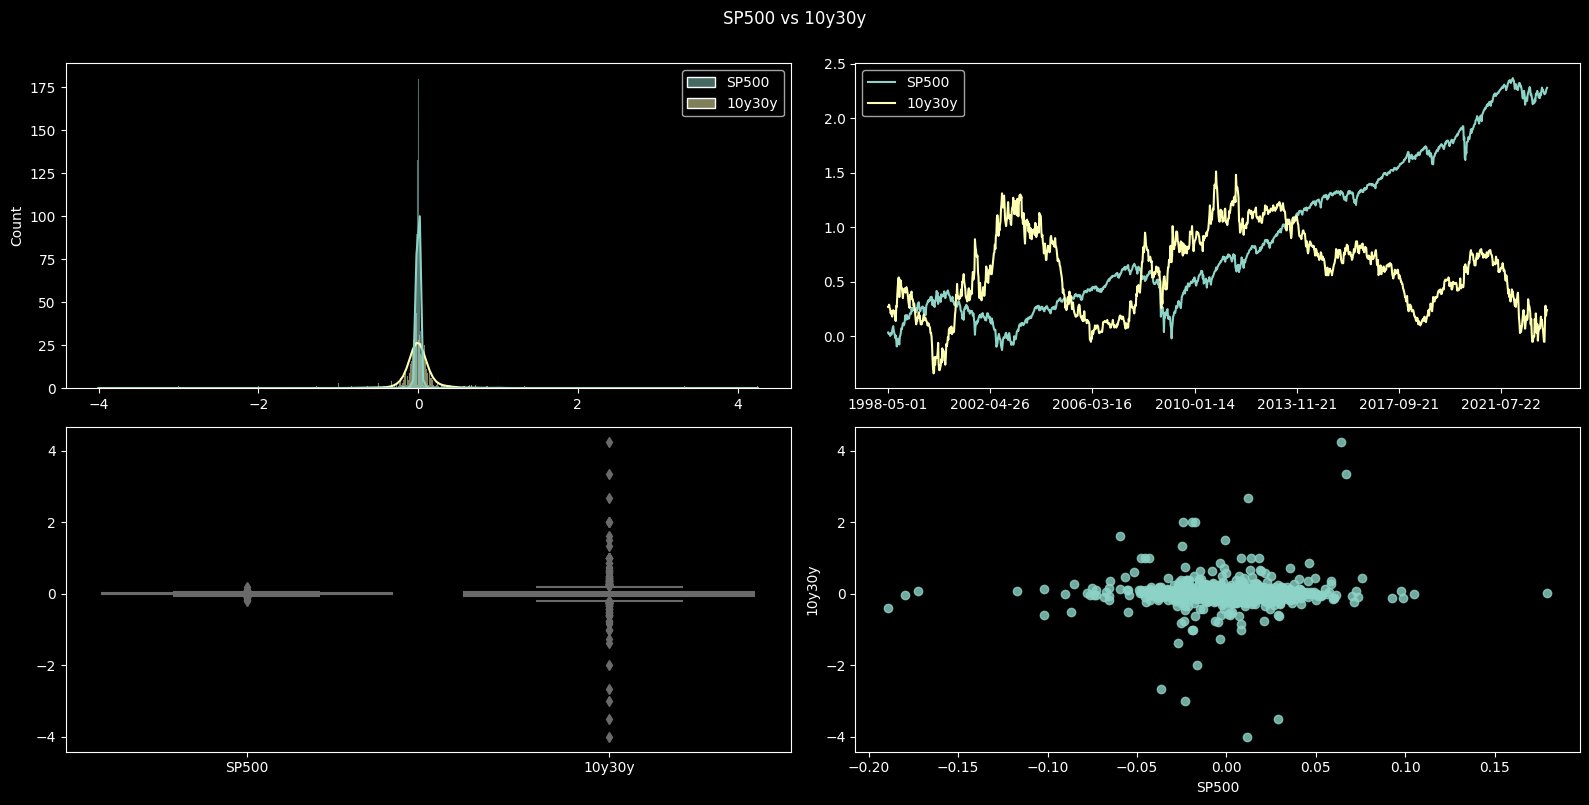

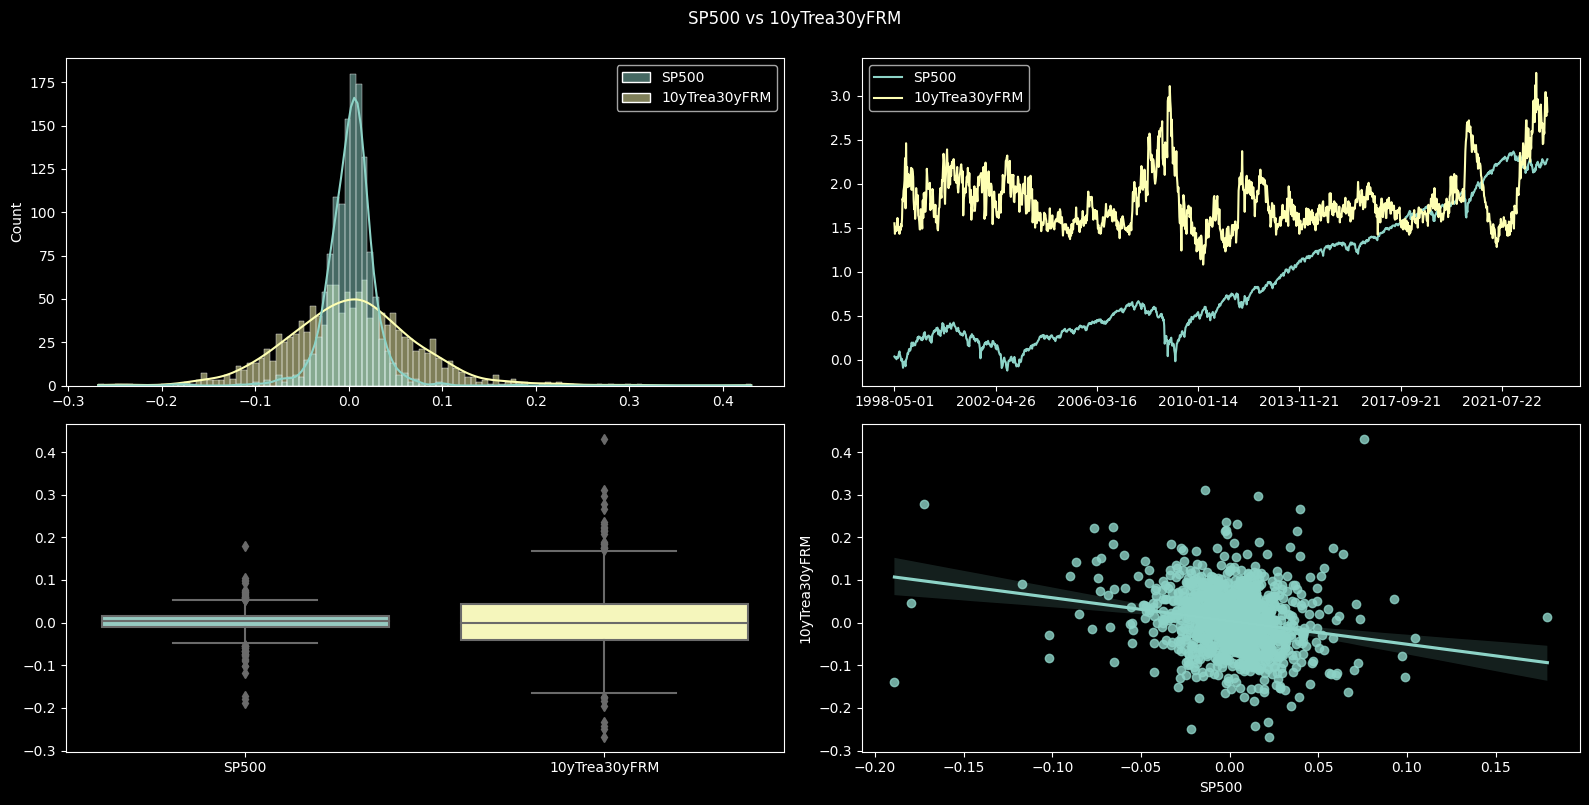

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [28]:
interest_rate_spread_mkt = analisis_bivariante(markets=markets, indicators_names=interest_rate_spread,stock_start=stock_start,stock_end=stock_end, df_market_cum=df_market_cum, df_market_hist=df_market_hist, inds_dict=interest_rate_spread_dict)

#### 7.5 Desempleo vs SPY (S&P500)

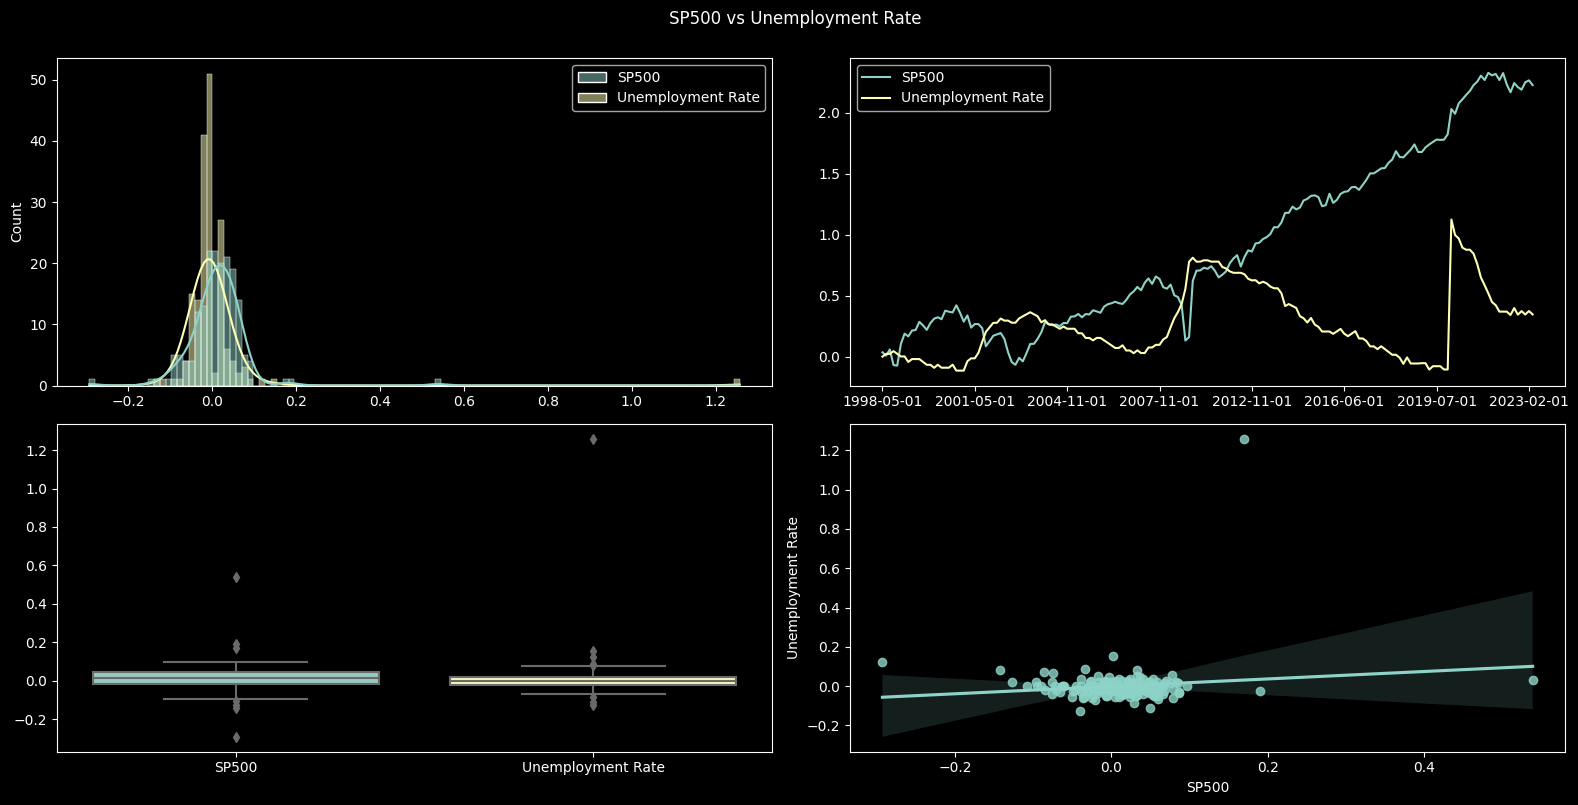

<Figure size 1000x1000 with 0 Axes>

In [29]:
unemployment_mkt = analisis_bivariante(markets=markets, indicators_names=unemployment,stock_start=stock_start,stock_end=stock_end, df_market_cum=df_market_cum, df_market_hist=df_market_hist, inds_dict=unemployment_dict)

#### 7.6 Dólar Americano vs SPY (S&P500)

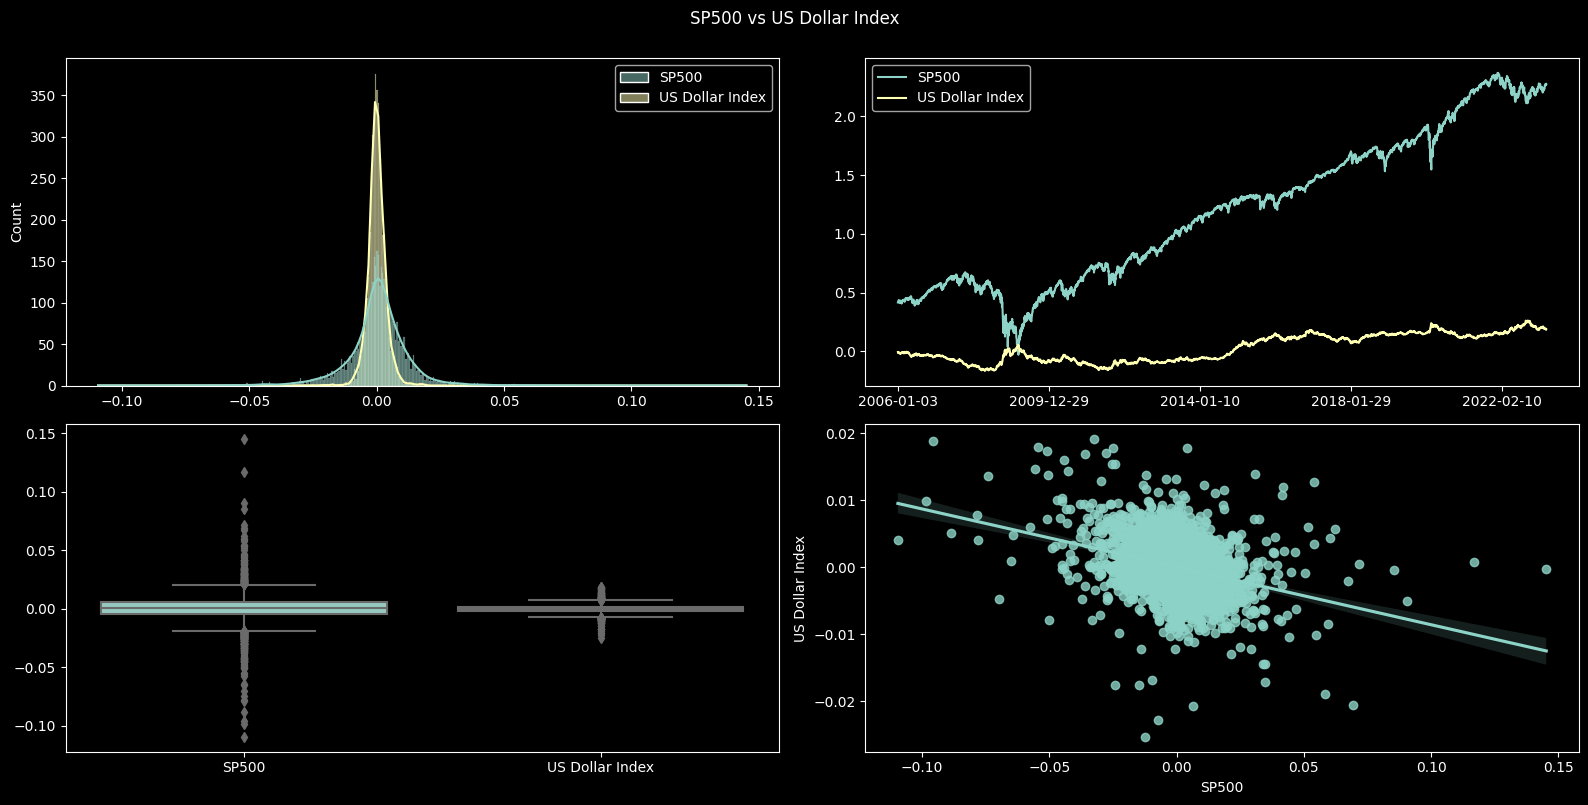

<Figure size 1000x1000 with 0 Axes>

In [30]:
usd_mkt = analisis_bivariante(markets=markets, indicators_names=usd,stock_start=stock_start,stock_end=stock_end, df_market_cum=df_market_cum, df_market_hist=df_market_hist, inds_dict=usd_dict)

### 8. Análisis Estadístico

In [31]:
markets = market_names

GDP mean return:  0.020514917046451375
SP500 mean return:  0.0003616202841907364
GDP standard deviation:  0.026409838513125998
SP500 standard deviation:  0.012536142976964827
t-statistic:  18.31902996599395
p-value:  4.1232594784853094e-73
Real GDP mean return:  0.008928406312396307
SP500 mean return:  0.0003616202841907364
Real GDP standard deviation:  0.016290324019686594
SP500 standard deviation:  0.012536142976964827
t-statistic:  8.018103889909131
p-value:  1.2660458575910392e-15
GDP mean return:  0.020514917046451375
Dow_Jones mean return:  0.0003697784302884148
GDP standard deviation:  0.026409838513125998
Dow_Jones standard deviation:  0.012060100062164974
t-statistic:  18.964566088487512
p-value:  4.394046305513419e-78
Real GDP mean return:  0.008928406312396307
Dow_Jones mean return:  0.0003697784302884148
Real GDP standard deviation:  0.016290324019686594
Dow_Jones standard deviation:  0.012060100062164974
t-statistic:  8.314294564300123
p-value:  1.115925160145737e-16
GDP m

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:212: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


2y20y mean return:  inf
Energy mean return:  0.0004715225880682663
2y20y standard deviation:  nan
Energy standard deviation:  0.01826555453376383
t-statistic:  nan
p-value:  nan
5y10y mean return:  nan
Energy mean return:  0.0004715225880682663
5y10y standard deviation:  nan
Energy standard deviation:  0.01826555453376383
t-statistic:  nan
p-value:  nan
10y30y mean return:  nan
Energy mean return:  0.0004715225880682663
10y30y standard deviation:  nan
Energy standard deviation:  0.01826555453376383
t-statistic:  nan
p-value:  nan
10yTrea30yFRM mean return:  0.0044920811264701
Energy mean return:  0.0004715225880682663
10yTrea30yFRM standard deviation:  0.09496480286604599
Energy standard deviation:  0.01826555453376383
t-statistic:  3.157877257898837
p-value:  0.001595077764101381
3m5y mean return:  nan
Financials mean return:  0.00033441273686701984
3m5y standard deviation:  nan
Financials standard deviation:  0.01834893829444471
t-statistic:  nan
p-value:  nan
3m10y mean return:  nan

c:\Users\Joan Oliver\Desktop\EDA_Indicadores_Economicos_vs_Mercados-main\src\utils\functions.py:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ttest[contador] = pd.Series([ind,market,t_statistic, p_value],index=["indicator","market","t_statistic", "p_value"])


2y10y mean return:  -inf
Staples mean return:  0.00030305317455513886
2y10y standard deviation:  nan
Staples standard deviation:  0.009668016600027788
t-statistic:  nan
p-value:  nan
2y20y mean return:  inf
Staples mean return:  0.00030305317455513886
2y20y standard deviation:  nan
Staples standard deviation:  0.009668016600027788
t-statistic:  nan
p-value:  nan
5y10y mean return:  nan
Staples mean return:  0.00030305317455513886
5y10y standard deviation:  nan
Staples standard deviation:  0.009668016600027788
t-statistic:  nan
p-value:  nan
10y30y mean return:  nan
Staples mean return:  0.00030305317455513886
10y30y standard deviation:  nan
Staples standard deviation:  0.009668016600027788
t-statistic:  nan
p-value:  nan
10yTrea30yFRM mean return:  0.0044920811264701
Staples mean return:  0.00030305317455513886
10yTrea30yFRM standard deviation:  0.09496480286604599
Staples standard deviation:  0.009668016600027788
t-statistic:  3.4354805442268734
p-value:  0.0005944808200643342
3m5y me

c:\Users\Joan Oliver\Desktop\EDA_Indicadores_Economicos_vs_Mercados-main\src\utils\functions.py:327: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,8))


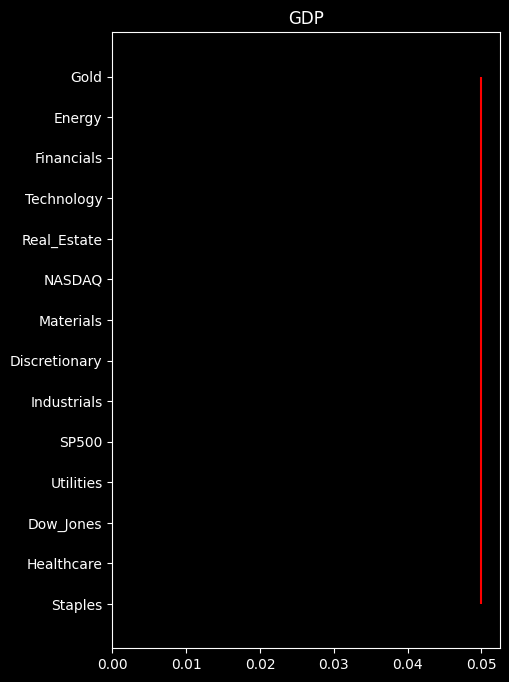

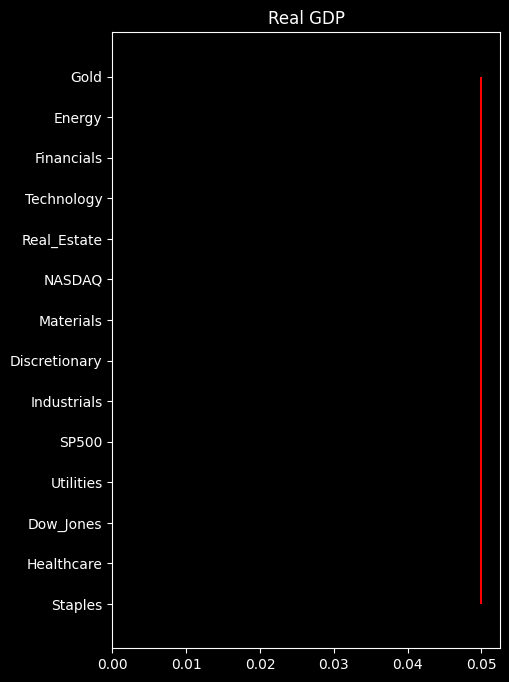

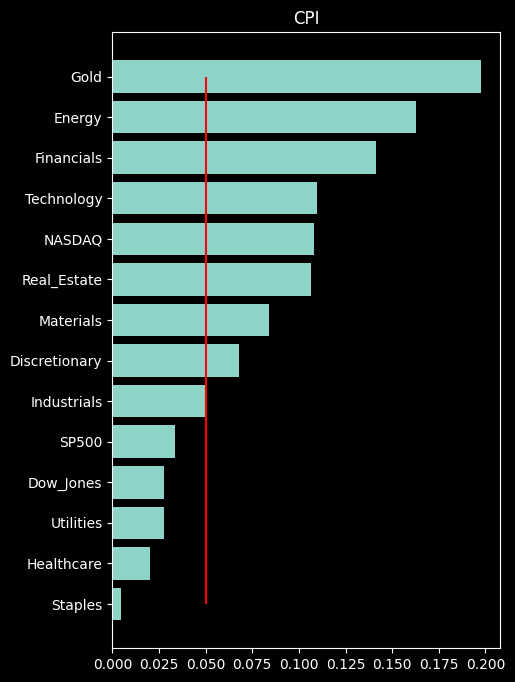

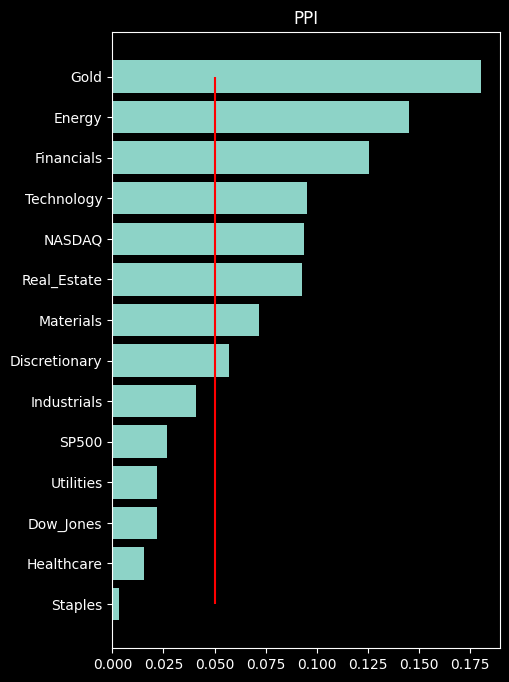

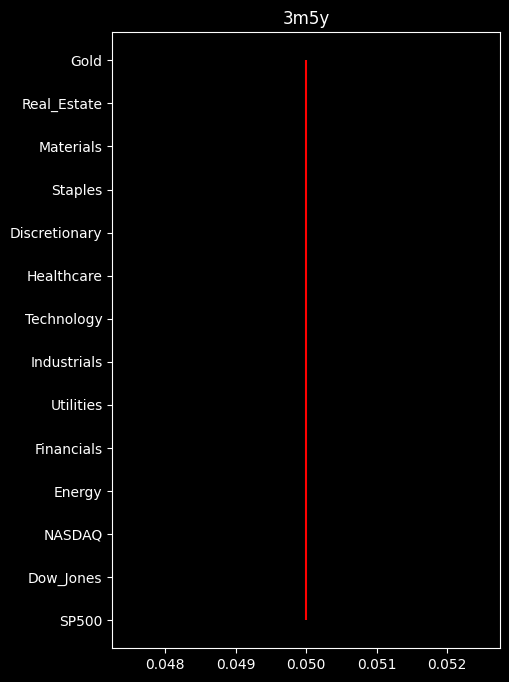

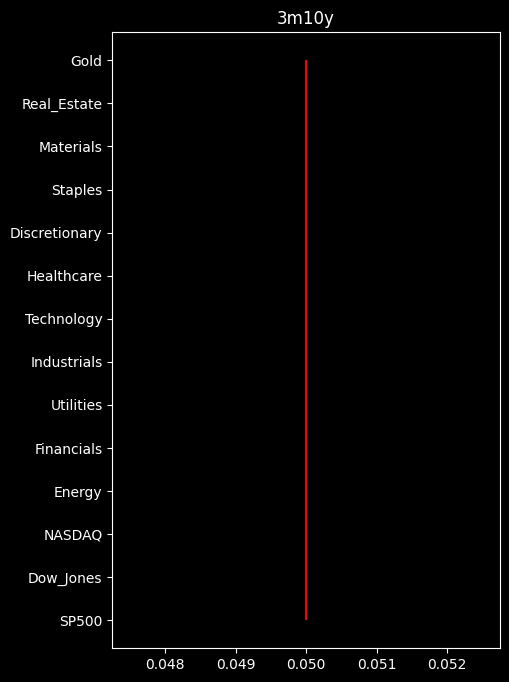

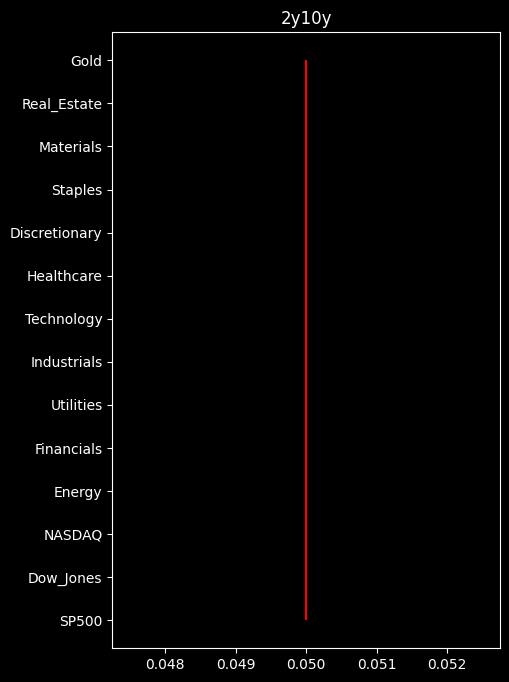

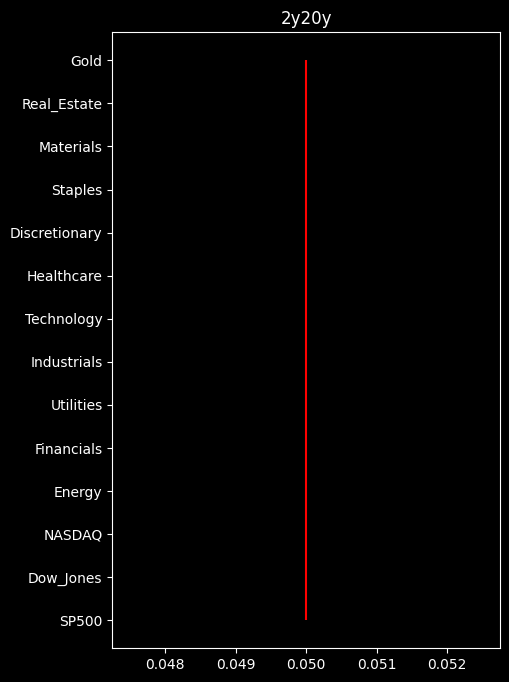

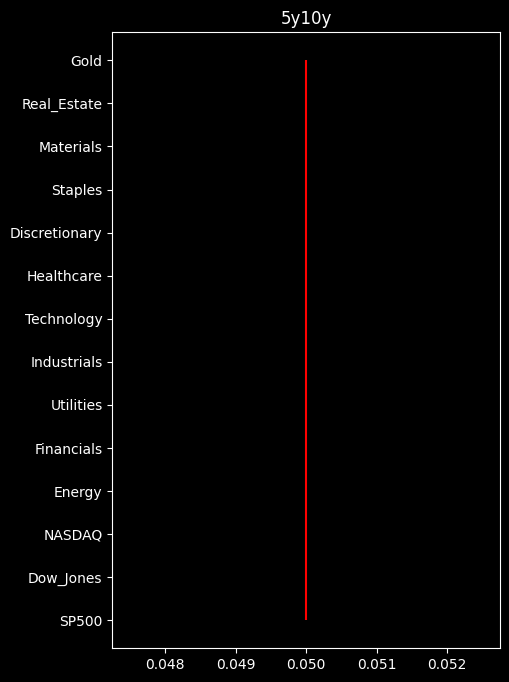

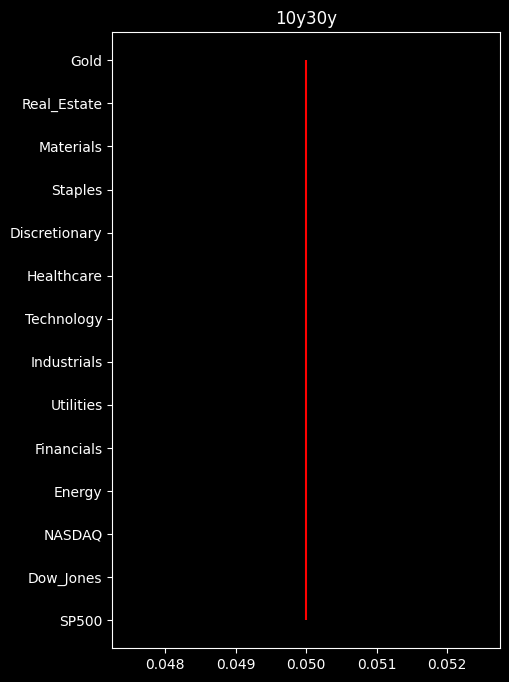

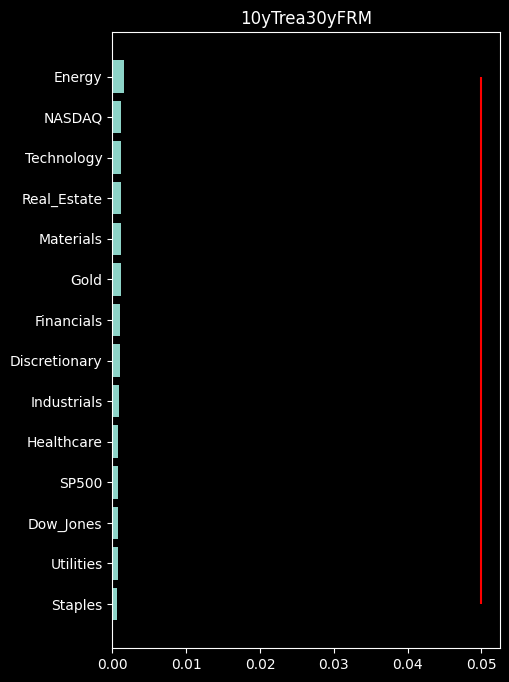

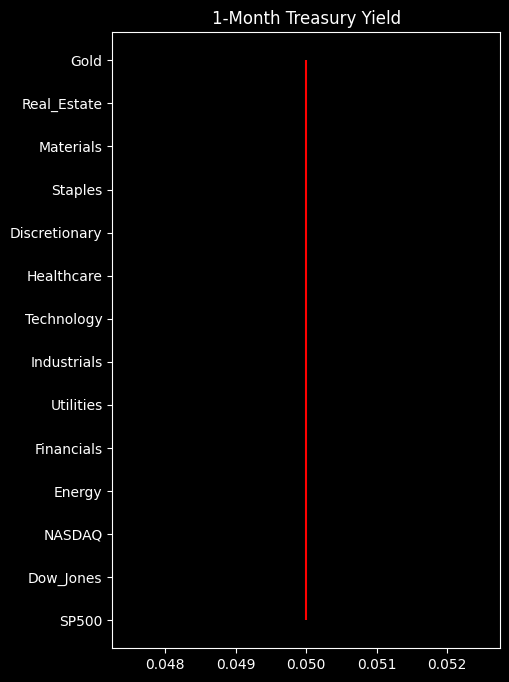

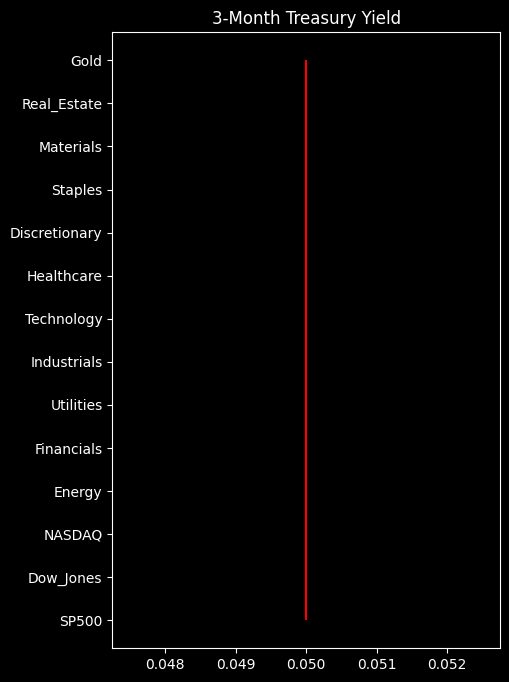

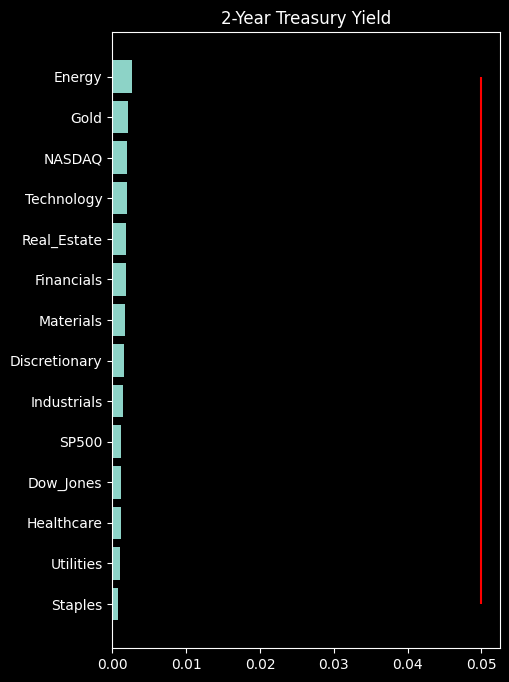

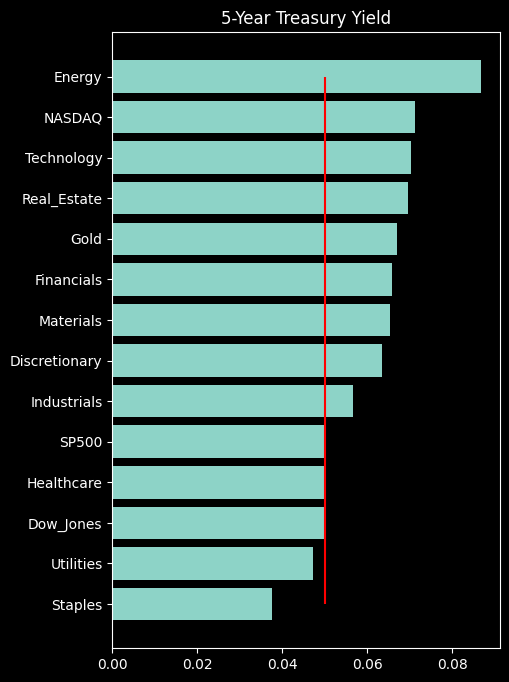

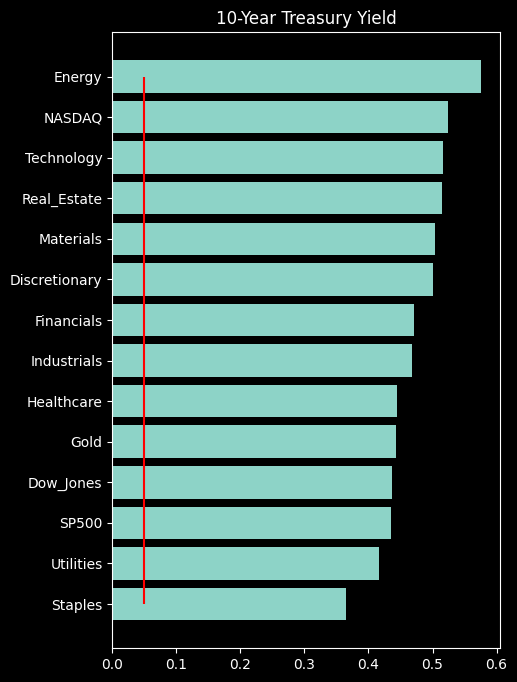

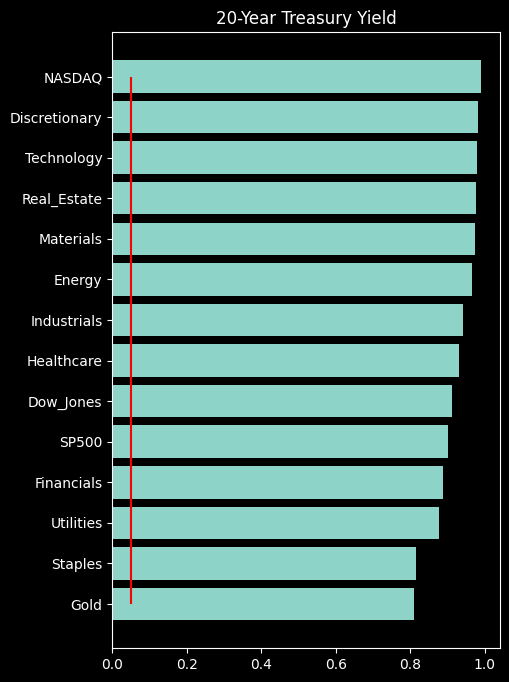

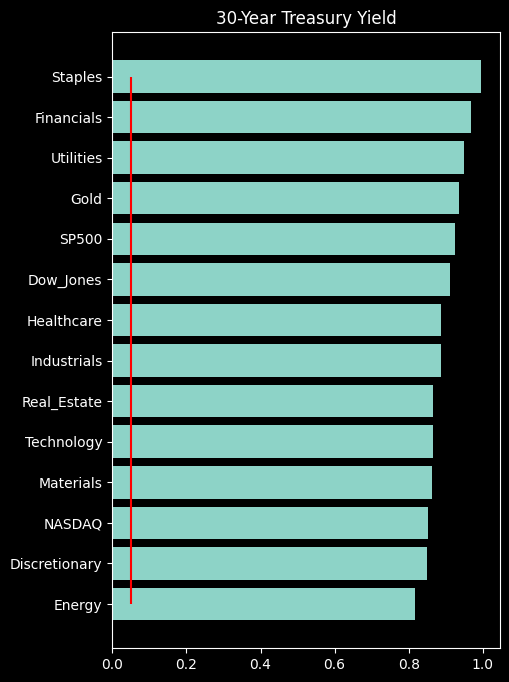

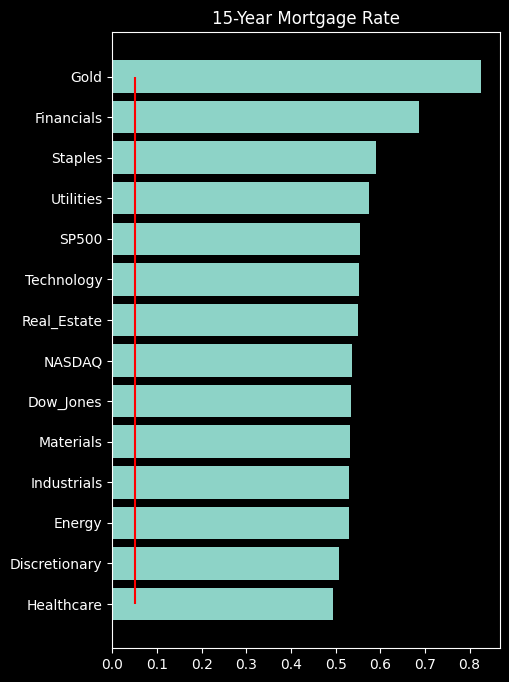

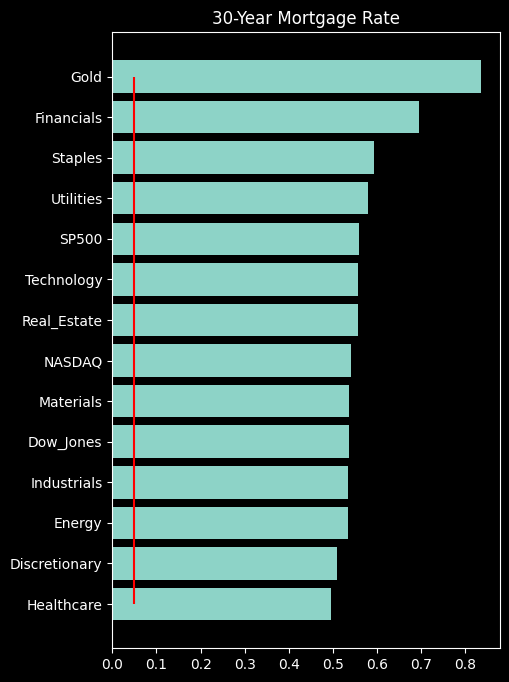

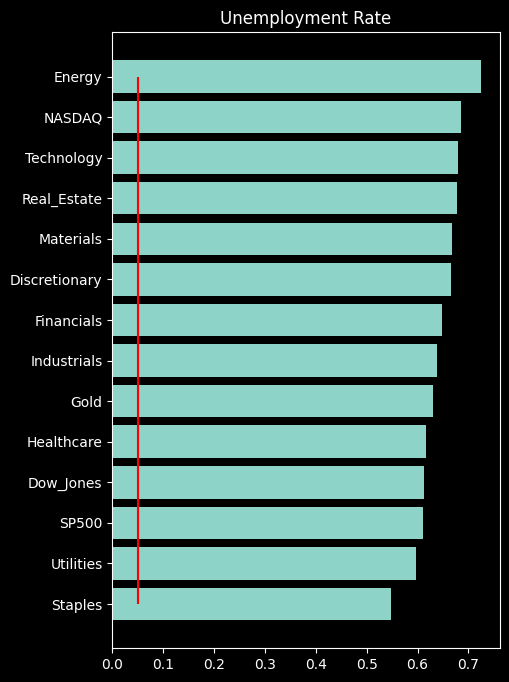

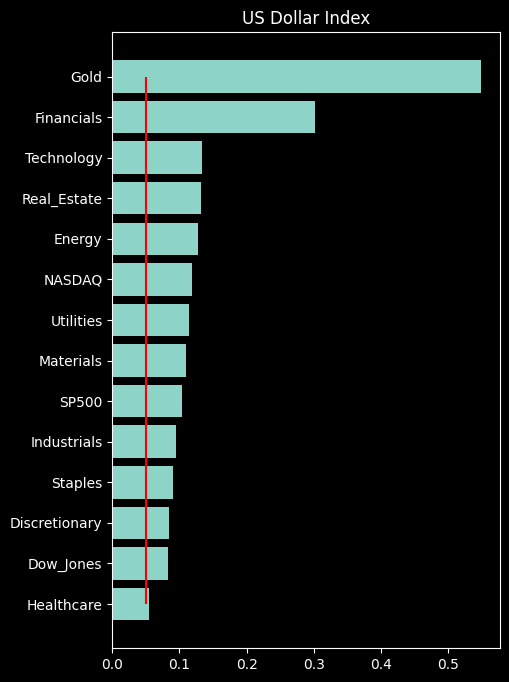

In [32]:
analisis_estadistico = analisis_estadistico(markets=markets, indicators=indicators, df_market_hist=df_market_hist, alpha=0.05)

### 9. Conclusiones

#### 9.1 Hipotesis 1

- **Hay una correlación negativa entre el comportamiento de los tipos de interés y la bolsa en los Estados Unidos?** NO<br/>
Basándonos en el análisis realizado, no podemos determinar que la correlación entre Interest Rates y S&P500 es negativa. <br/>
Sin embargo, vemos que las fluctuaciones en los tipos de interés tienen un efecto inverso un tanto retrasado en los mercados. Es decir, las fuertes subidas de los tipos de interés causan bajadas en los mercados bursátiles a posteriori y sus fuertes bajadas causan subidas de los mismos.<br/>
Esto hace que los tipos de interés resulten una buena herramienta para predecir fluctuaciones de mercado.

- **Cuando los tipos de interés a largo plazo bajan en comparación con los del corto plazo, es muy probable que se aproxime una crisis bursátil?** NO<br/>
Como los tipos de interés, los diferenciales entre tipos de interés de diversos plazos no mostraron una correlación relevante que determine fluctuaciones al momento.<br/>
Pero podemos determinar, también, que hay un efecto retardado en los mercados bursátiles. Por lo que, cuando estos diferenciales bajan (los tipos de interés a corto plazo <br/>
se aproximan a los tipos a largo), es muy probable que los mercados bursátiles bajen en cuestión de varias semanas.<br/>
Este tema merece un estudio exhaustivo que se llevará a cabo más adelante.

- **Una elevada inflación suele causar bajadas en los mercados bursátiles?** NO<br/>
Hemos visto que la inflación y los mercados bursátiles tienen una correlación positiva. Por lo que podemos asumir que, cuando la inflación aumenta moderadamente, los mercados bursátiles suben.<br/>
Sin embargo, cabe destacar que en los últimos 2 años (debido al COVID), la dinámica entre la inflación y los mercados ha cambiado. Ya que, cuando la inflación sube demasiado, <br/>se alteran otros factores económicos que hacen que los mercados sean inestables

- **Hay una correlación negativa entre el USD (Dólar) y los mercados bursátiles de USA?** SI<br/>
Hemos visto que las fluctuaciones positivas en el USD tienden a afectar de manera negativa a los mercados bursátiles de USA. <br/>
Por lo que este puede ser una buena herramienta para predecir las fluctuaciones en los mercados.

- **Los movimientos en el PIB de USA (GDP) y el mercado bursátil son correlacionados.** SI<br/>
Hemos visto una fuerte correlación positiva entre el GDP y los mercados bursátiles. Por lo que este puede ser una buena herramienta para predecir las fluctuaciones en los mercados.

- **El desempleo y el mercado de valores tienen una correlación negativa.** NO<br/>
Hemos visto que el desempleo y los mercados tienen una baja (pero positiva) correlación. Esto se debe a que, cuando el desempleo sube demasiado, el gobierno<br/>
tiende a bajar los tipos de interés y vice versa para evitar crisis económicas fuertes. Por lo tanto, una fuerte subida en el desempleo puede causar subidas en los mercados.

- **Un elevado desempleo suele causar una subida en los tipos de interés; lo que, a su vez, causa la subida de los mercados.**